In [1]:
import pandas as pd

# Load the dataset
file_path = 'Sports Data.xlsx'
data = pd.read_excel(file_path, sheet_name="Sports data for DSBA")


# Display the first few rows of the dataset
print(data.head())

# Get the shape of the dataset (rows, columns)
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

# Display summary statistics for numerical columns
print(data.describe())

# Display information about the dataset
print(data.info())


  Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...

In [2]:
# Define new column names based on the provided descriptions
column_mapping = {
    'Game_number': 'game_number',
    'Result': 'result',
    'Avg_team_Age': 'avg_team_age',
    'Match_light_type': 'match_light_type',
    'Match_format': 'match_format',
    'Bowlers_in_team': 'bowlers_in_team',
    'Wicket_keeper_in_team': 'wicket_keeper_in_team',
    'All_rounder_in_team': 'all_rounder_in_team',
    'First_selection': 'first_selection',
    'Opponent': 'opponent',
    'Season': 'season',
    'Audience_number': 'audience_number',
    'Offshore': 'offshore',
    'Max_run_scored_1over': 'max_run_scored_1over',
    'Max_wicket_taken_1over': 'max_wicket_taken_1over',
    'Extra_bowls_bowled': 'extra_bowls_bowled',
    'Min_run_given_1over': 'min_run_given_1over',
    'Min_run_scored_1over': 'min_run_scored_1over',
    'Max_run_given_1over': 'max_run_given_1over',
    'extra_bowls_opponent': 'extra_bowls_opponent',
    'player_highest_run': 'player_highest_run',
    'Players_scored_zero': 'players_scored_zero',
    'player_highest_wicket': 'player_highest_wicket'
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)

# Display the first few rows of the renamed dataframe
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_number             2930 non-null   object 
 1   result                  2930 non-null   object 
 2   avg_team_age            2833 non-null   float64
 3   match_light_type        2878 non-null   object 
 4   match_format            2860 non-null   object 
 5   bowlers_in_team         2848 non-null   float64
 6   wicket_keeper_in_team   2930 non-null   int64  
 7   all_rounder_in_team     2890 non-null   float64
 8   first_selection         2871 non-null   object 
 9   opponent                2894 non-null   object 
 10  season                  2868 non-null   object 
 11  audience_number         2849 non-null   float64
 12  offshore                2866 non-null   object 
 13  max_run_scored_1over    2902 non-null   float64
 14  max_wicket_taken_1over  2930 non-null   

In [7]:
# Define the continuous and categorical variables based on the context
continuous_vars = ['avg_team_age', 'audience_number', 'max_run_scored_1over',
                   'max_wicket_taken_1over', 'extra_bowls_bowled', 'min_run_given_1over',
                   'min_run_scored_1over', 'max_run_given_1over', 'extra_bowls_opponent',
                   'player_highest_run', 'players_scored_zero', 'player_highest_wicket', 'bowlers_in_team', 'all_rounder_in_team']

categorical_vars = ['match_light_type', 'match_format', 'first_selection', 'opponent', 'season', 'offshore']

# Ensure continuous variables are numeric
for var in continuous_vars:
    data[var] = pd.to_numeric(data[var], errors='coerce')

# Fill missing values for continuous variables with the mean
for var in continuous_vars:
    data[var].fillna(data[var].mean(), inplace=True)

# Fill missing values for categorical variables with the mode
for var in categorical_vars:
    data[var].fillna(data[var].mode()[0], inplace=True)

# Display the cleaned dataframe
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_number             2930 non-null   object 
 1   result                  2930 non-null   object 
 2   avg_team_age            2930 non-null   float64
 3   match_light_type        2930 non-null   object 
 4   match_format            2930 non-null   object 
 5   bowlers_in_team         2930 non-null   float64
 6   wicket_keeper_in_team   2930 non-null   int64  
 7   all_rounder_in_team     2930 non-null   float64
 8   first_selection         2930 non-null   object 
 9   opponent                2930 non-null   object 
 10  season                  2930 non-null   object 
 11  audience_number         2930 non-null   float64
 12  offshore                2930 non-null   object 
 13  max_run_scored_1over    2930 non-null   float64
 14  max_wicket_taken_1over  2930 non-null   

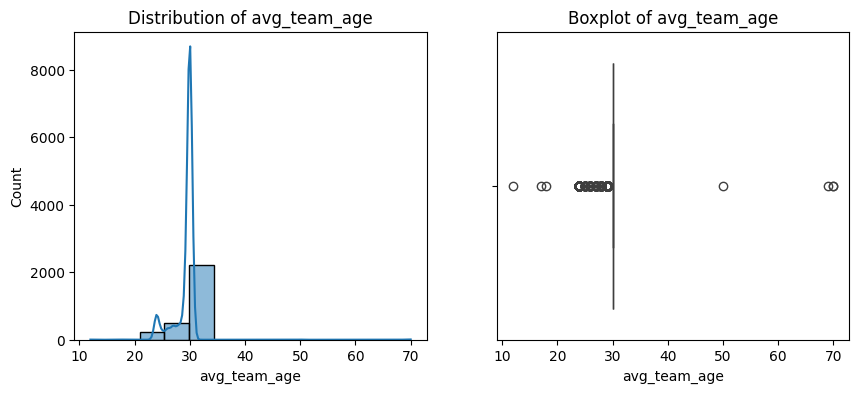

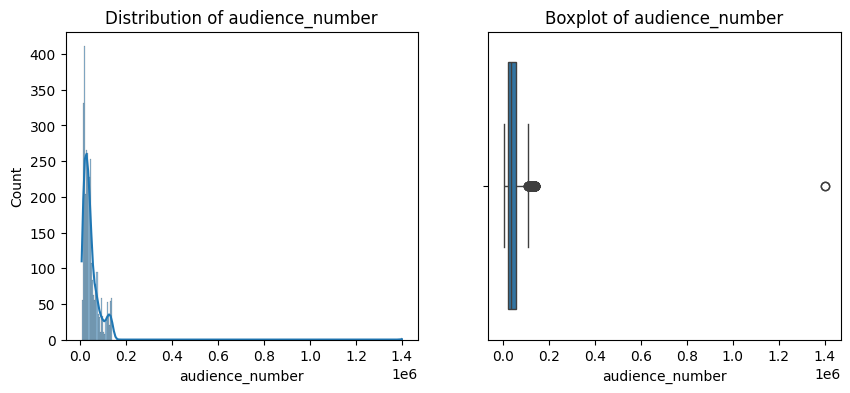

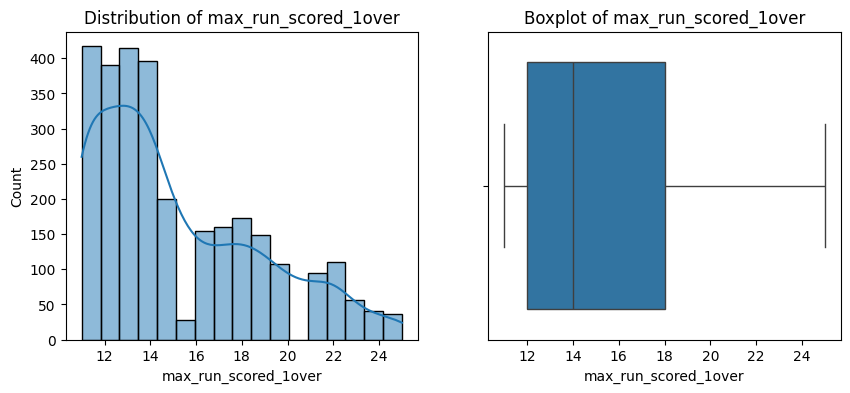

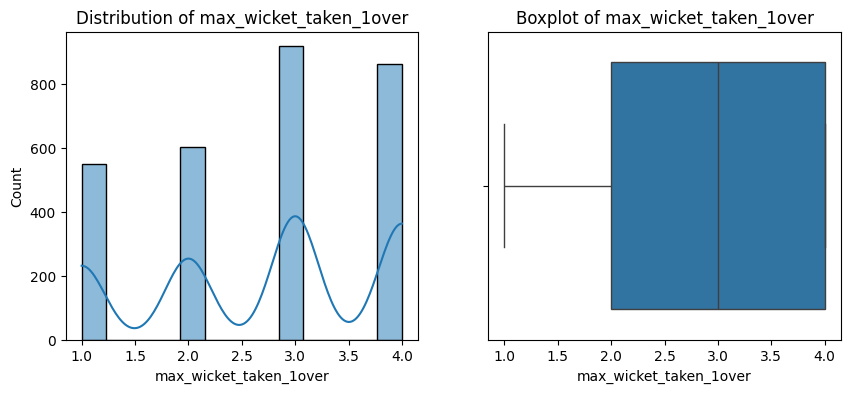

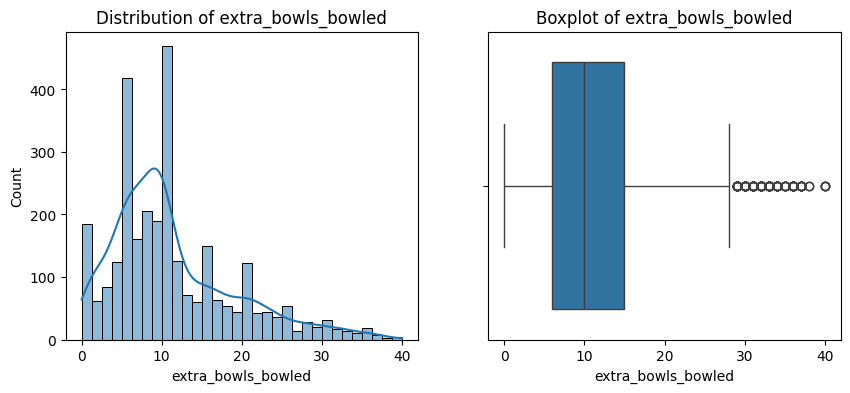

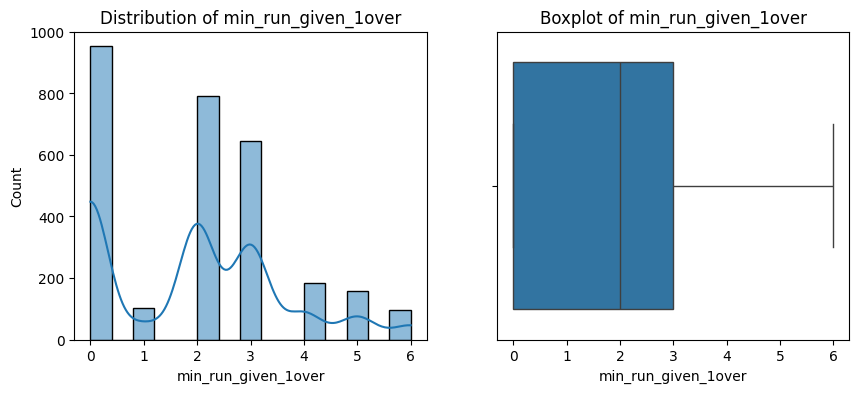

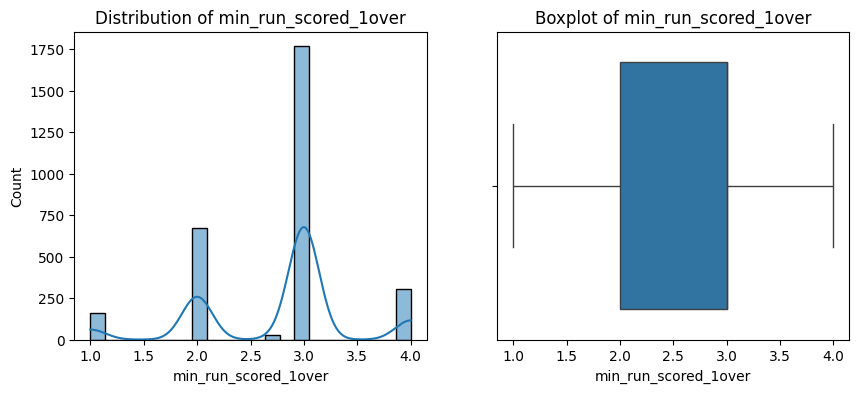

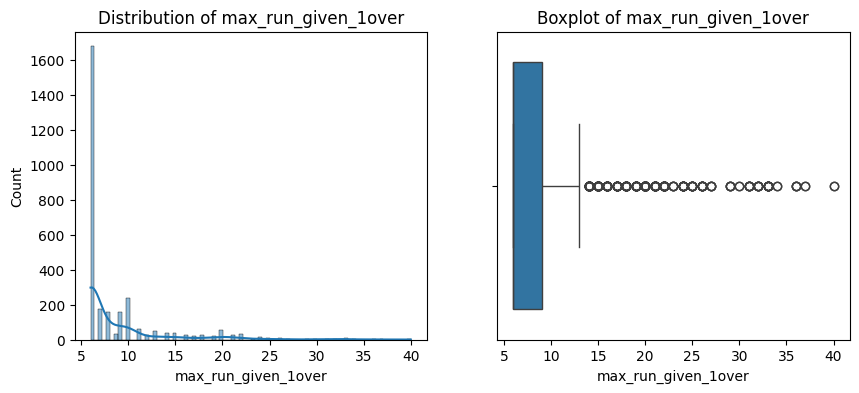

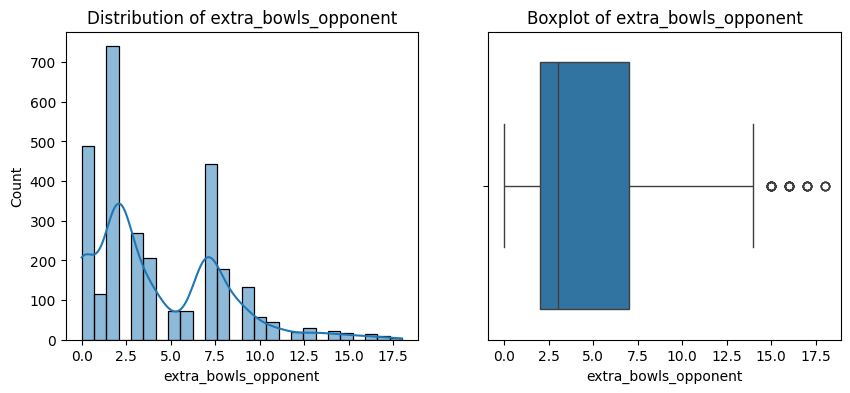

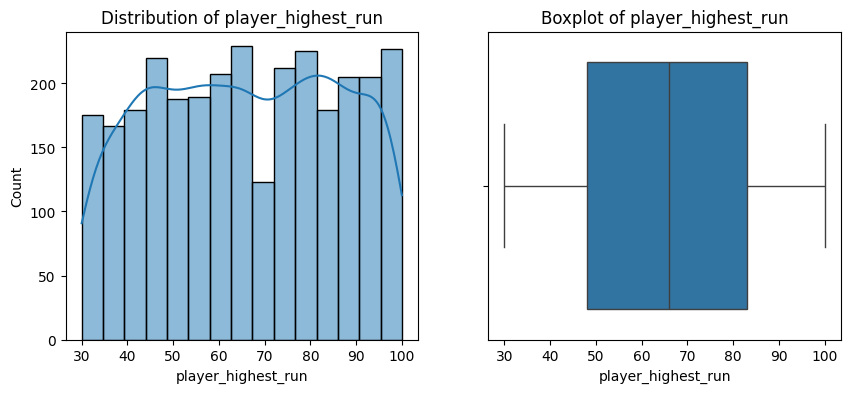

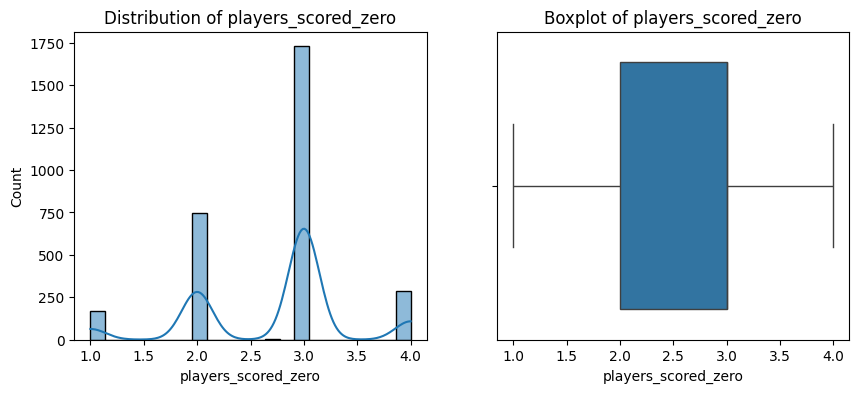

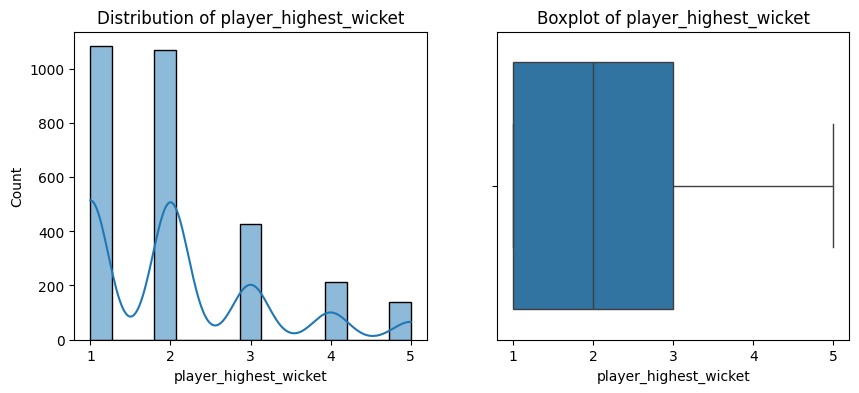

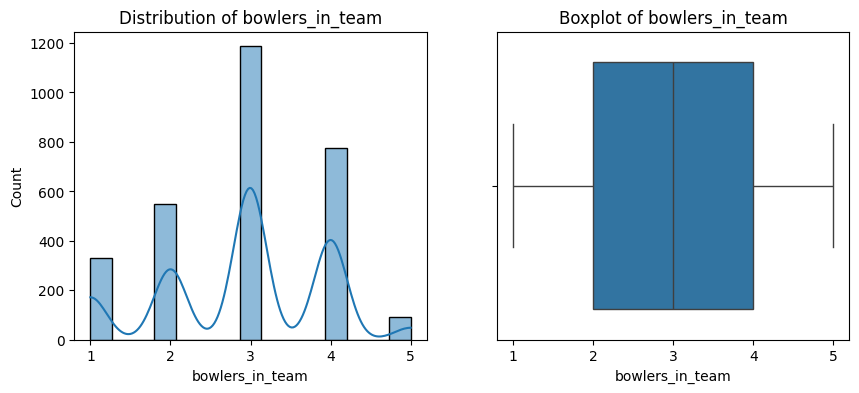

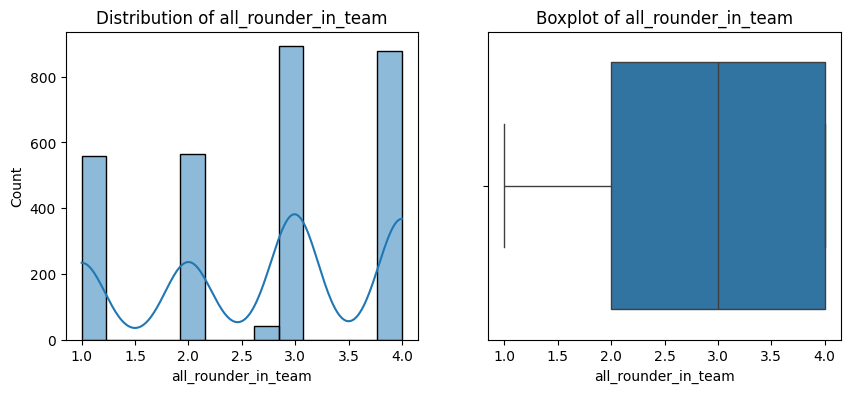

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var].dropna())
    plt.title(f'Boxplot of {var}')

    plt.show()

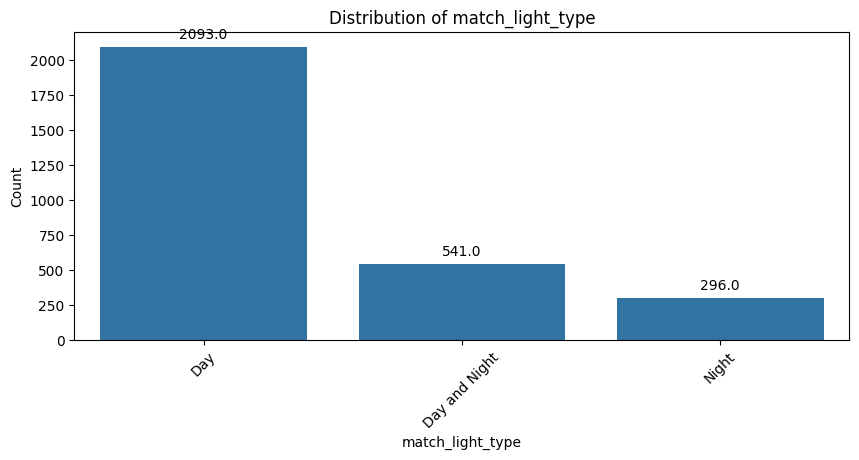

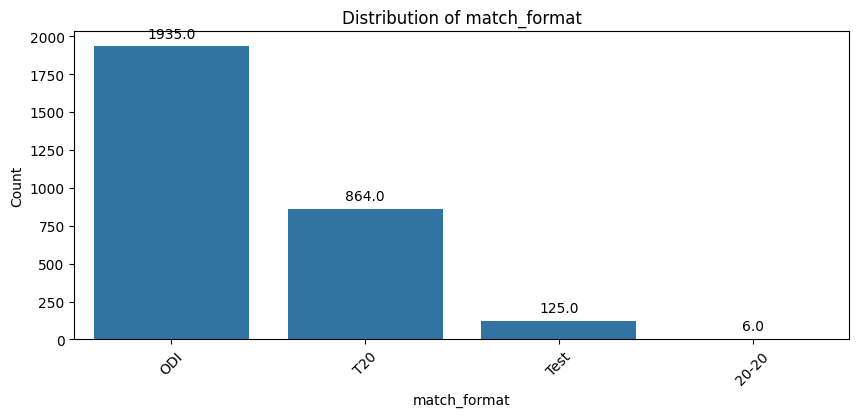

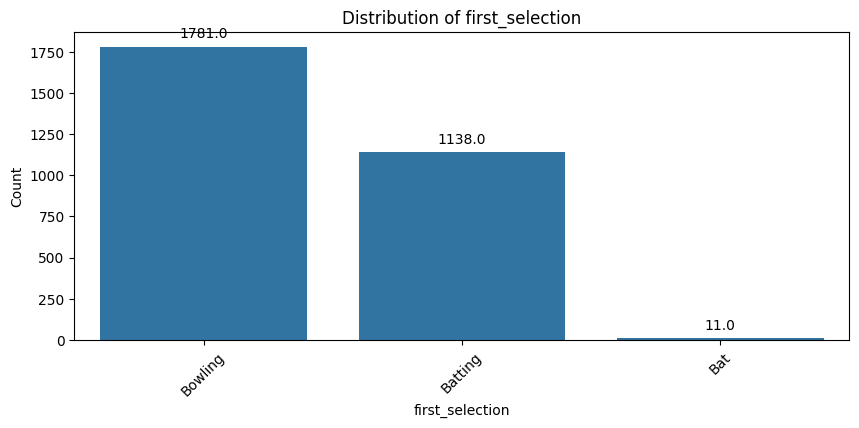

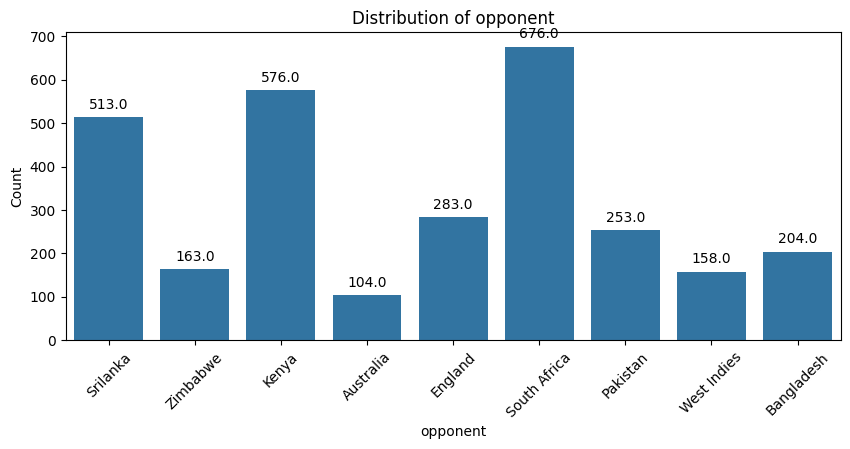

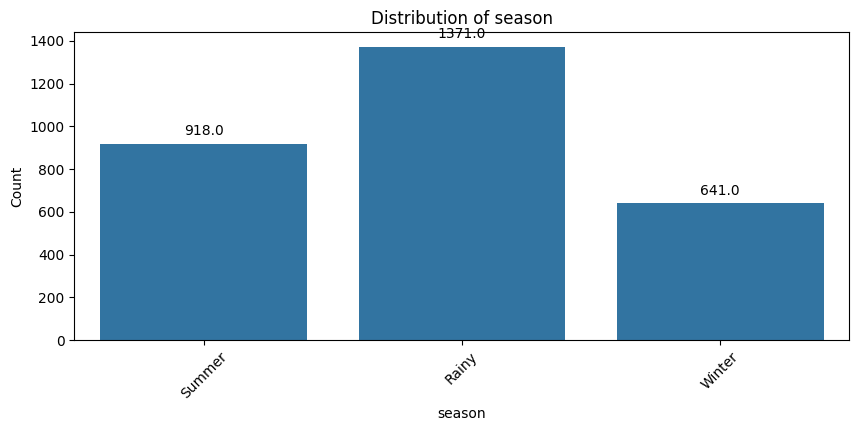

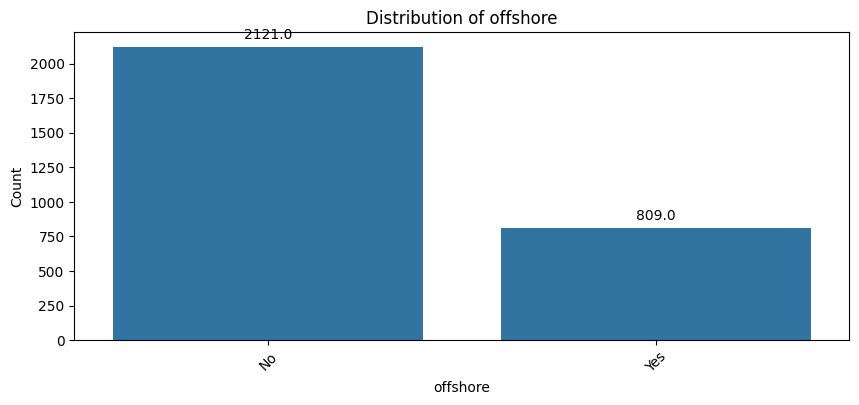

In [9]:
# Function to add values on top of bars
def add_value_labels(ax):
    for patch in ax.patches:
        ax.annotate(f'{patch.get_height()}',
                    (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

# Plotting the countplots for each categorical variable with labels
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    ax = sns.countplot(x=data[var])
    add_value_labels(ax)
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

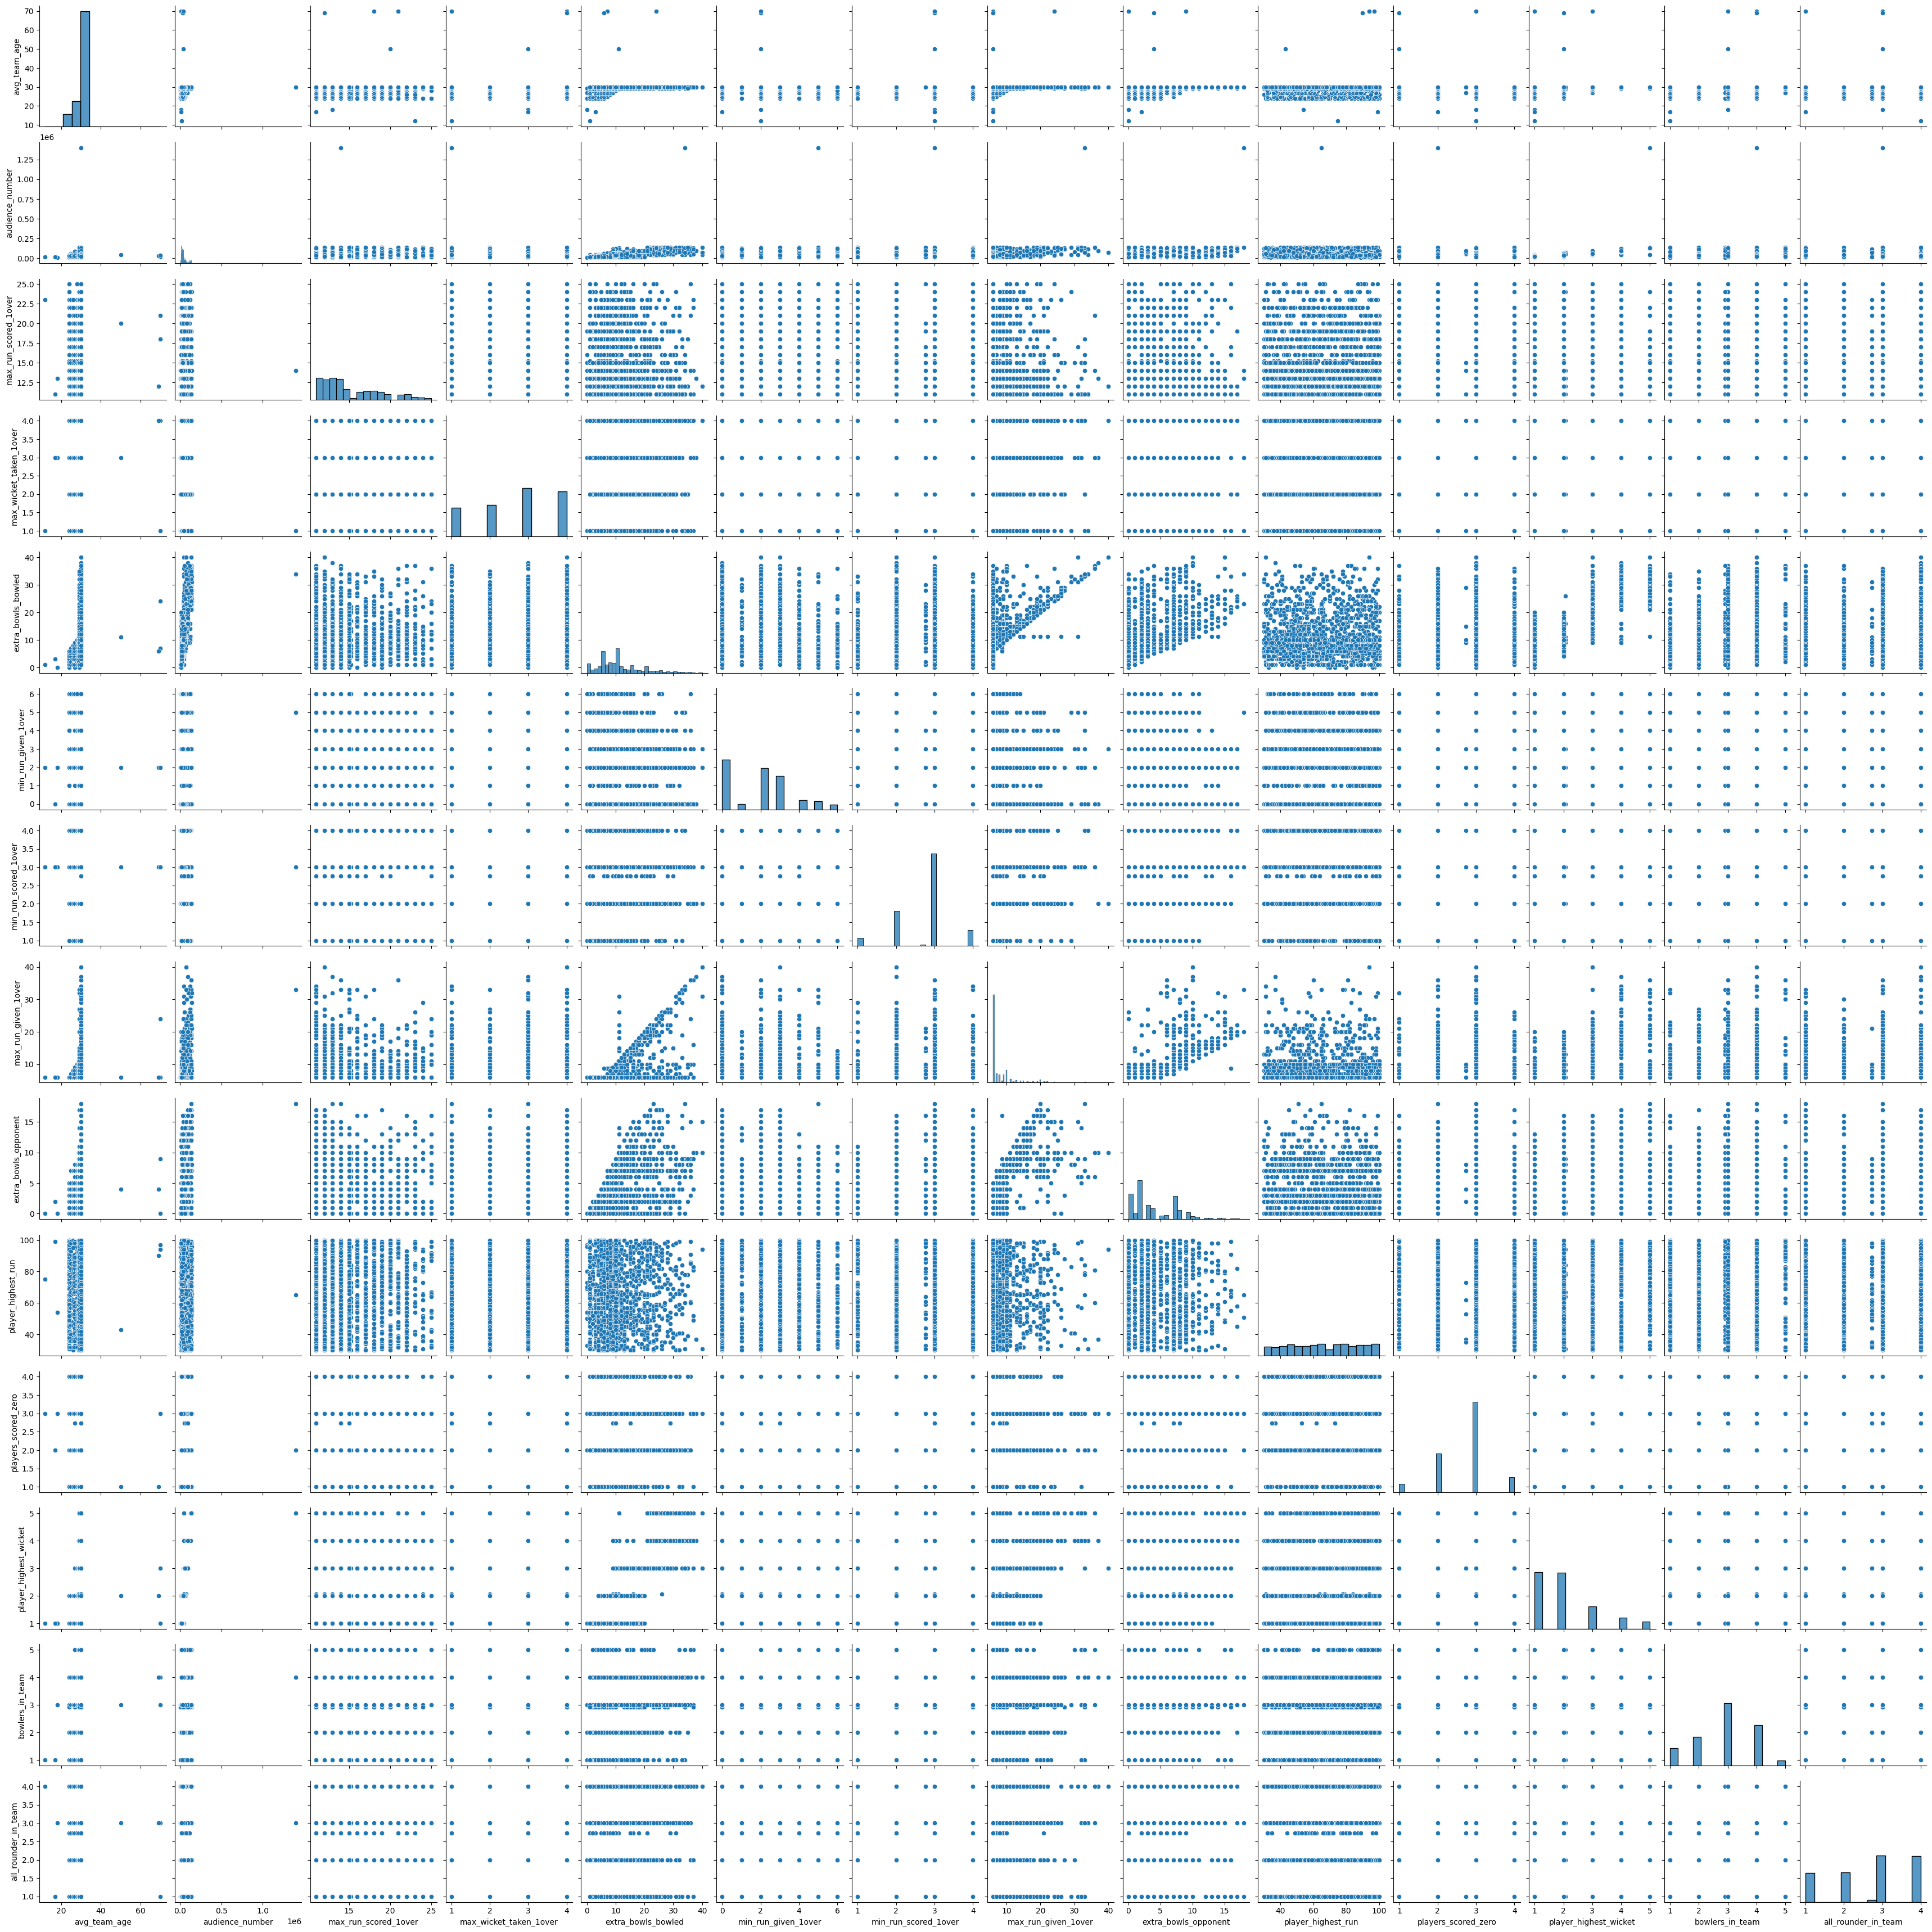

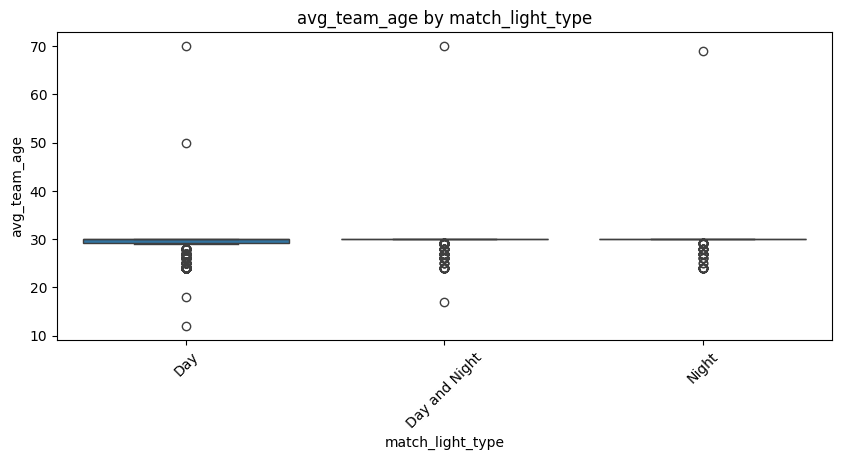

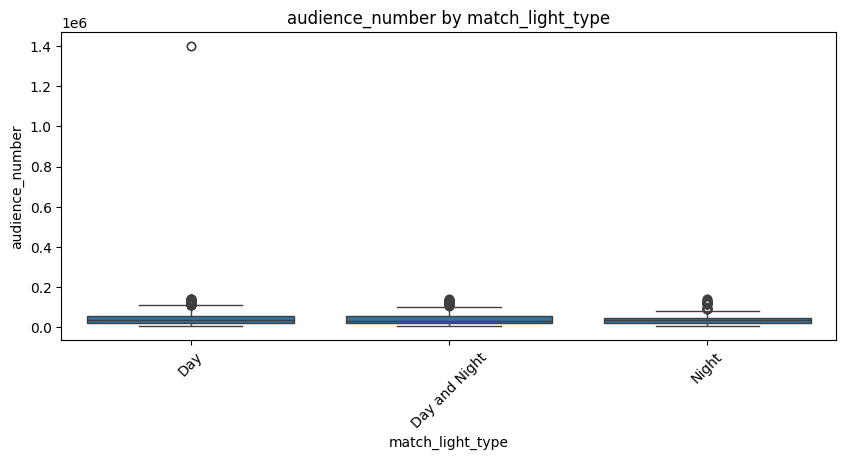

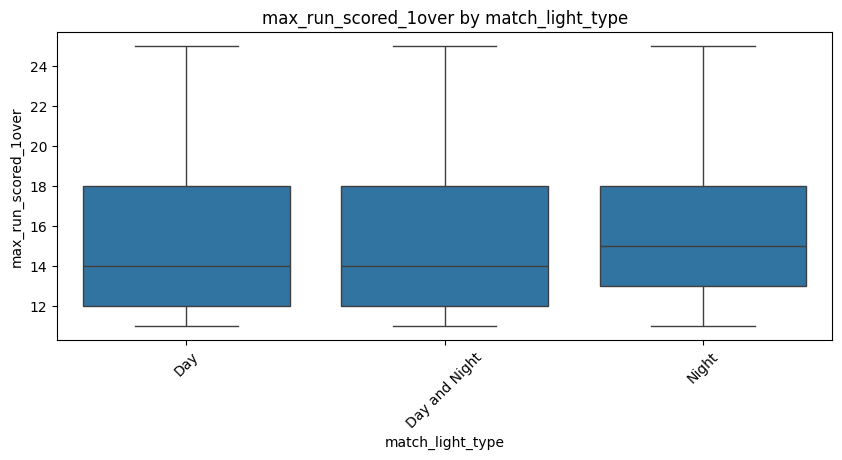

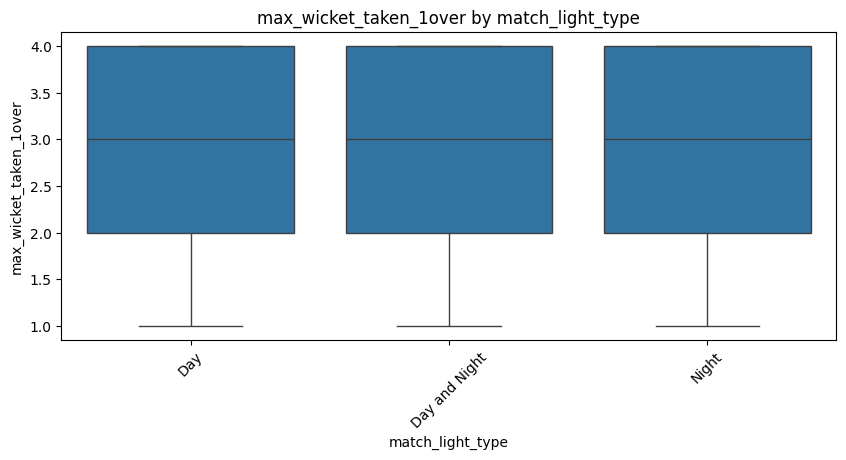

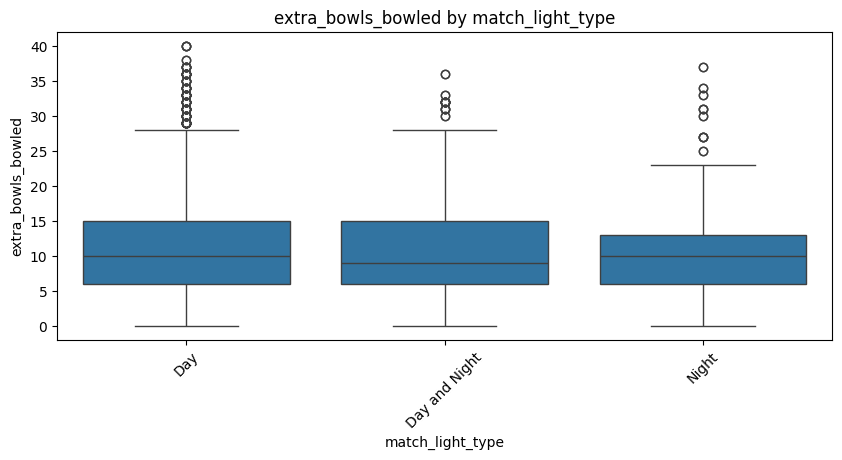

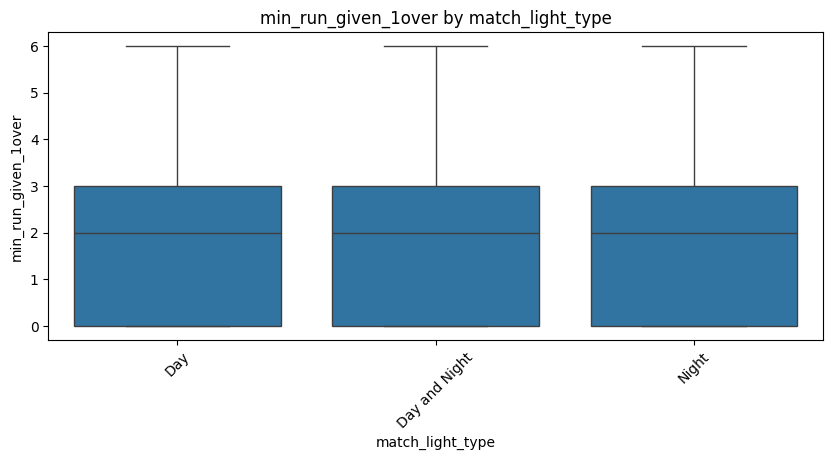

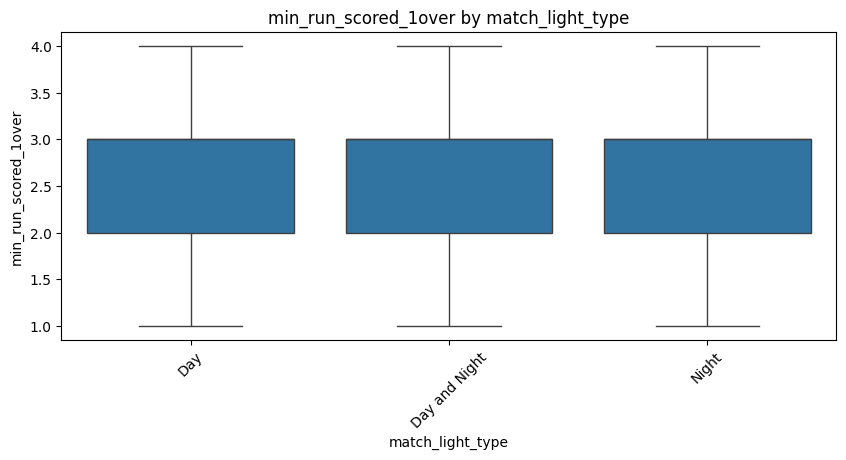

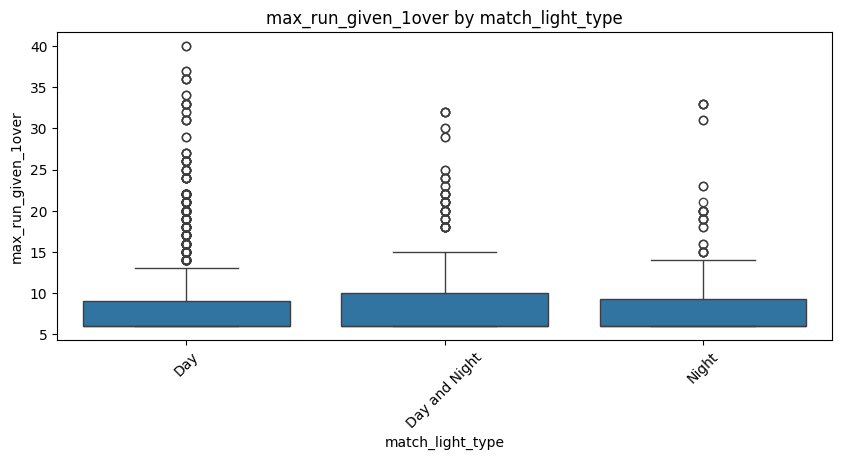

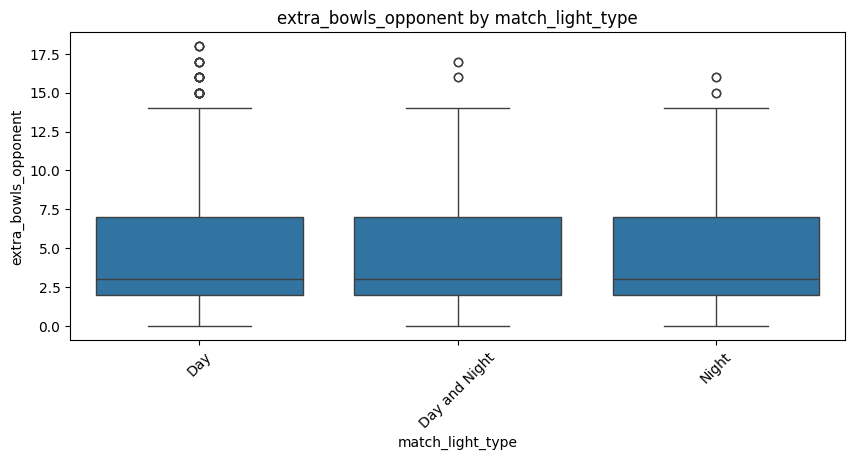

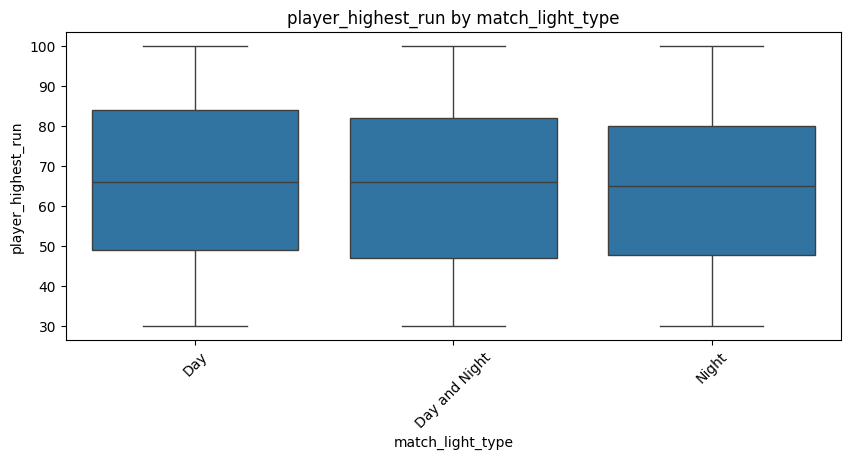

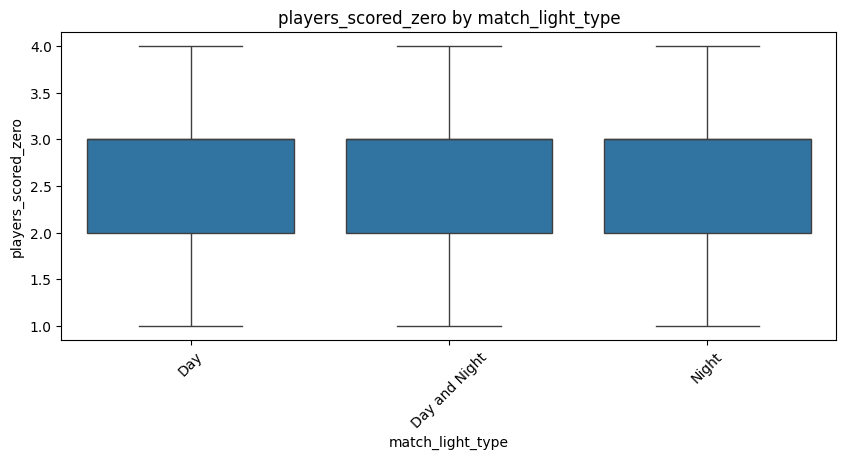

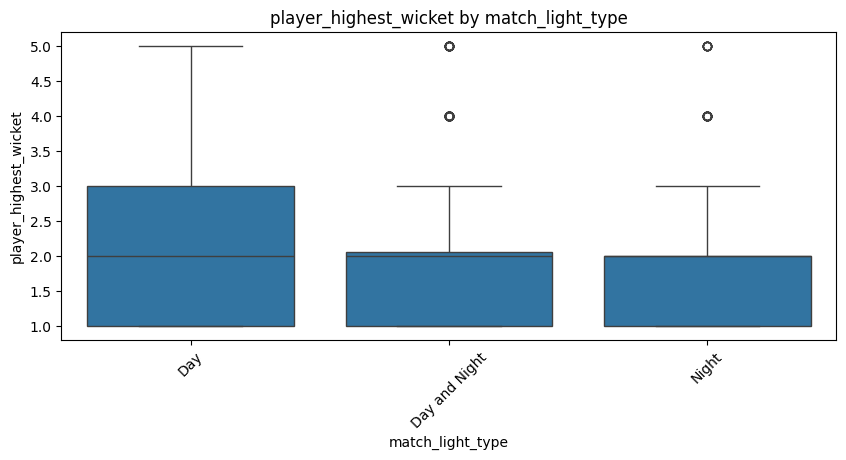

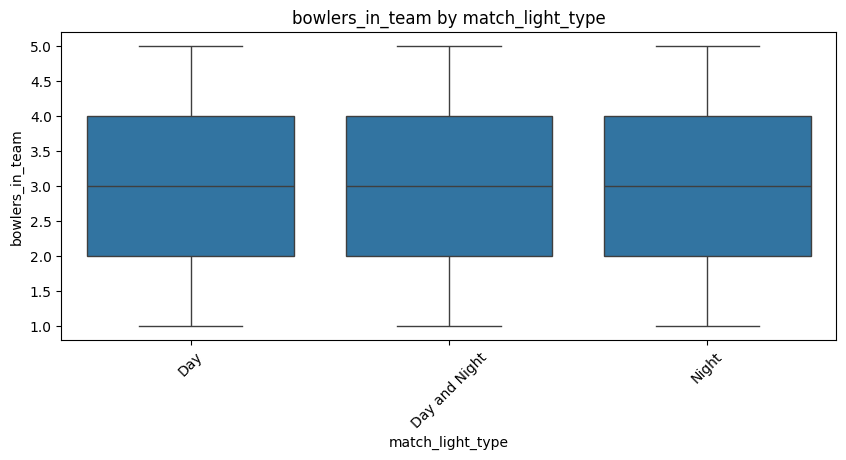

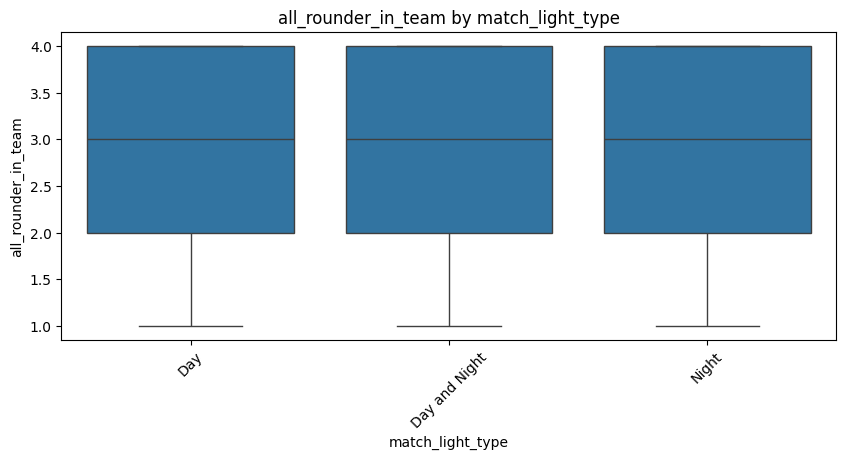

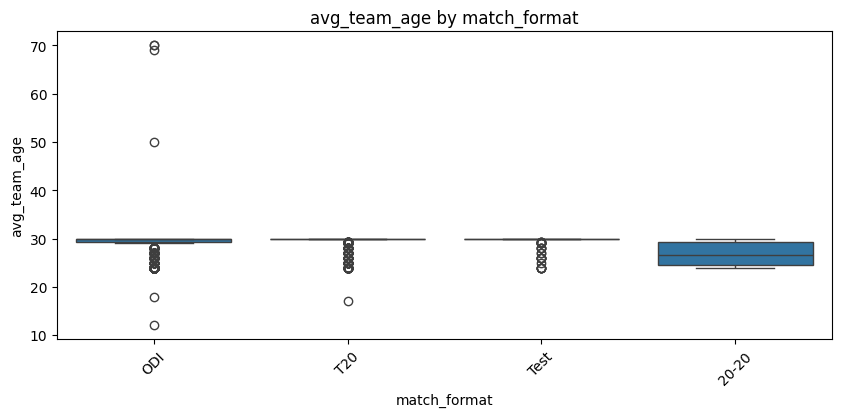

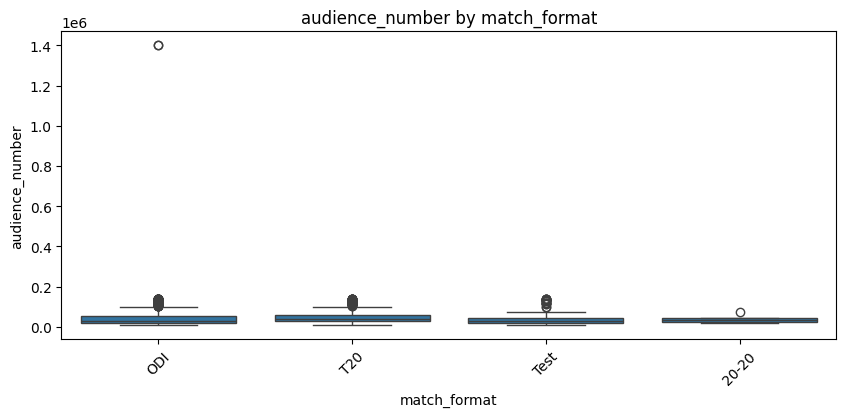

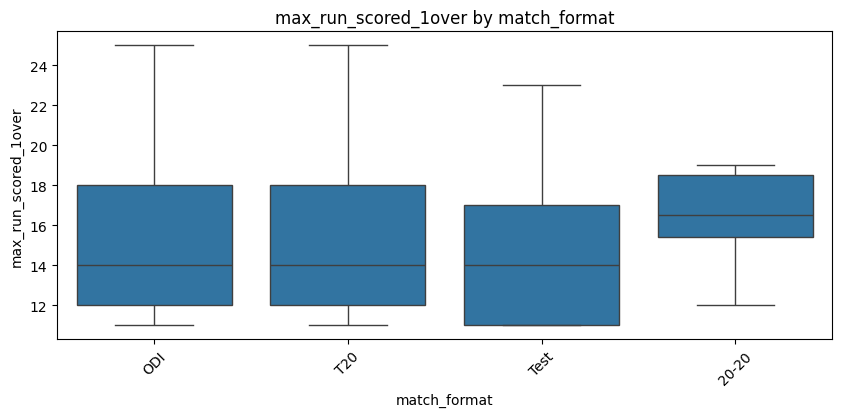

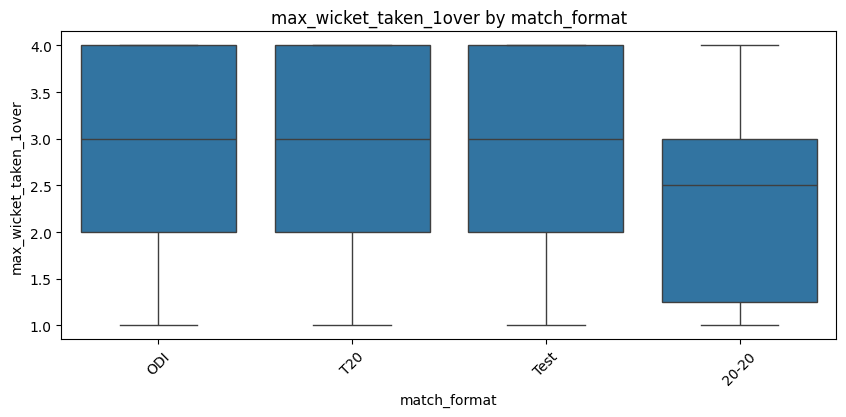

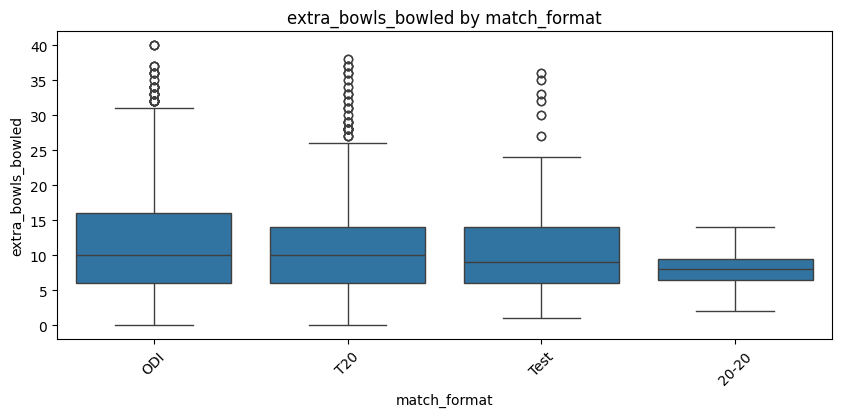

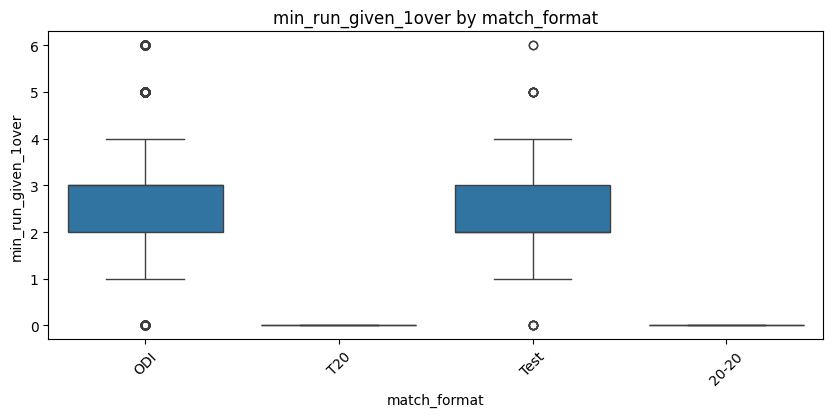

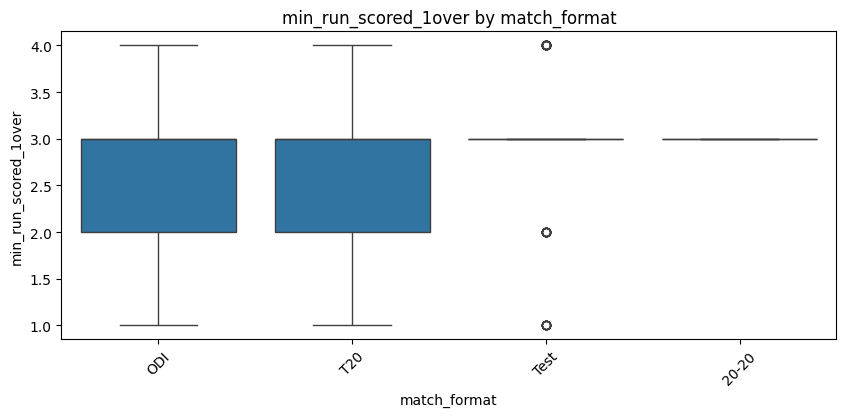

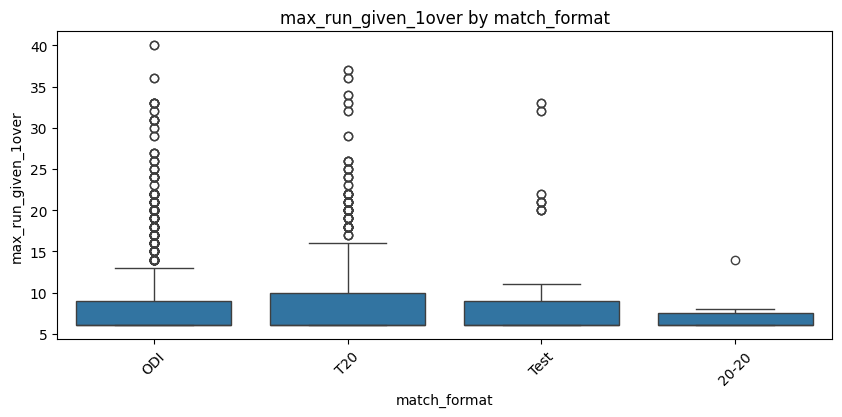

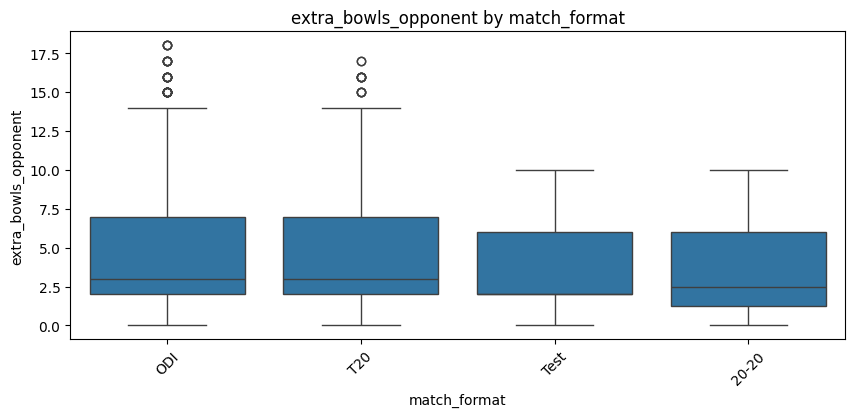

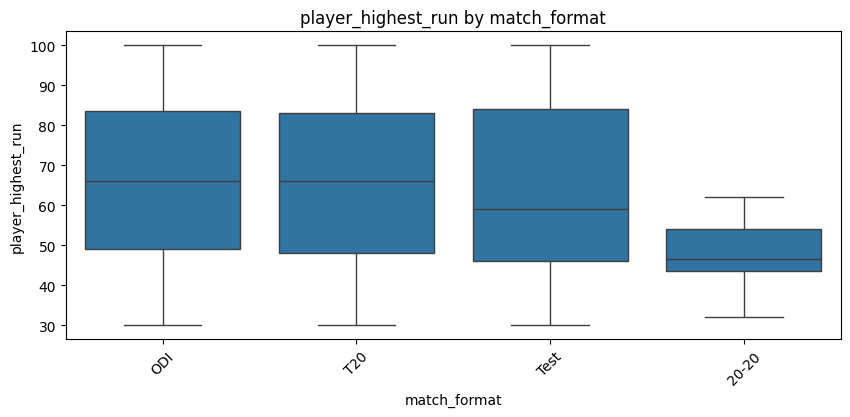

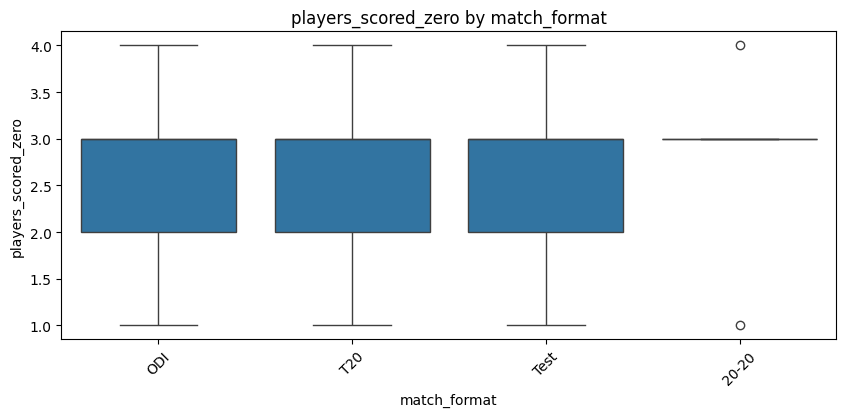

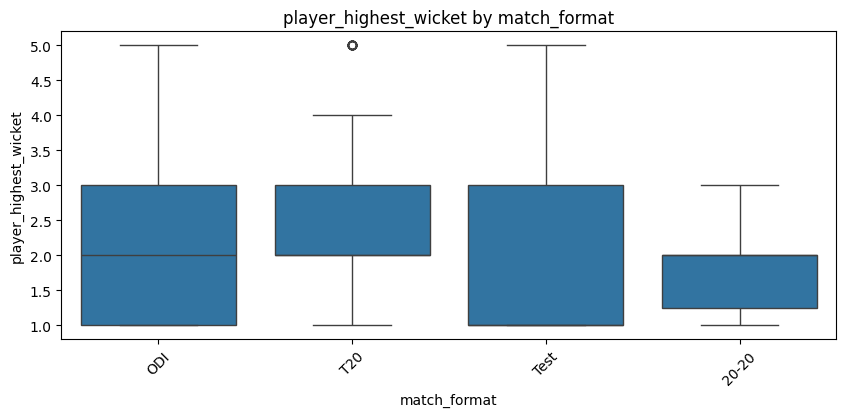

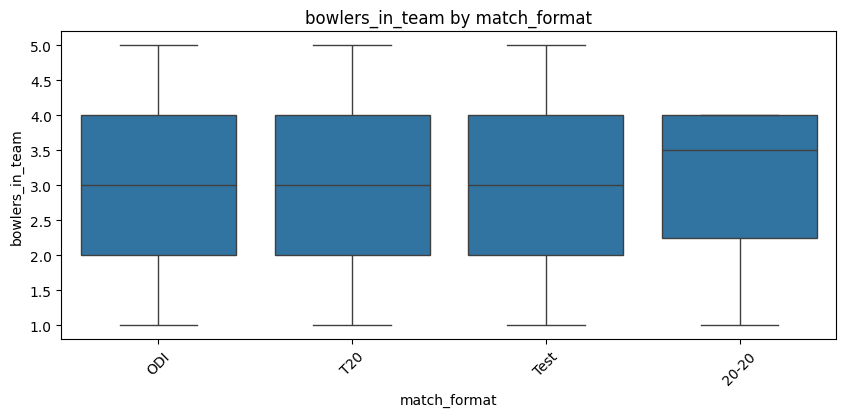

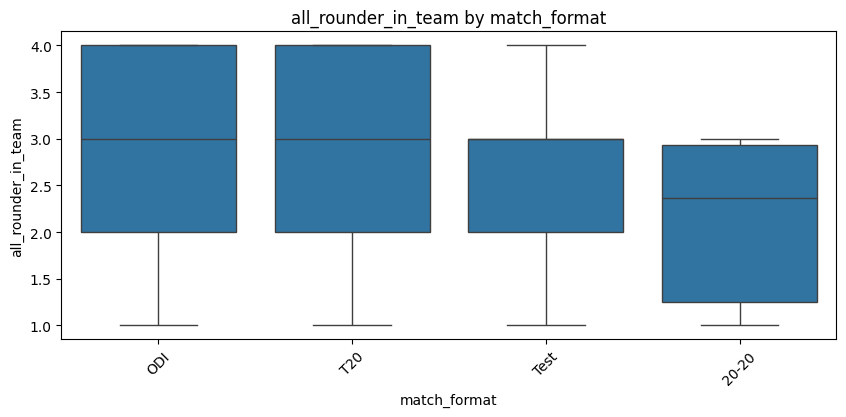

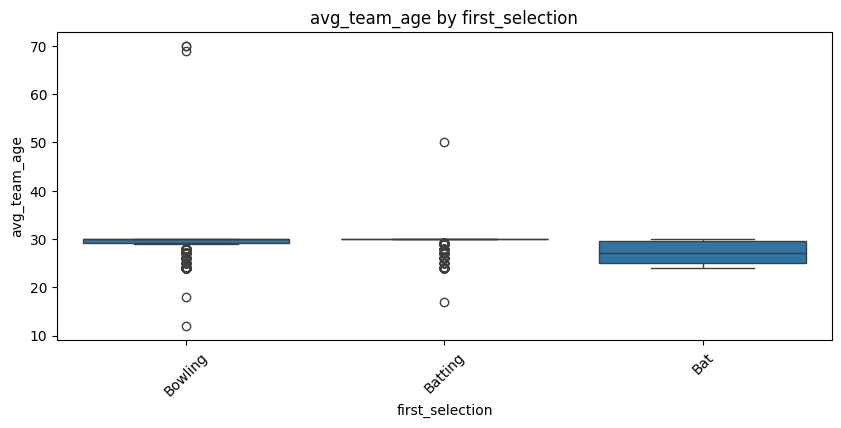

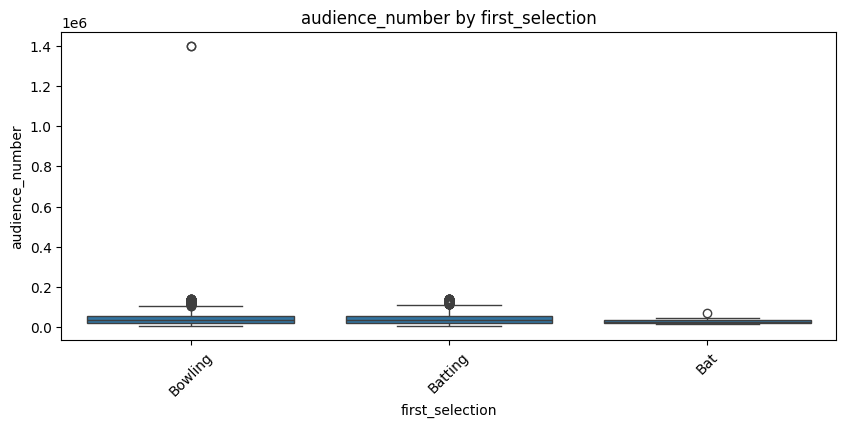

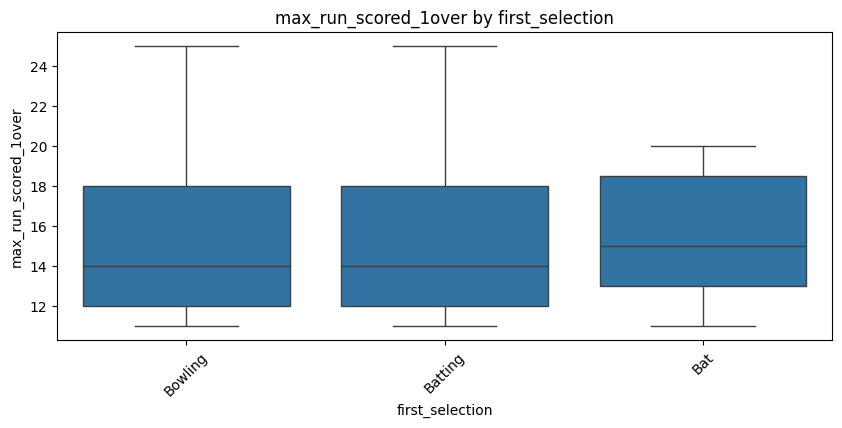

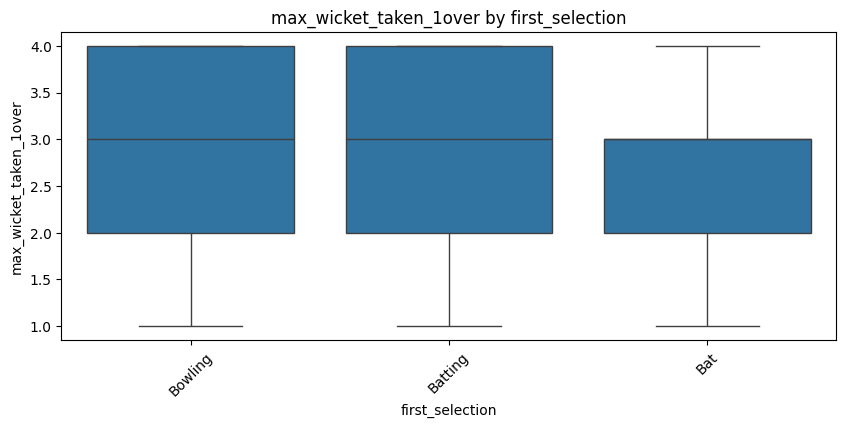

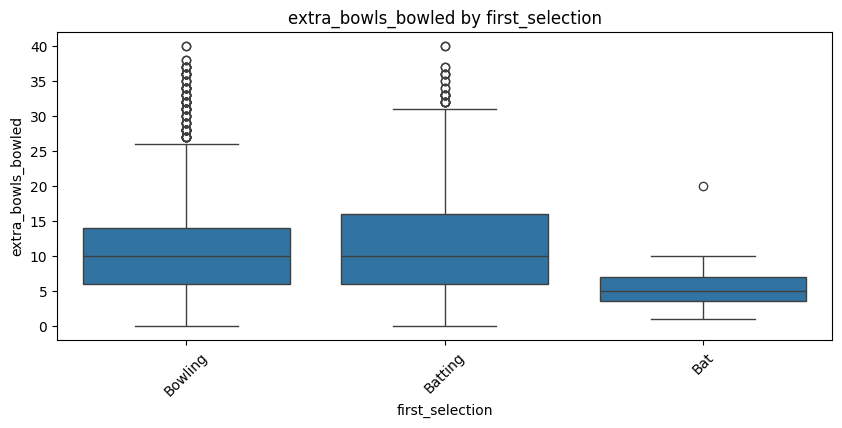

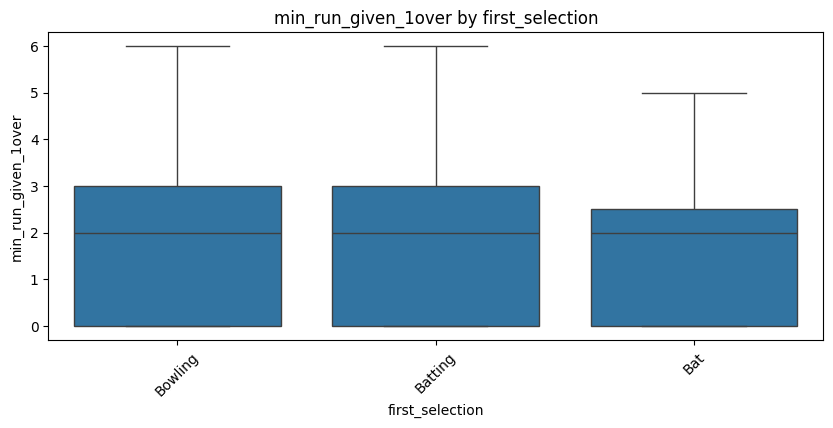

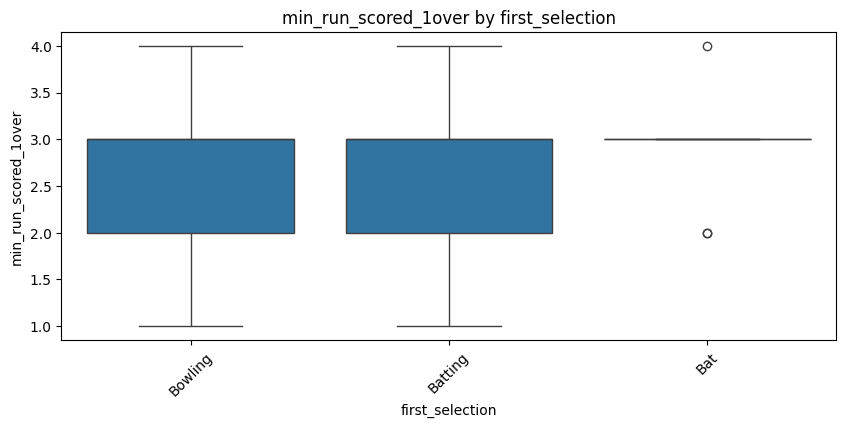

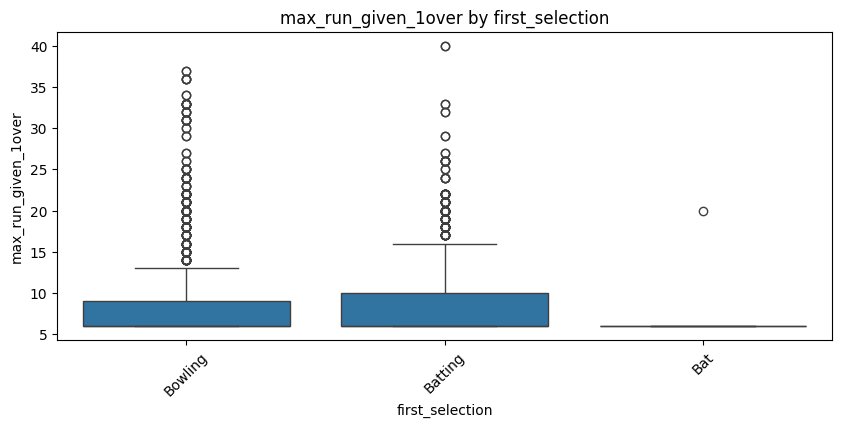

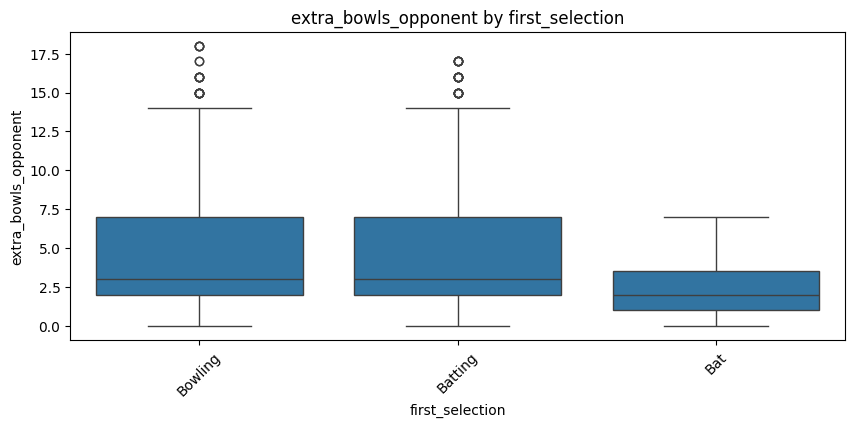

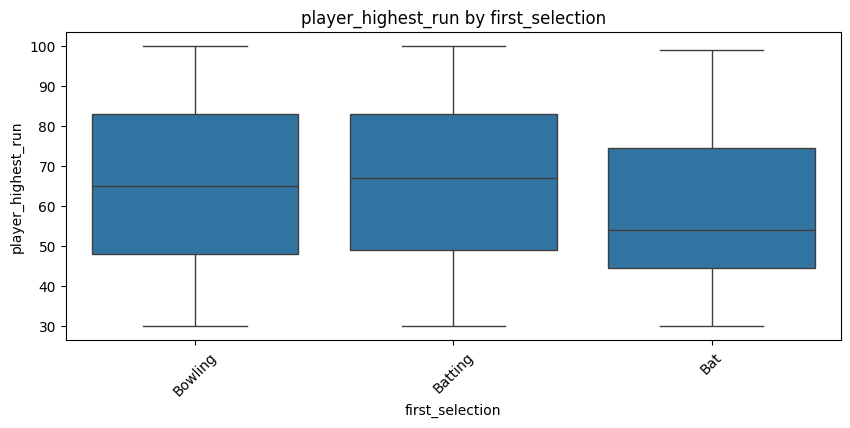

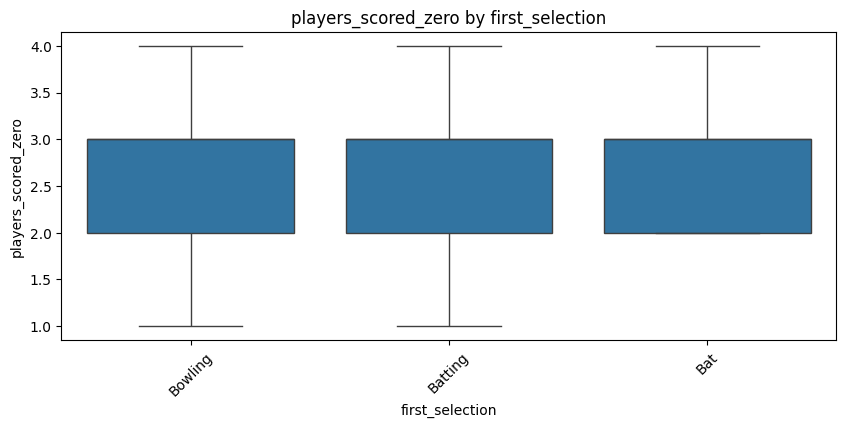

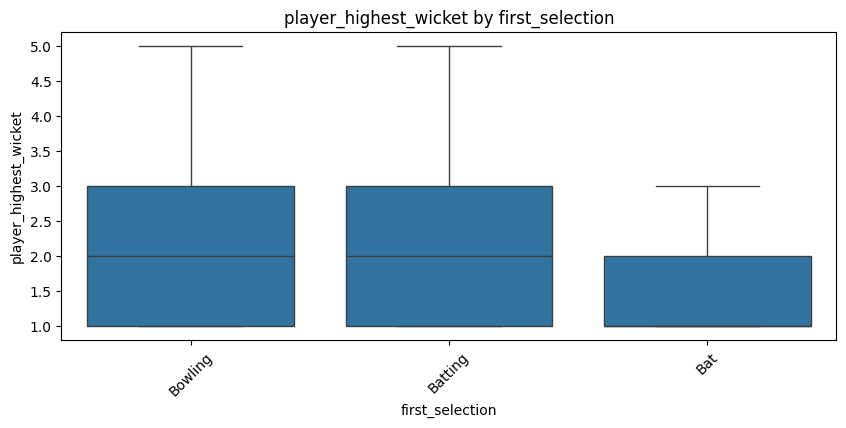

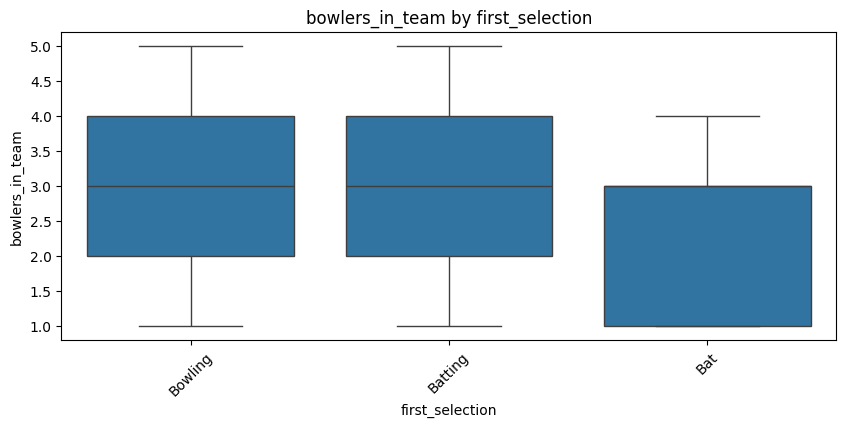

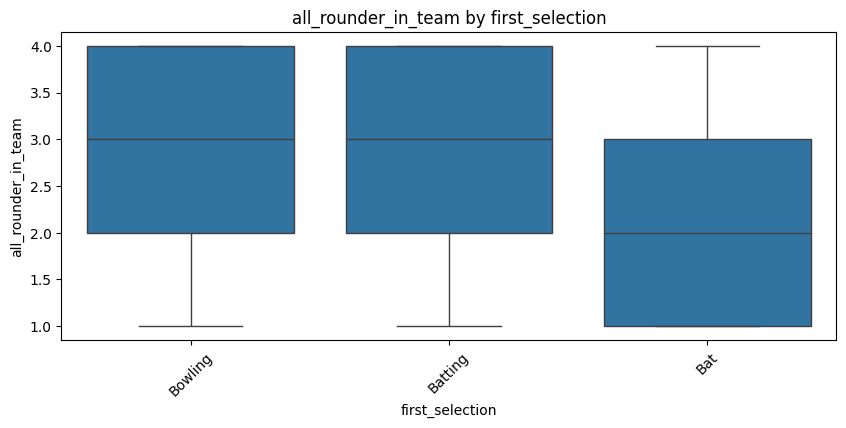

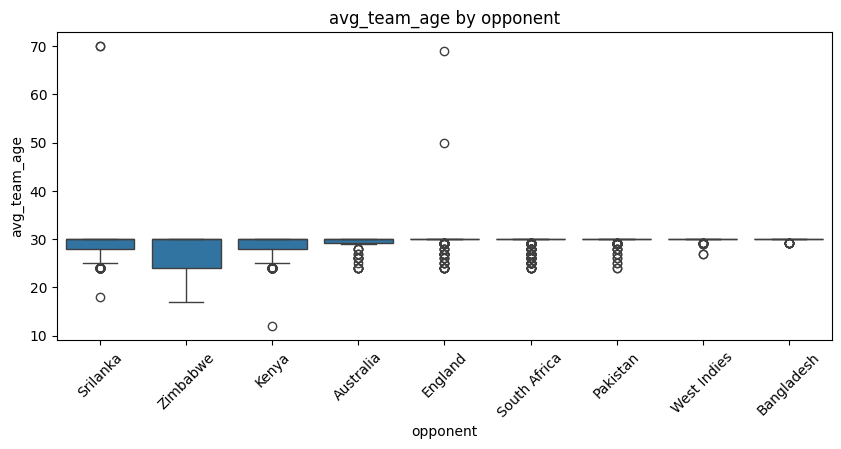

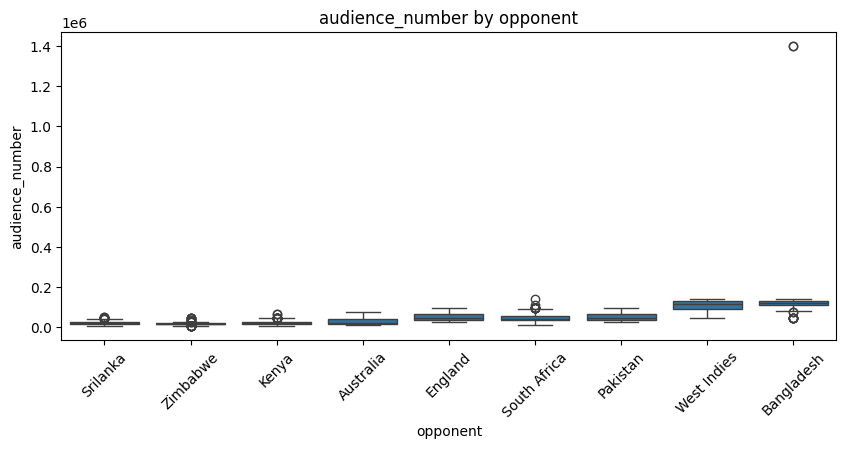

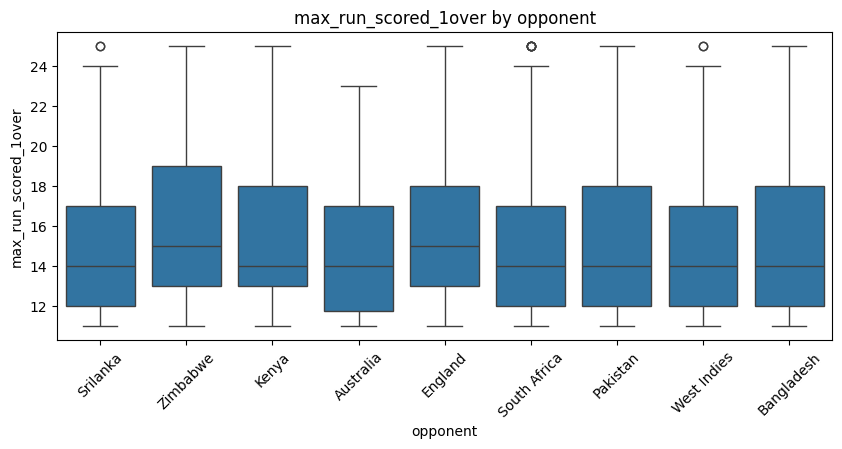

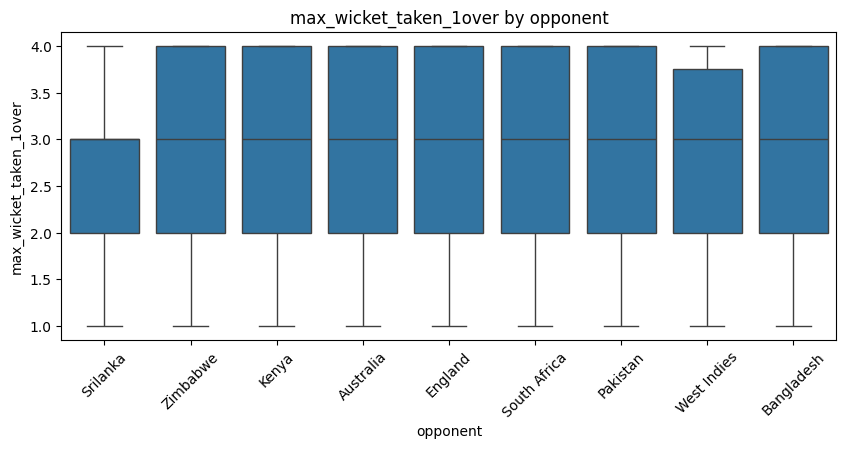

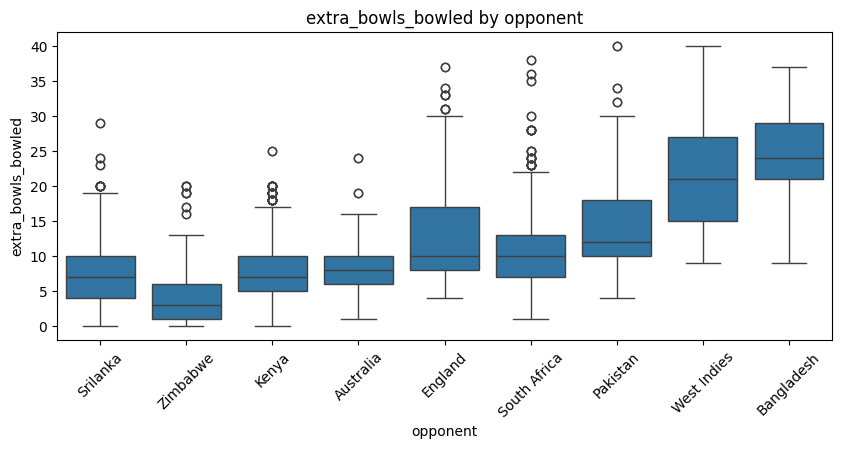

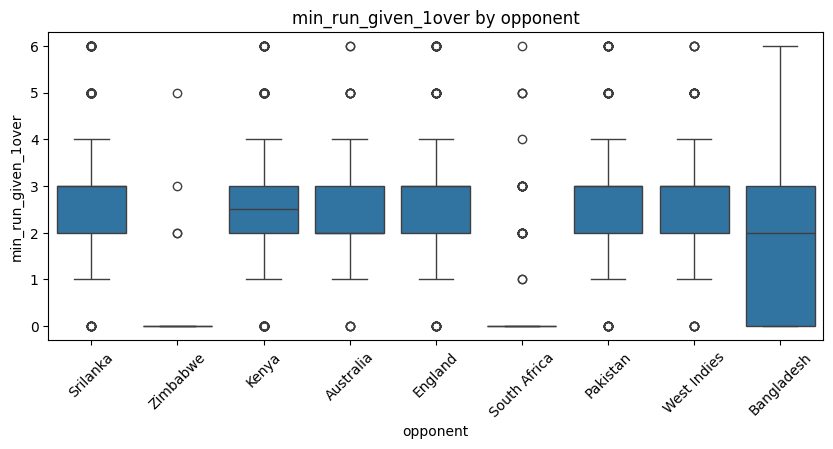

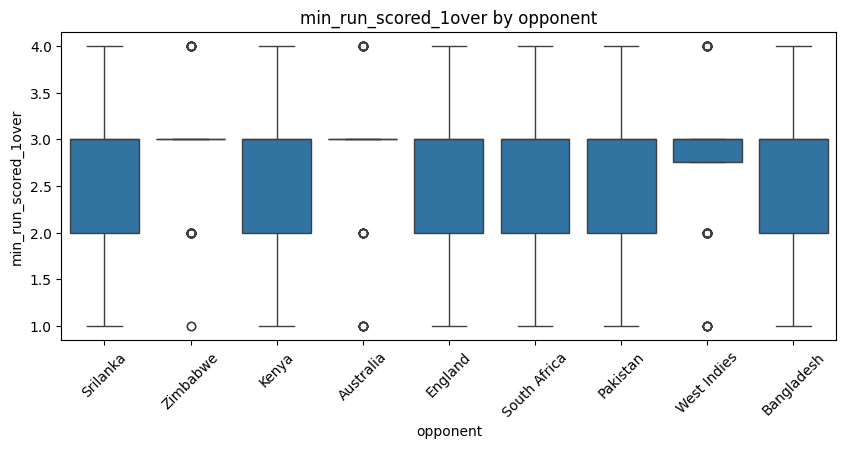

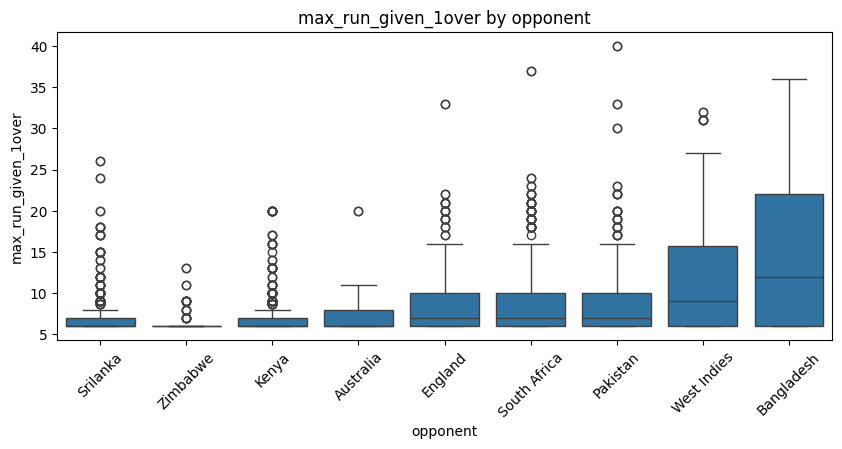

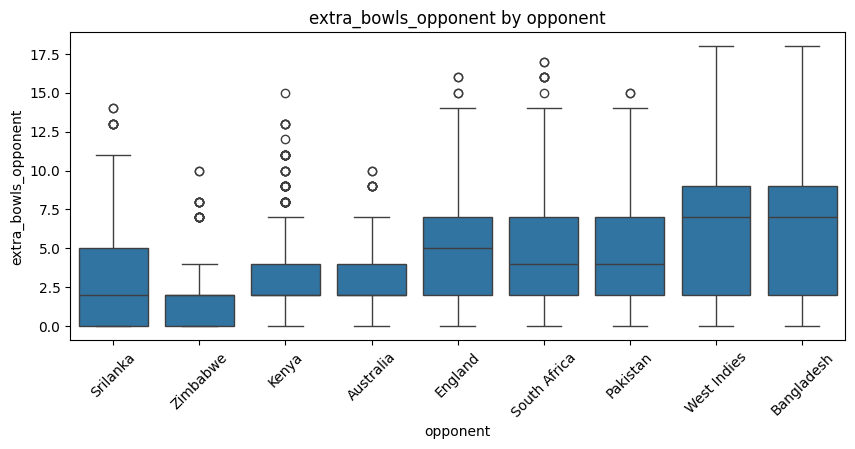

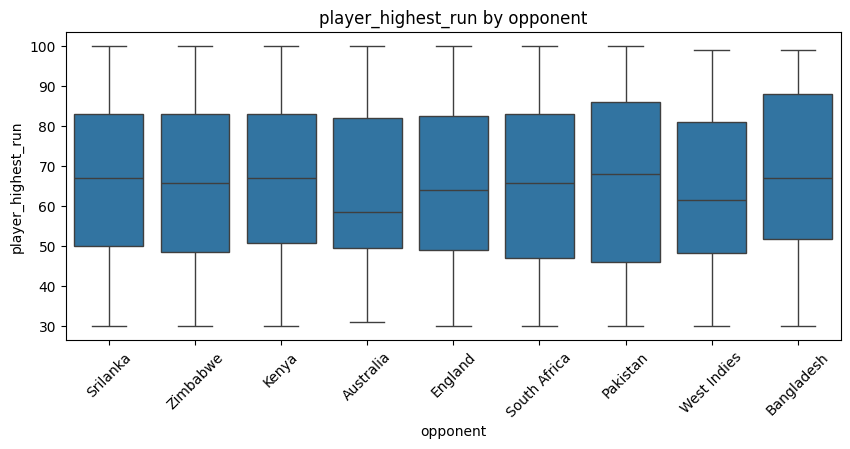

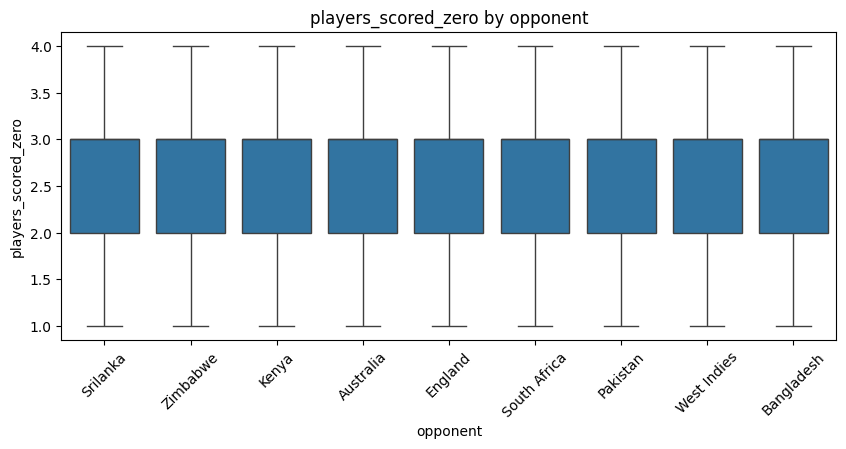

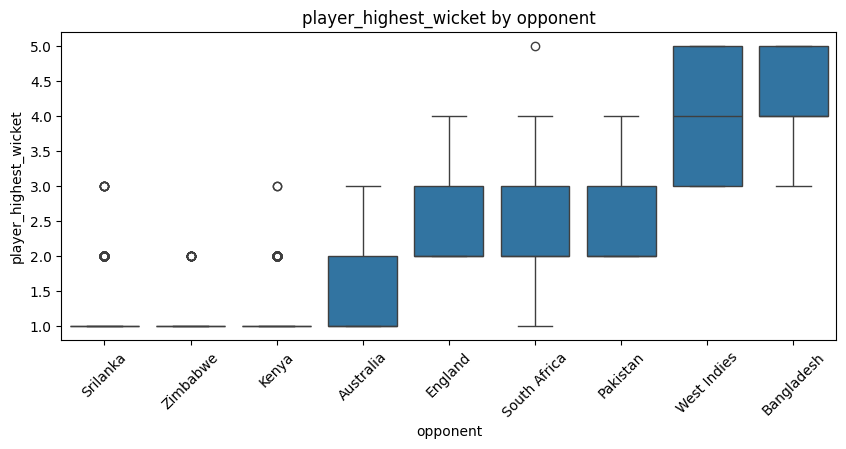

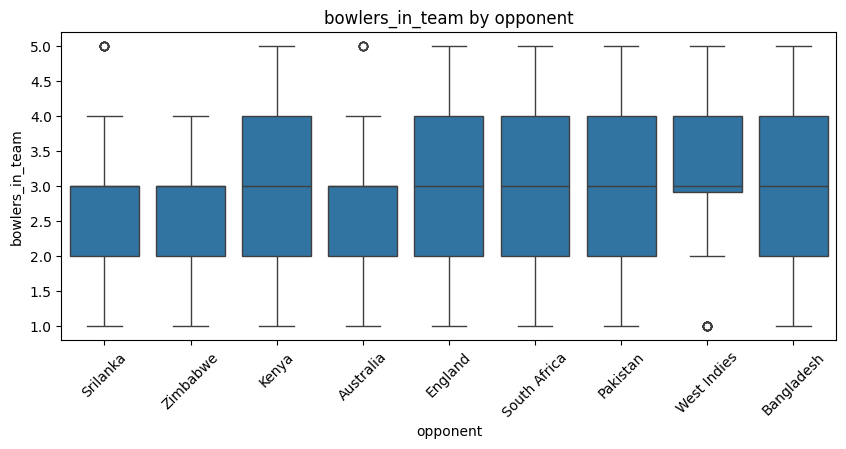

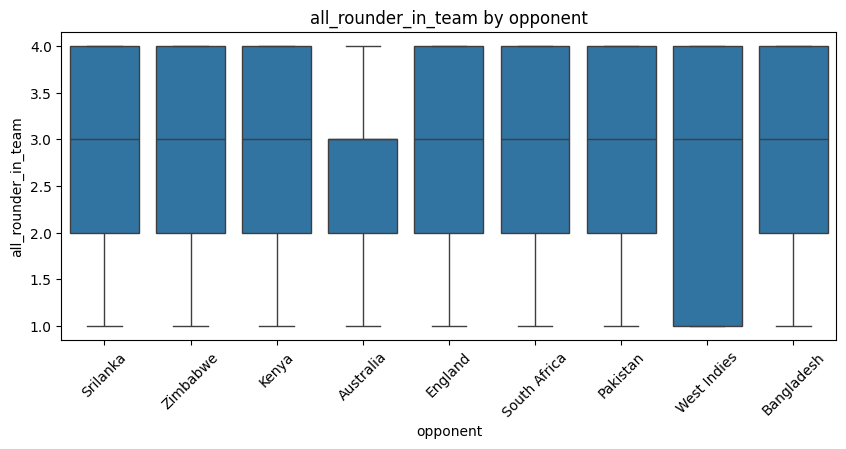

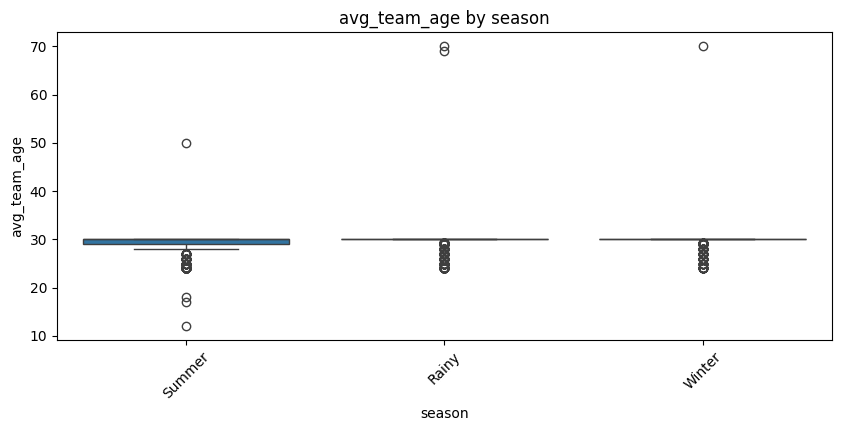

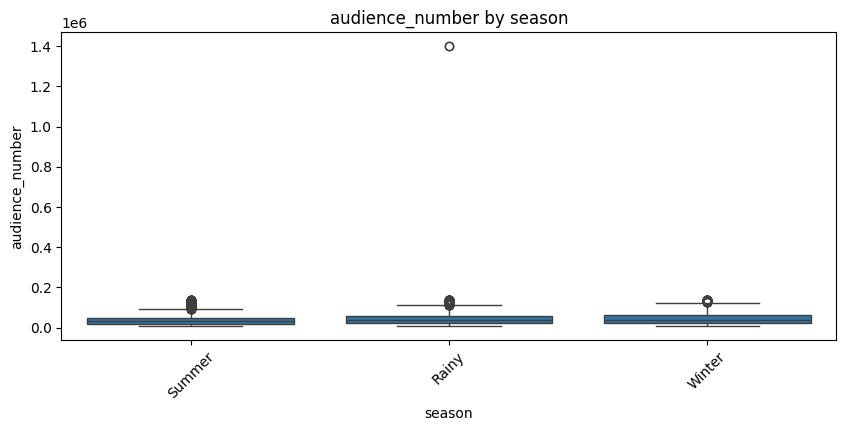

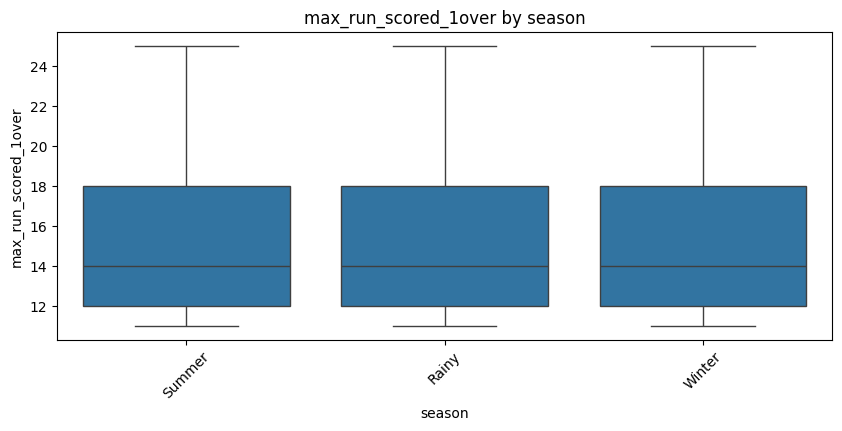

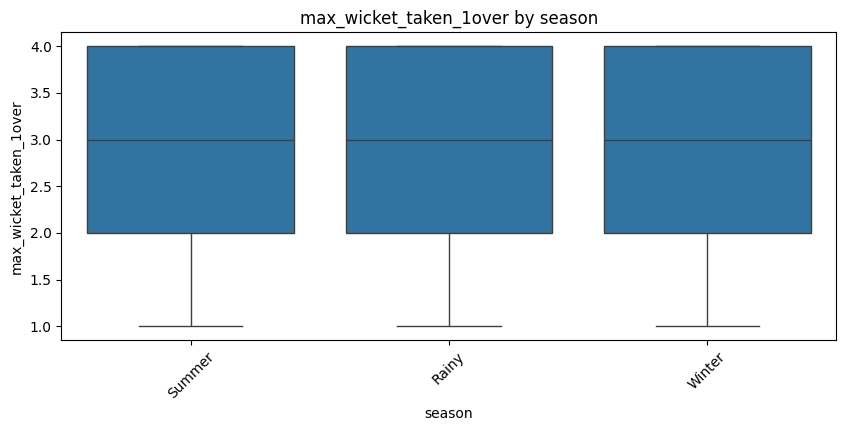

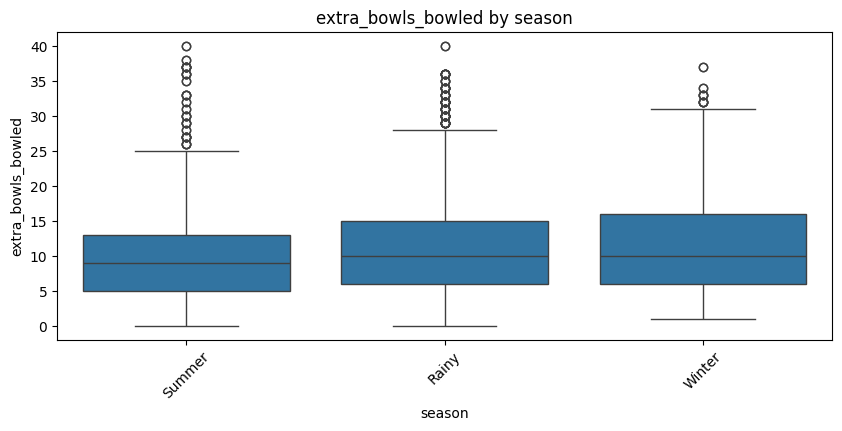

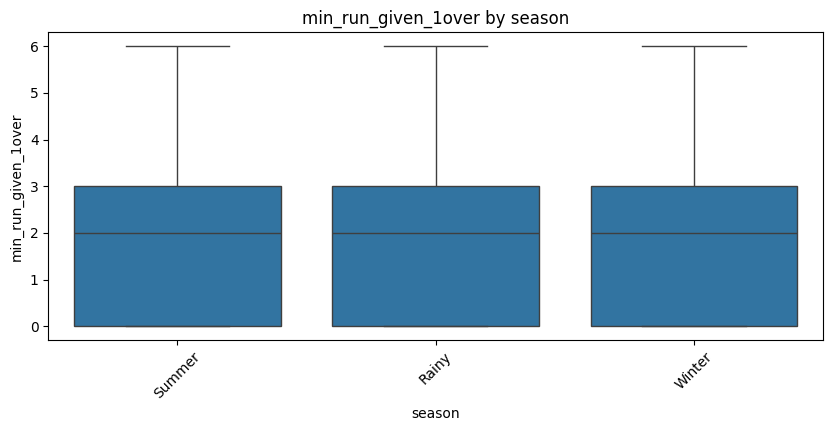

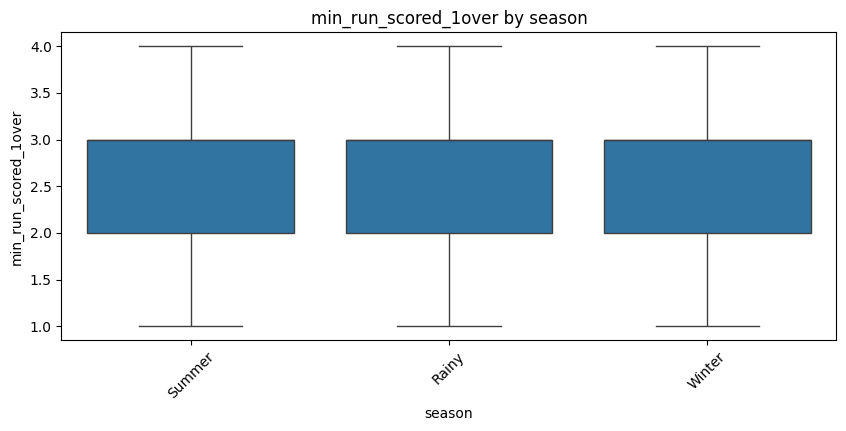

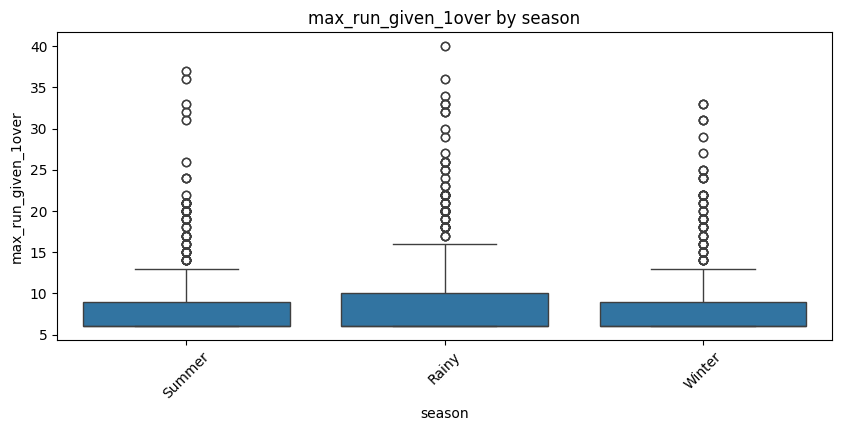

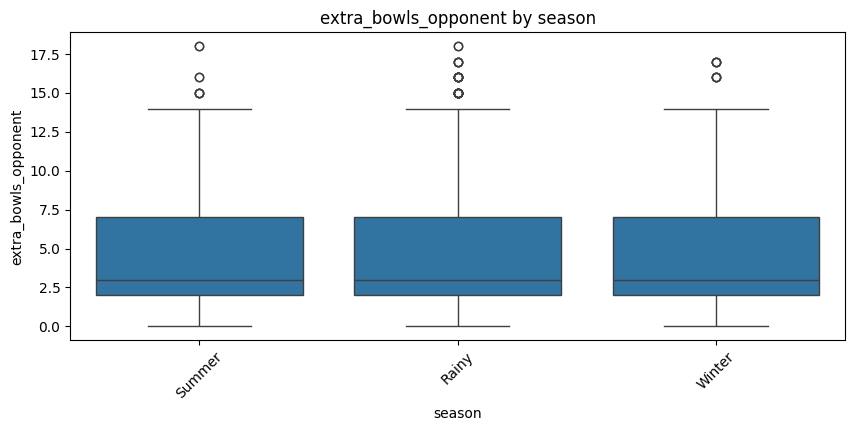

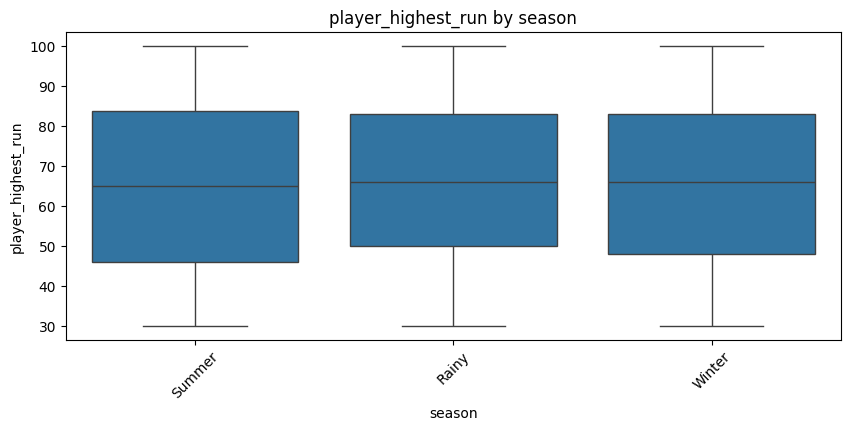

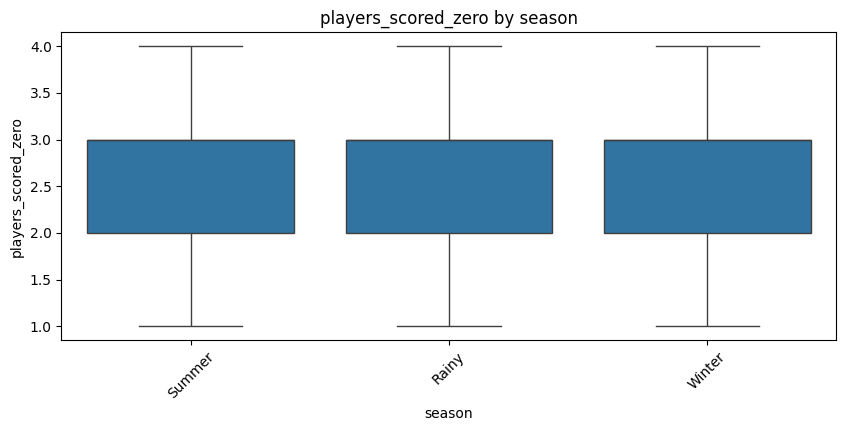

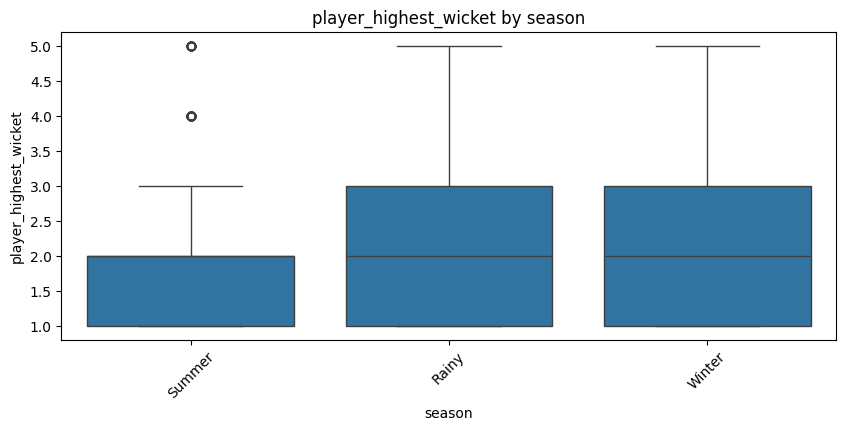

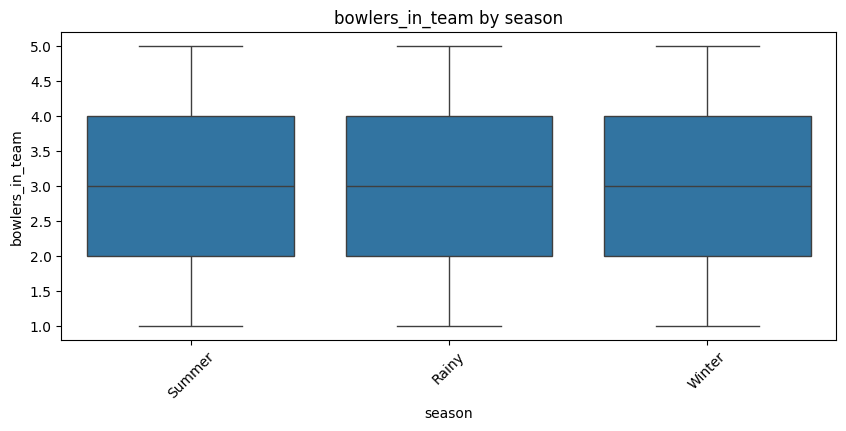

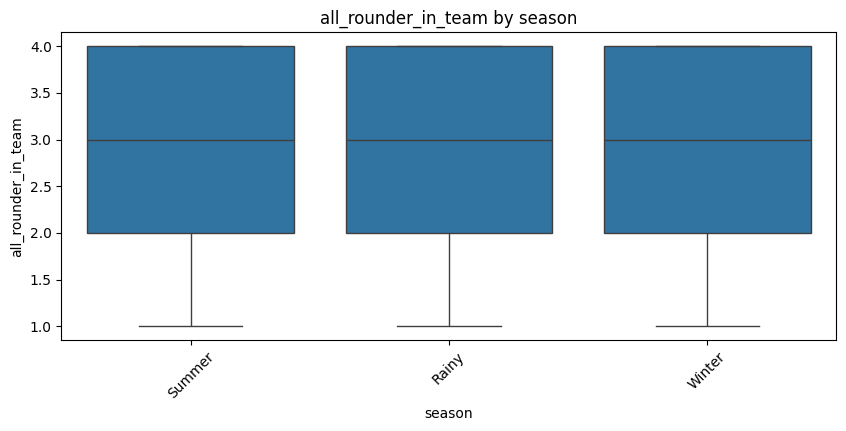

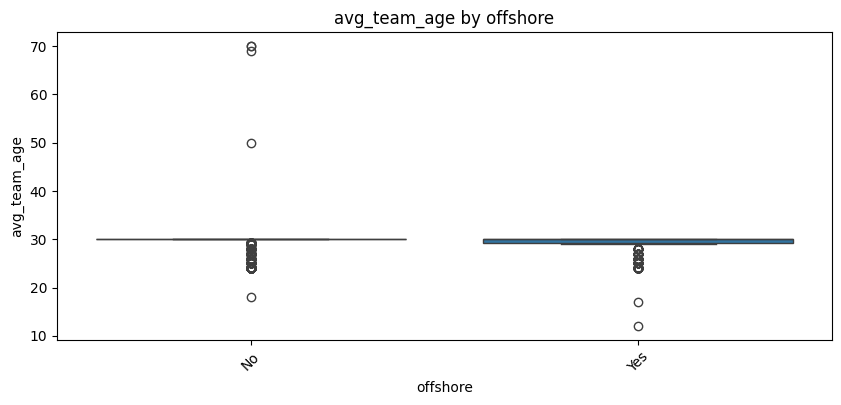

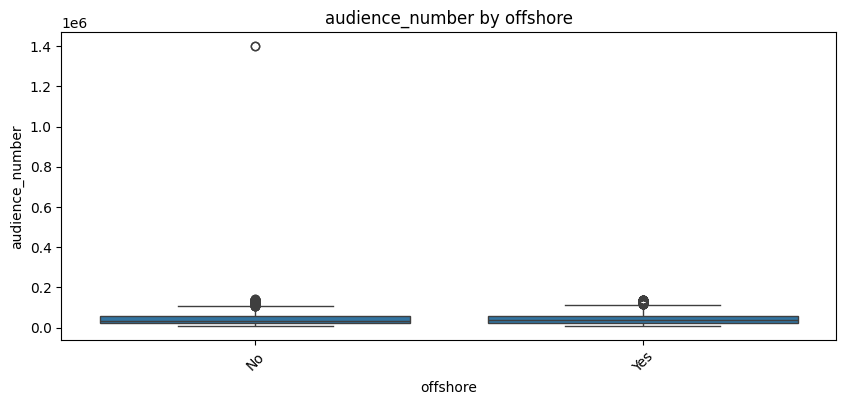

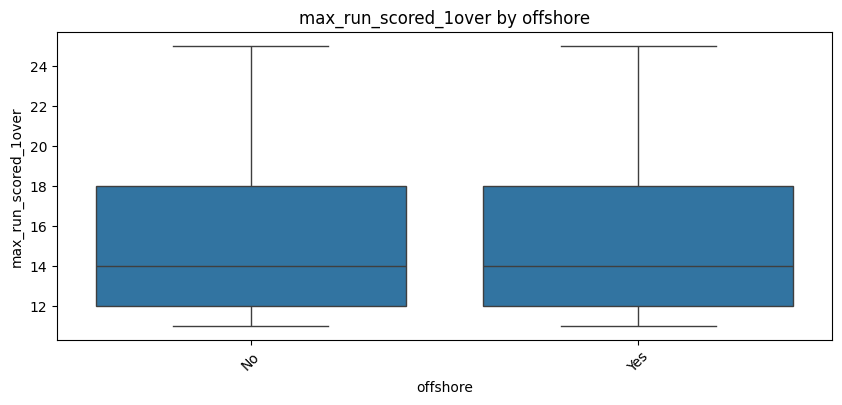

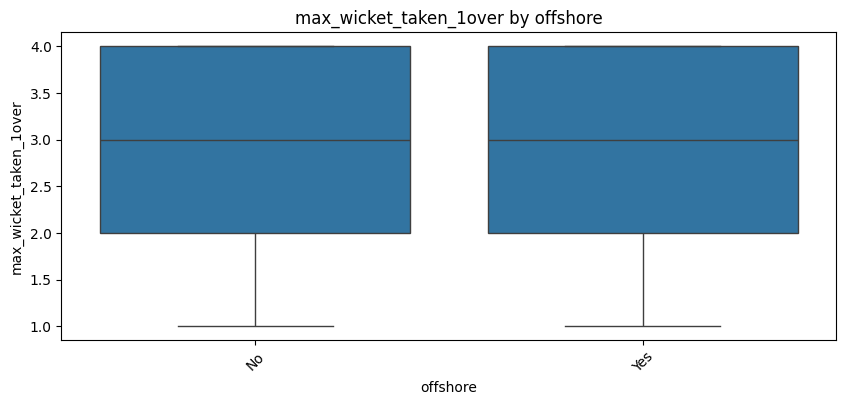

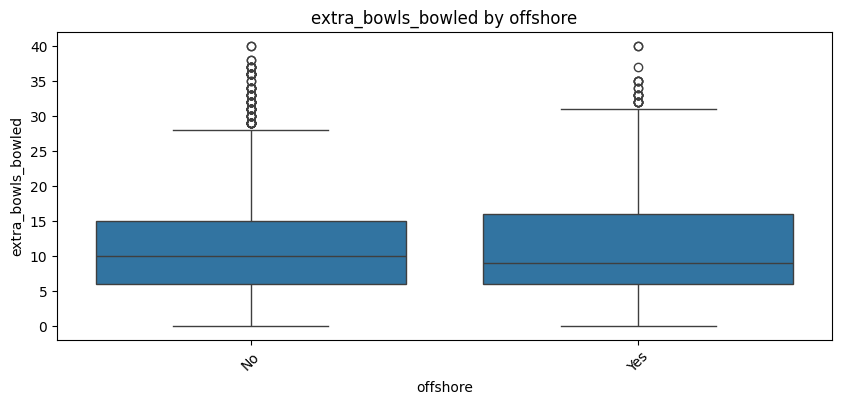

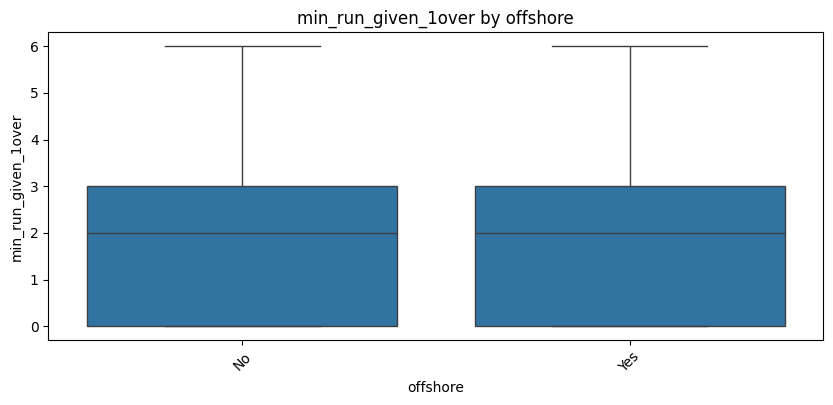

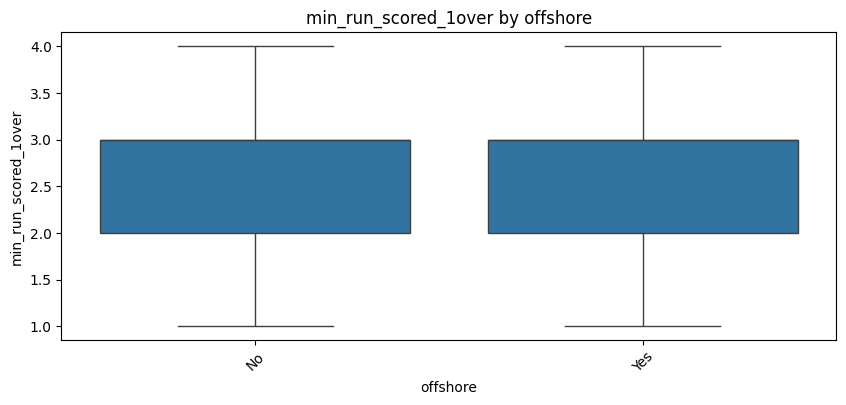

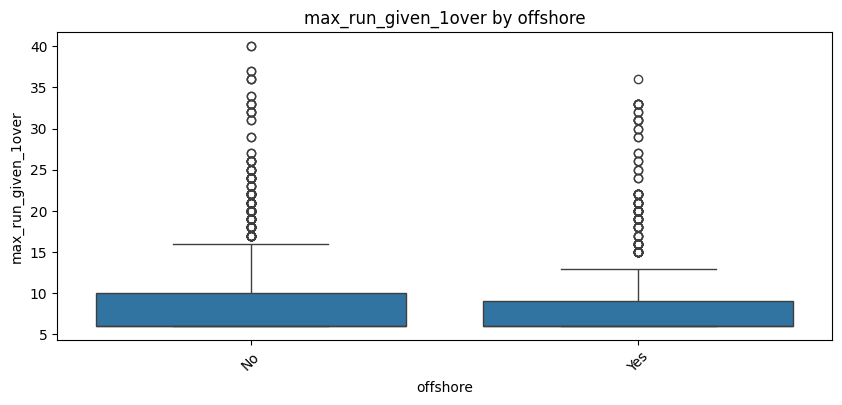

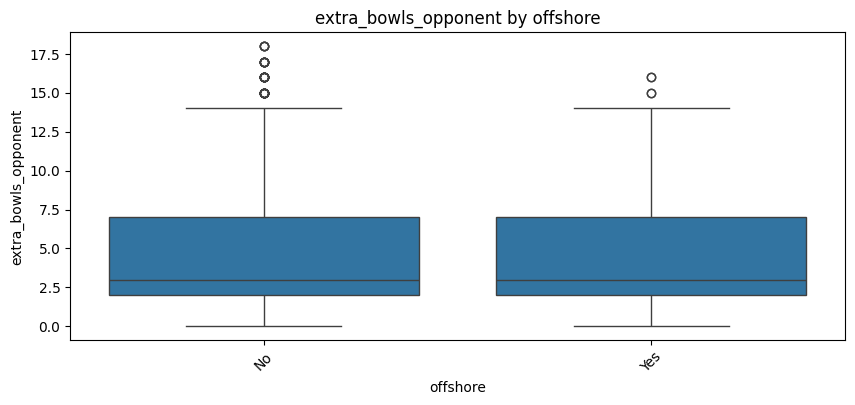

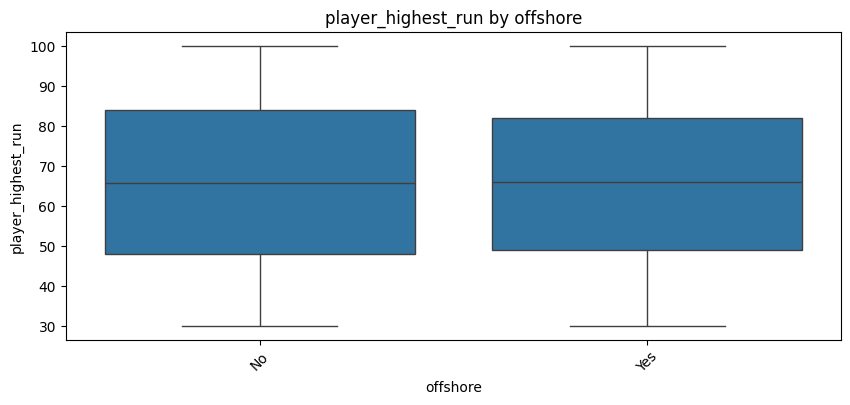

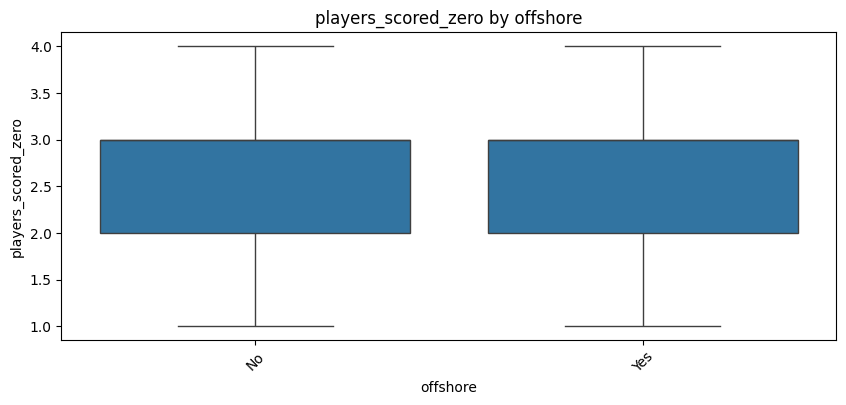

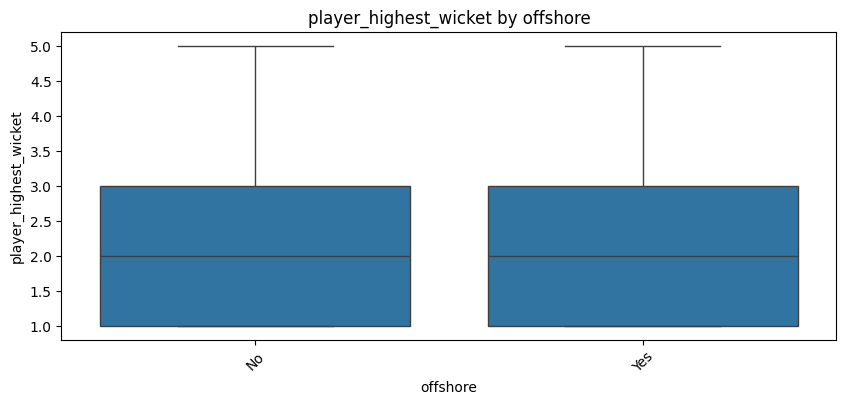

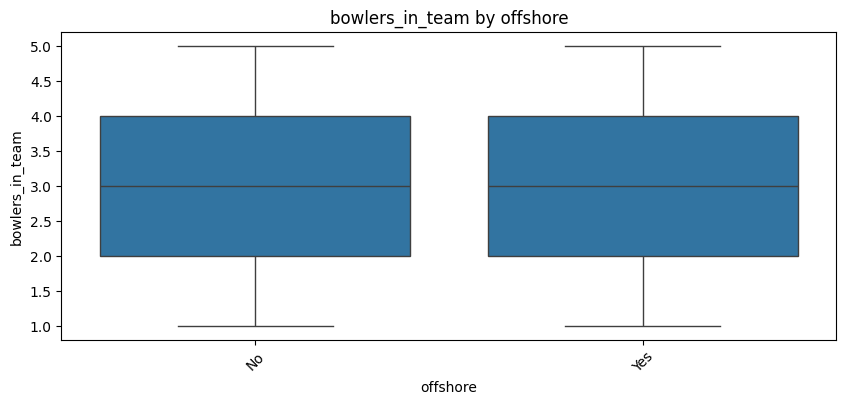

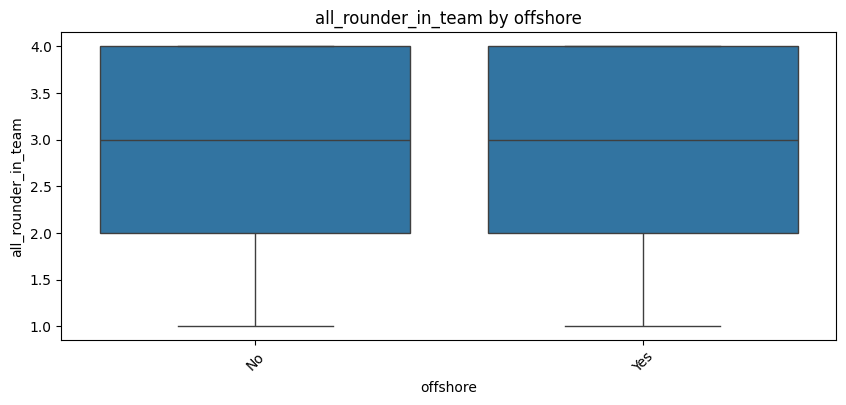

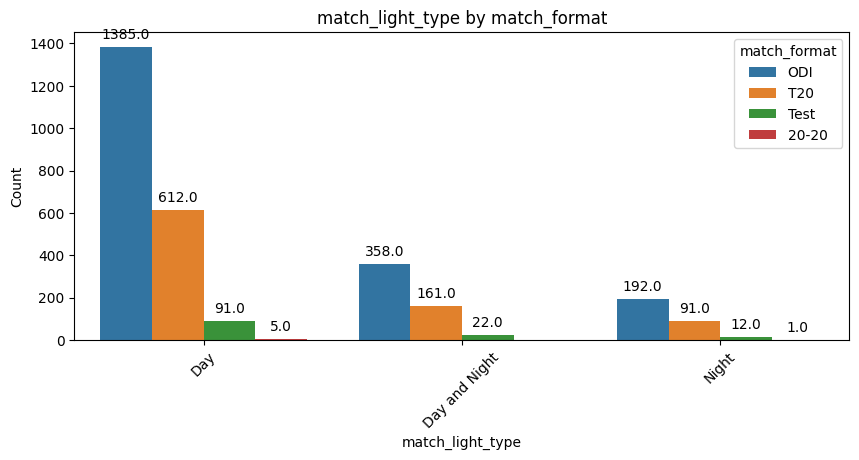

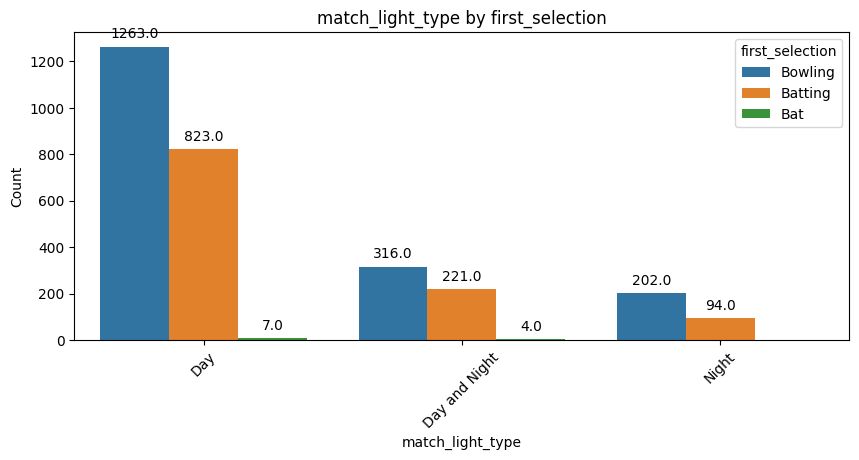

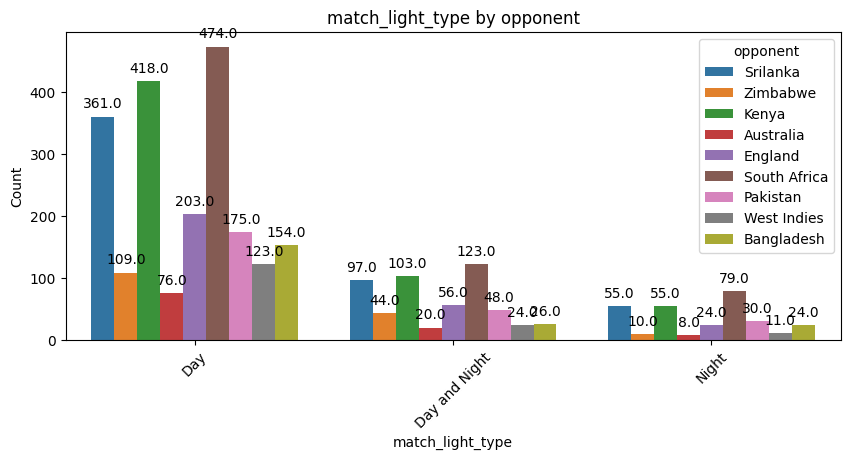

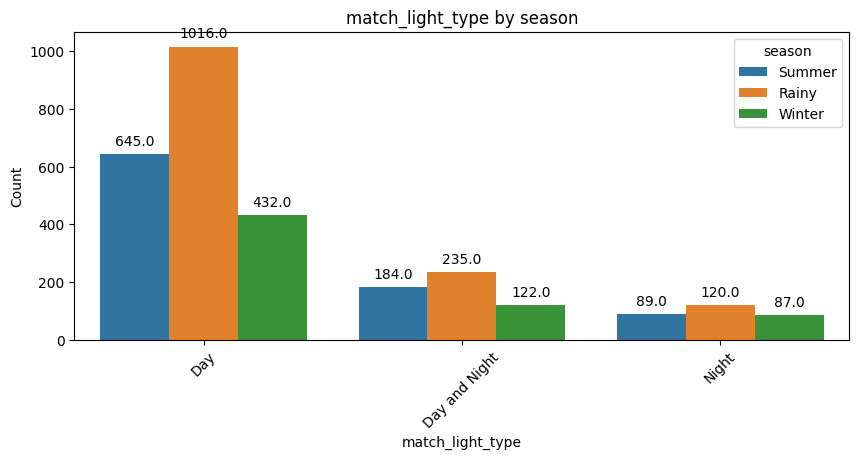

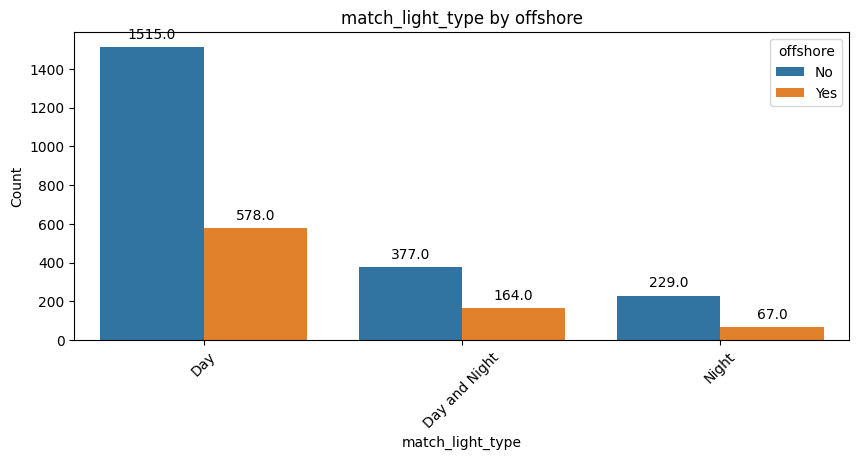

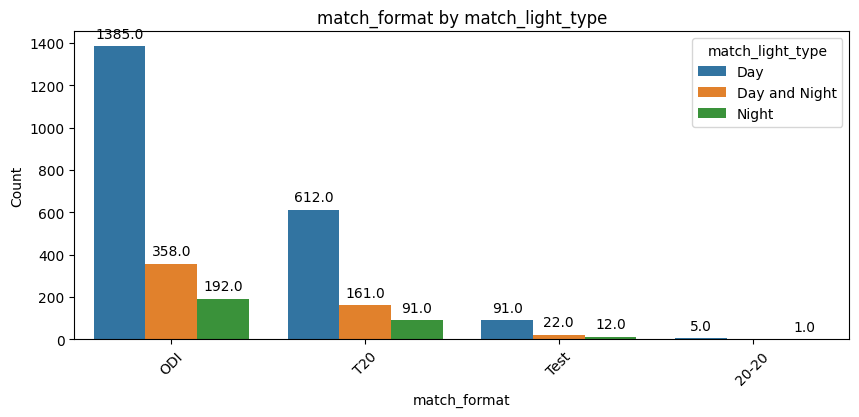

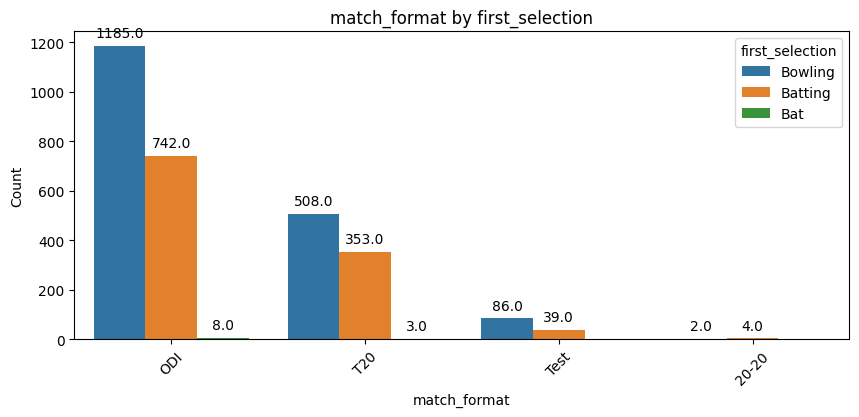

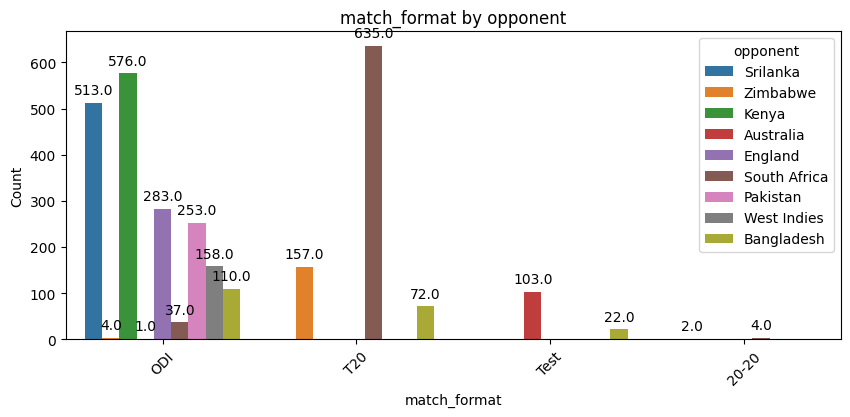

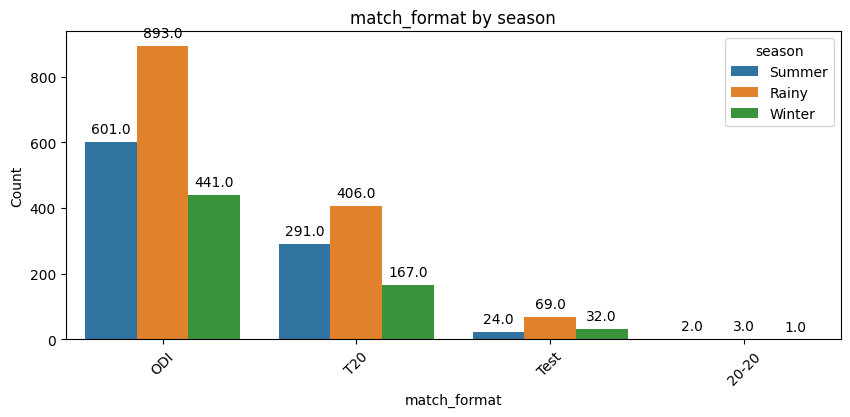

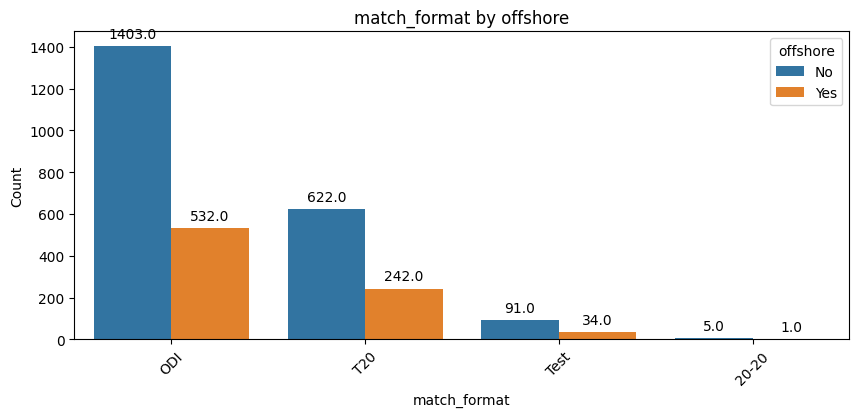

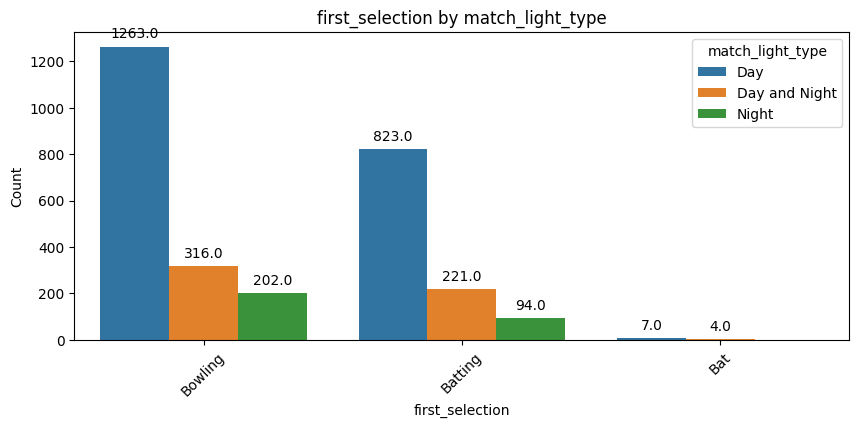

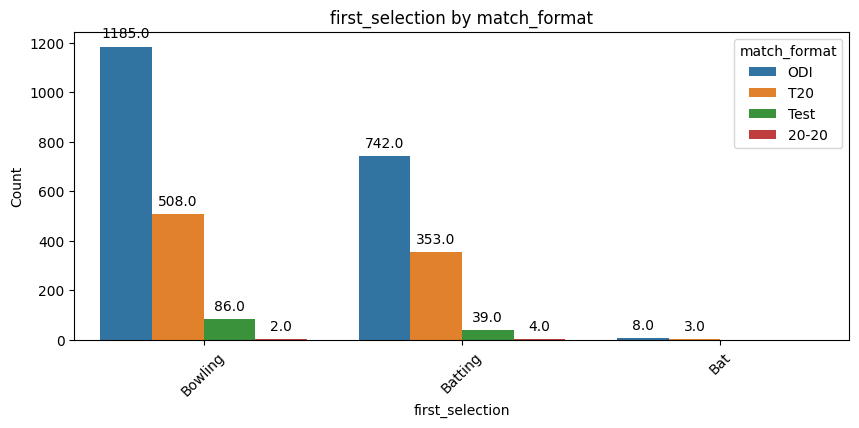

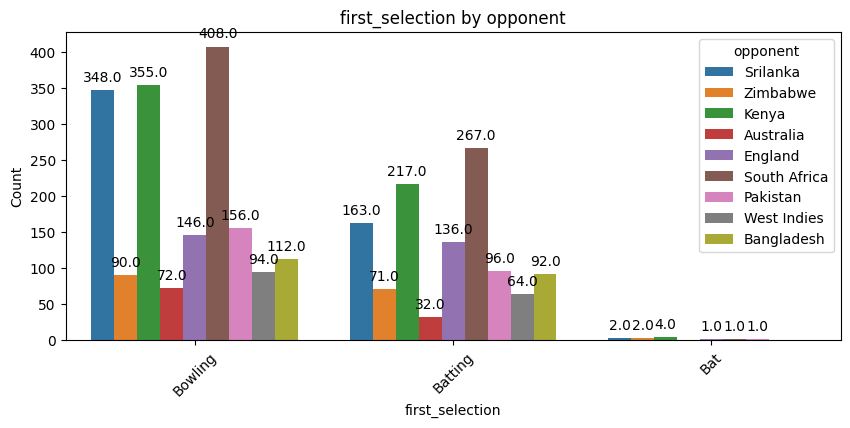

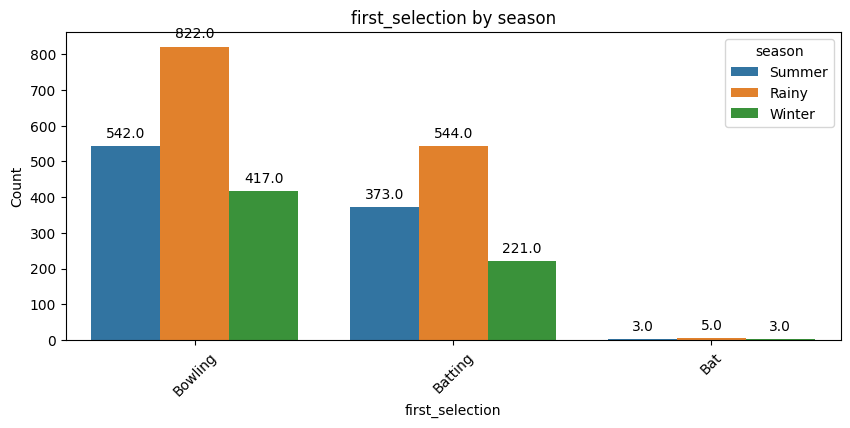

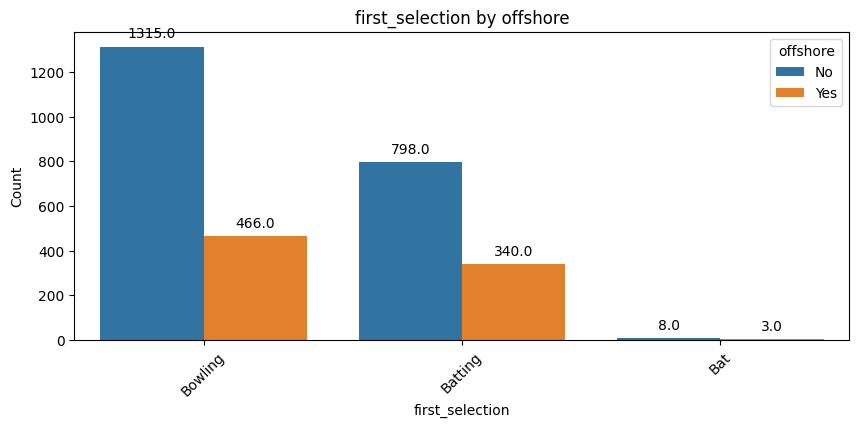

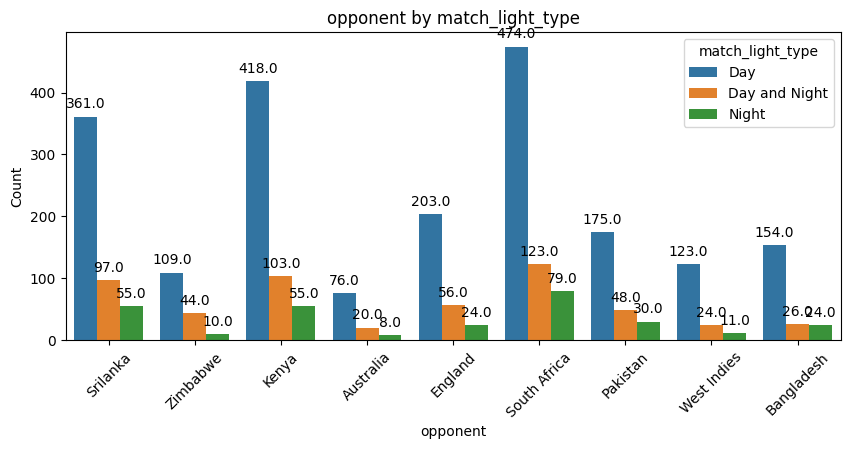

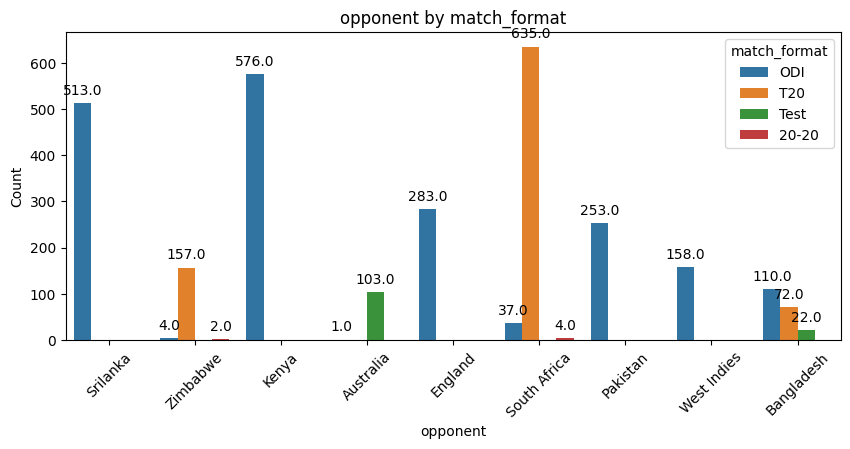

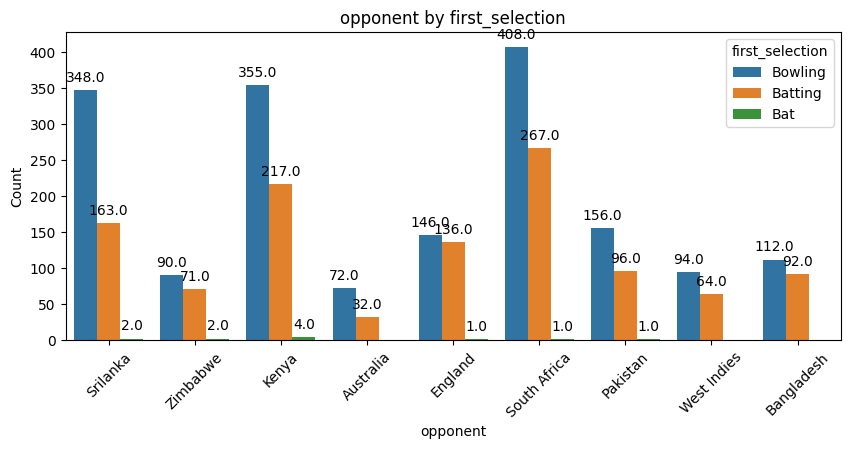

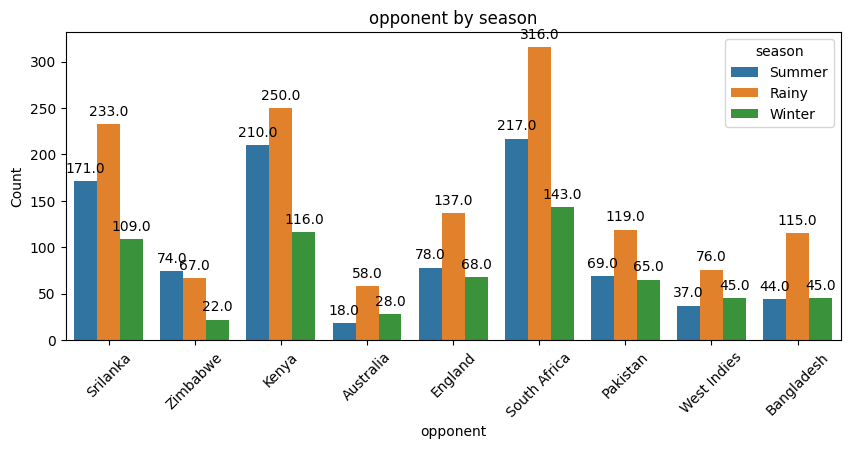

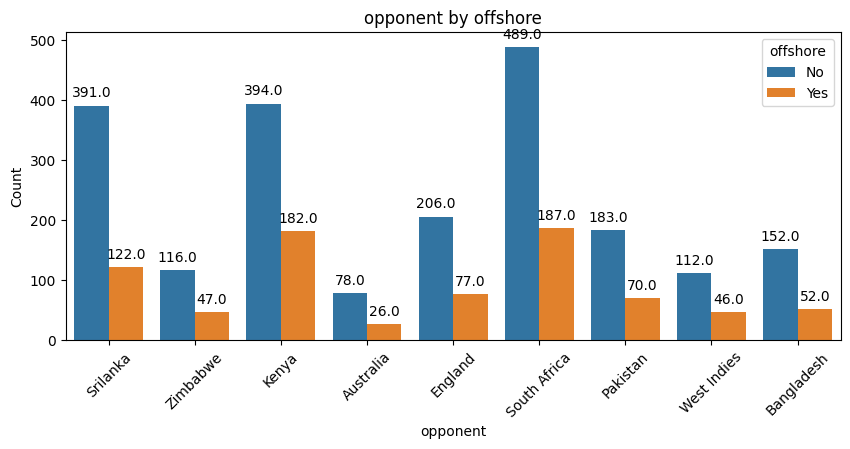

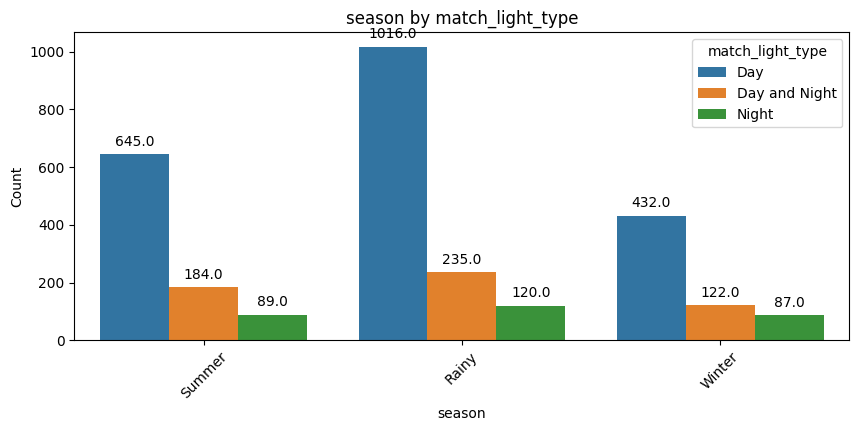

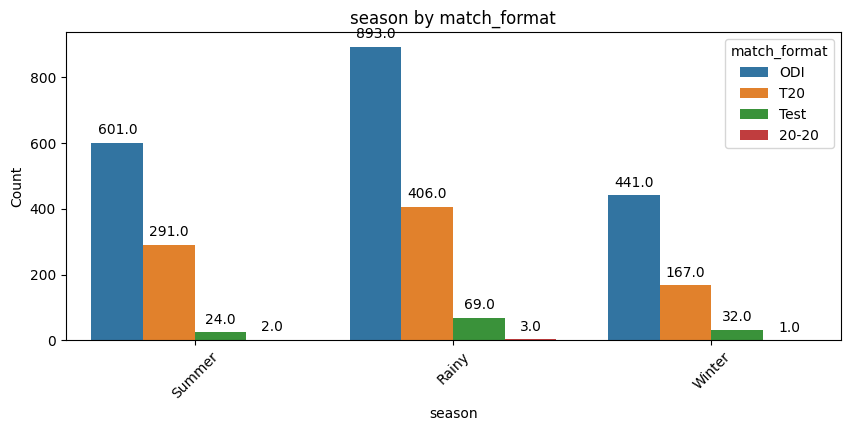

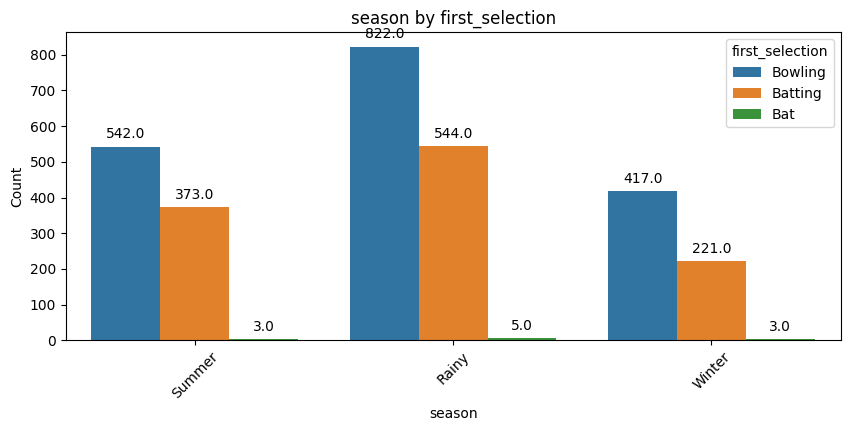

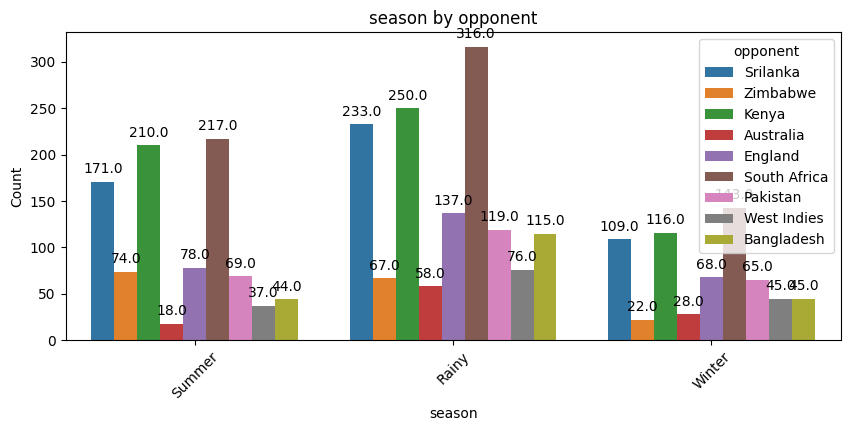

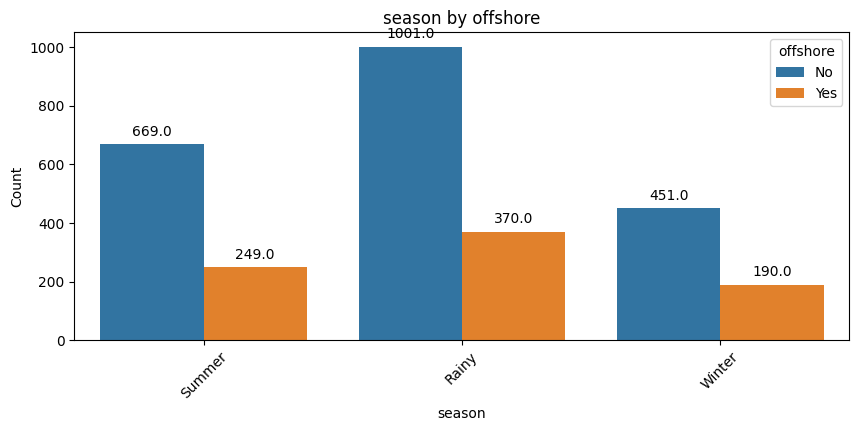

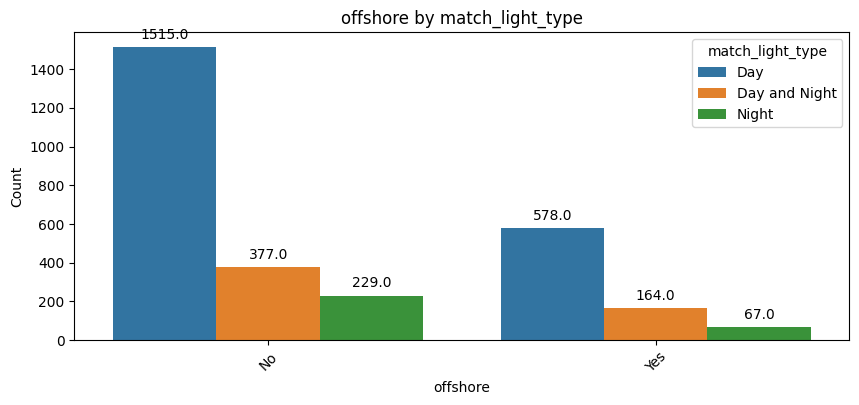

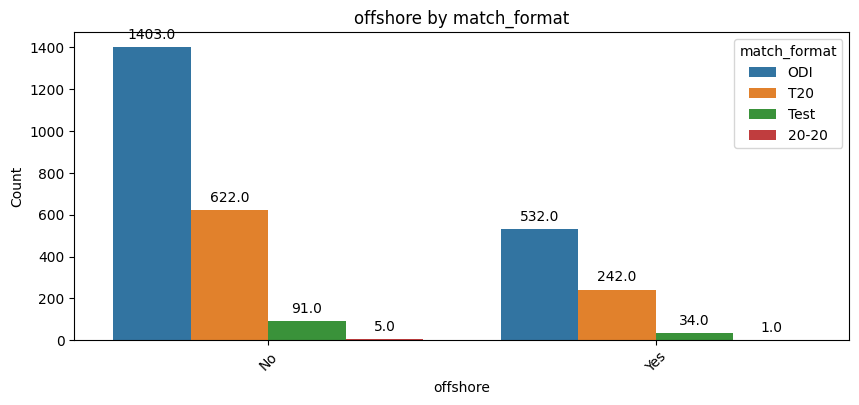

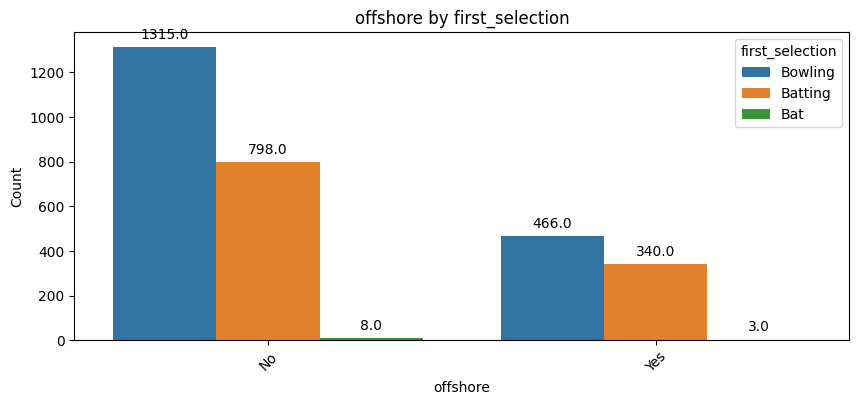

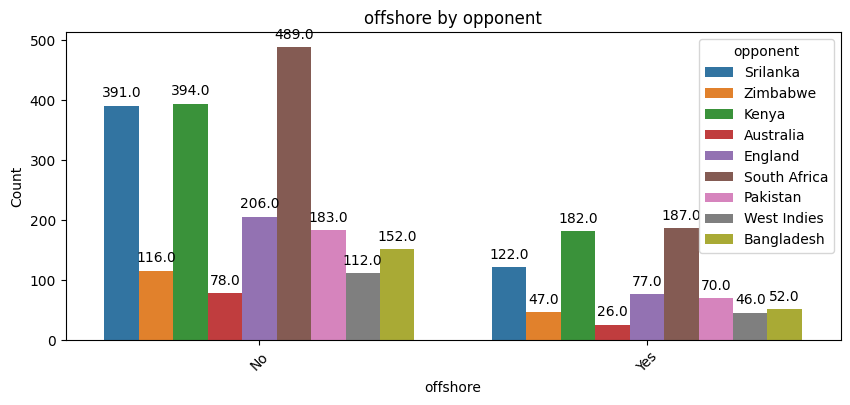

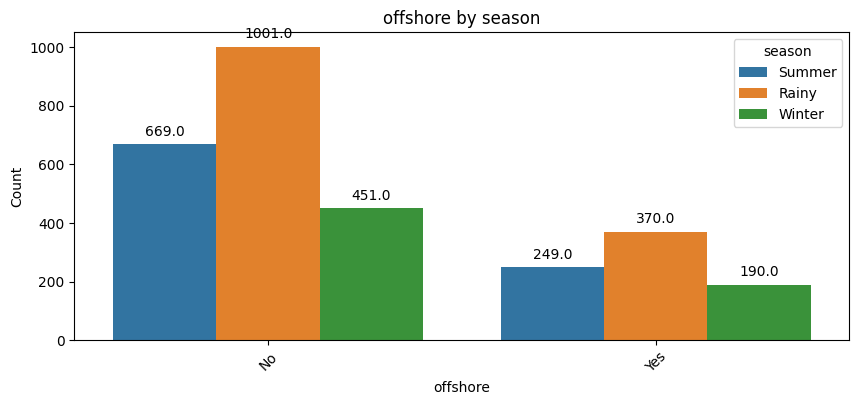

In [10]:
# Continuous-Continuous Relationships
sns.pairplot(data[continuous_vars])
plt.show()

# Continuous-Categorical Relationships
for var in categorical_vars:
    for cont_var in continuous_vars:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[var], y=data[cont_var])
        plt.title(f'{cont_var} by {var}')
        plt.xticks(rotation=45)
        plt.show()

# Categorical-Categorical Relationships
# Function to add values on top of bars
def add_grouped_value_labels(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if height > 0:
            ax.annotate(f'{height}',
                        (patch.get_x() + patch.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 9),
                        textcoords='offset points')

# Plotting the countplots for each combination of categorical variables with labels
for var1 in categorical_vars:
    for var2 in categorical_vars:
        if var1 != var2:
            plt.figure(figsize=(10, 4))
            ax = sns.countplot(x=data[var1], hue=data[var2])
            add_grouped_value_labels(ax)
            plt.title(f'{var1} by {var2}')
            plt.xticks(rotation=45)
            plt.xlabel(var1)
            plt.ylabel('Count')
            plt.legend(title=var2)
            plt.show()


In [8]:
# Example: Removing outliers using IQR method
for var in continuous_vars:
    Q1 = data[var].quantile(0.25)
    Q3 = data[var].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[var] < (Q1 - 1.5 * IQR)) | (data[var] > (Q3 + 1.5 * IQR)))
    data = data[~outliers]


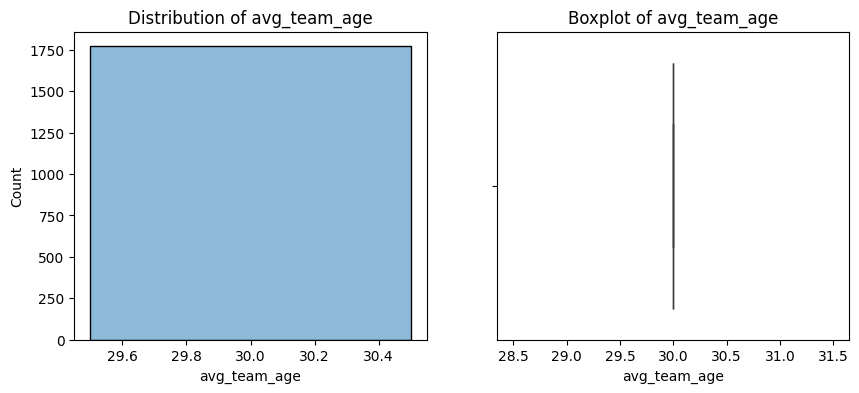

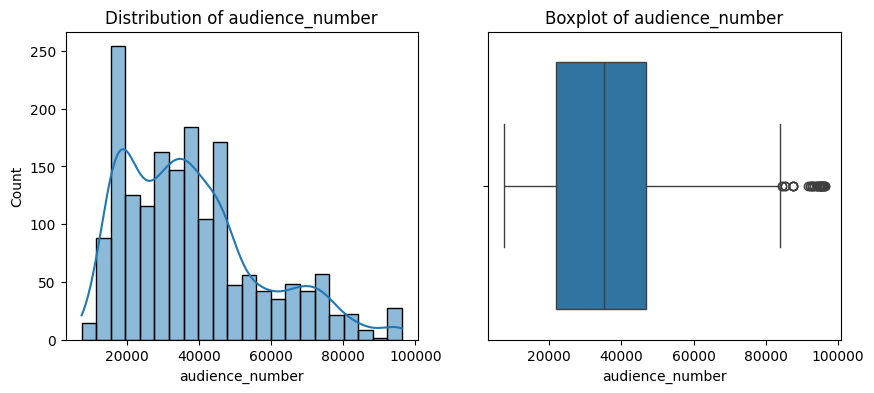

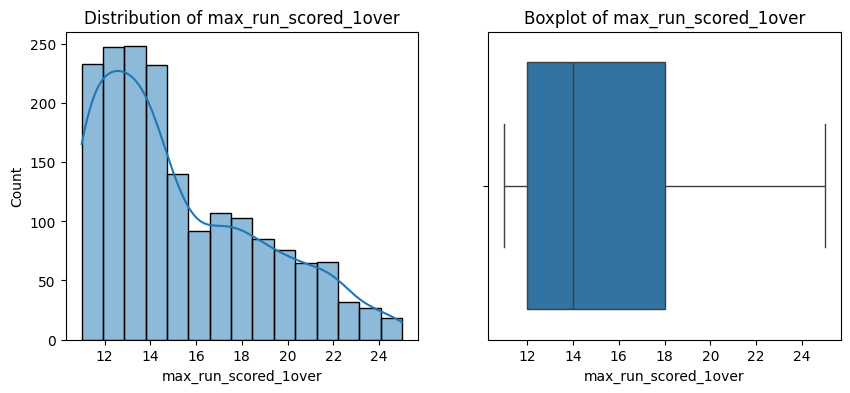

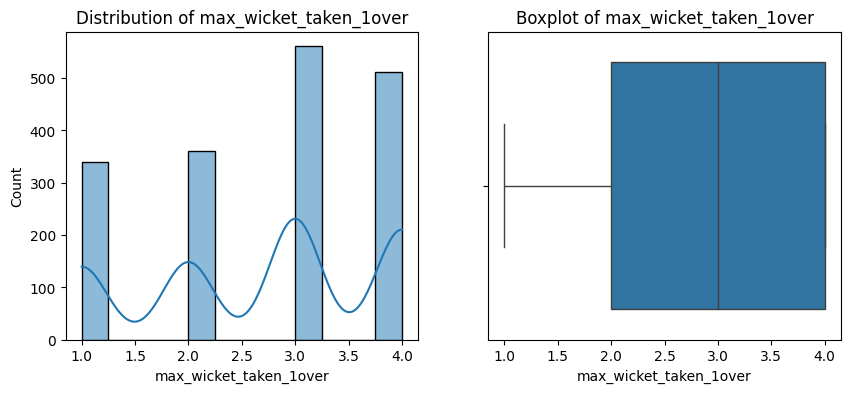

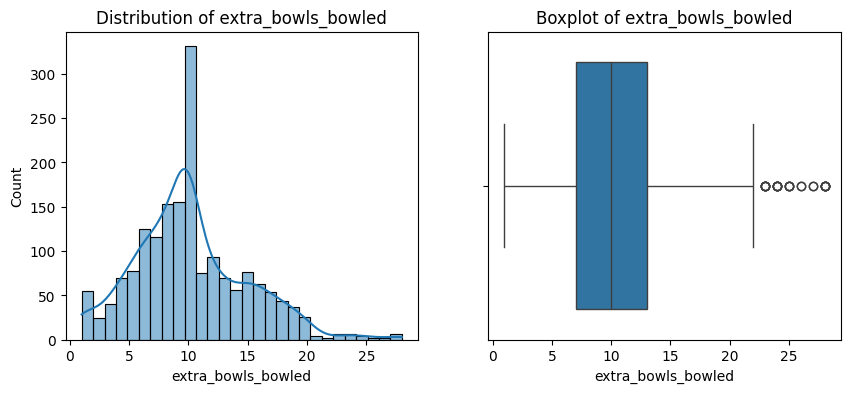

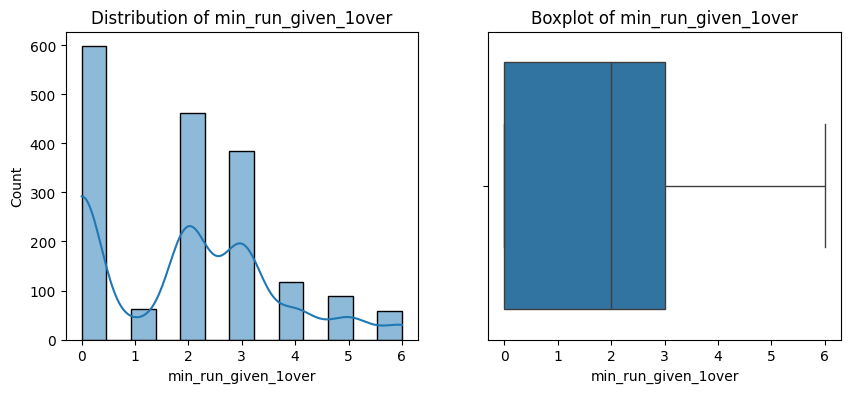

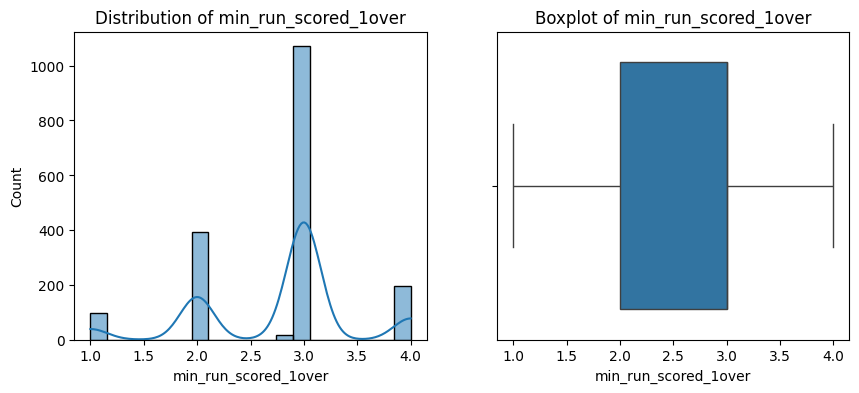

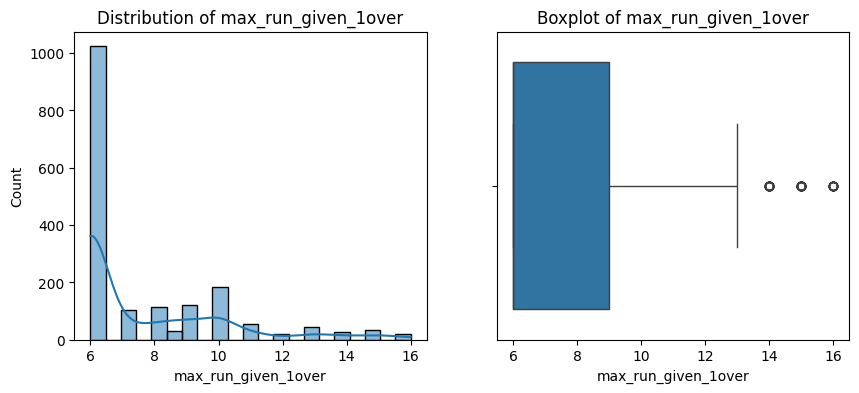

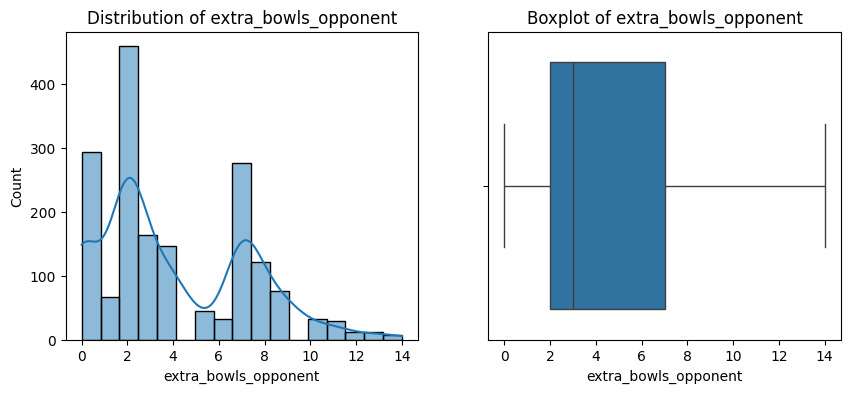

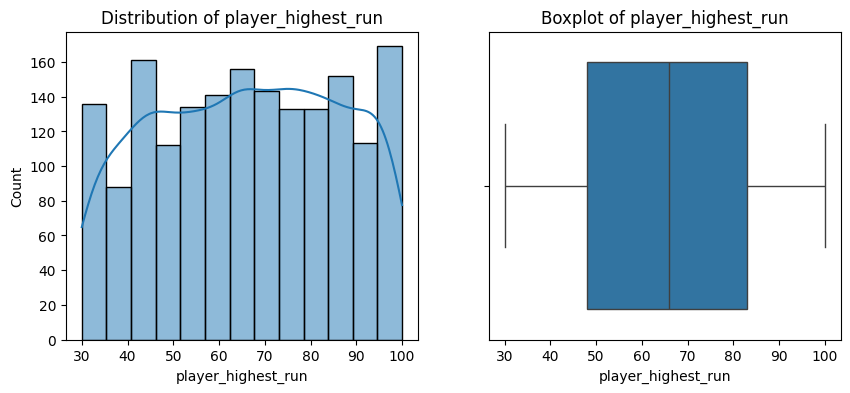

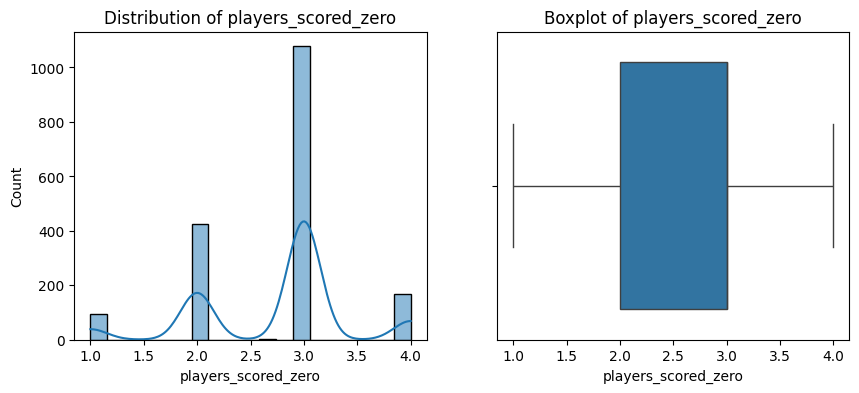

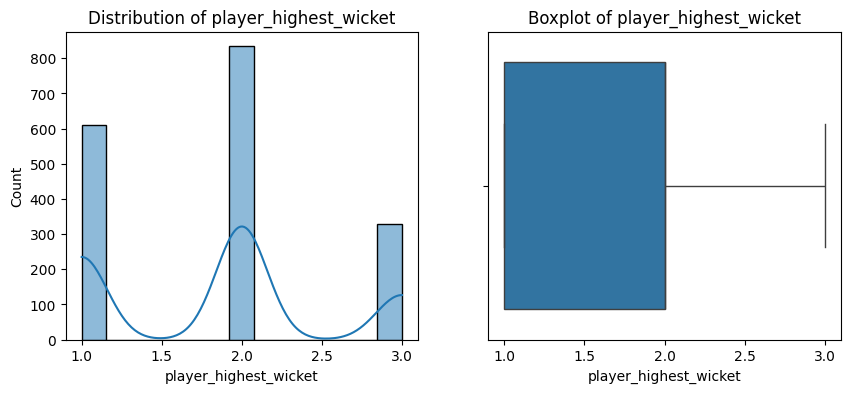

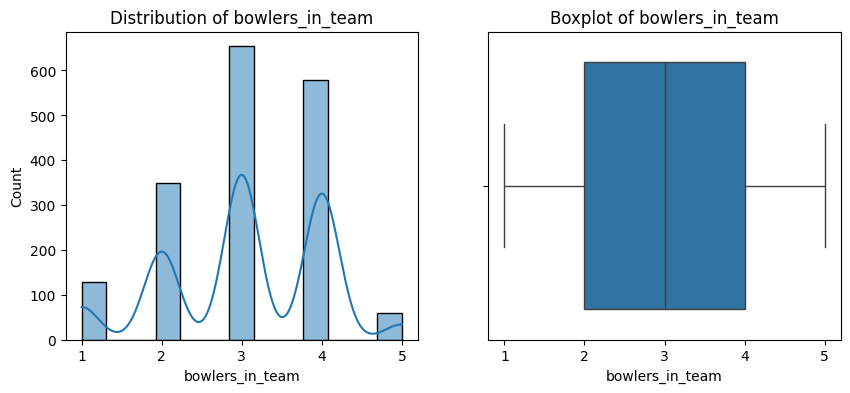

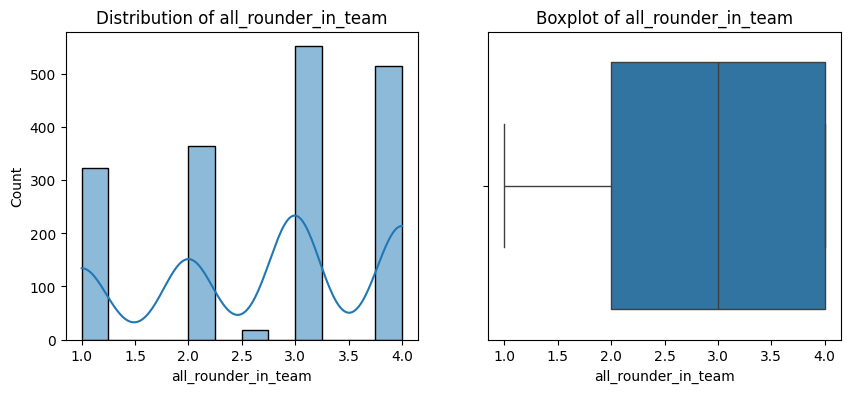

In [9]:
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var].dropna())
    plt.title(f'Boxplot of {var}')

    plt.show()

In [10]:
import numpy as np
# Example: Log transformation for skewed variables
for var in continuous_vars:
    if data[var].skew() > 1:
        data[var] = np.log1p(data[var])


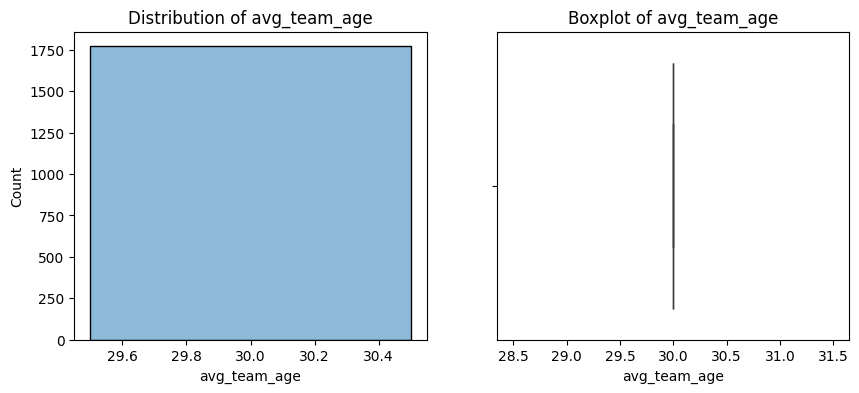

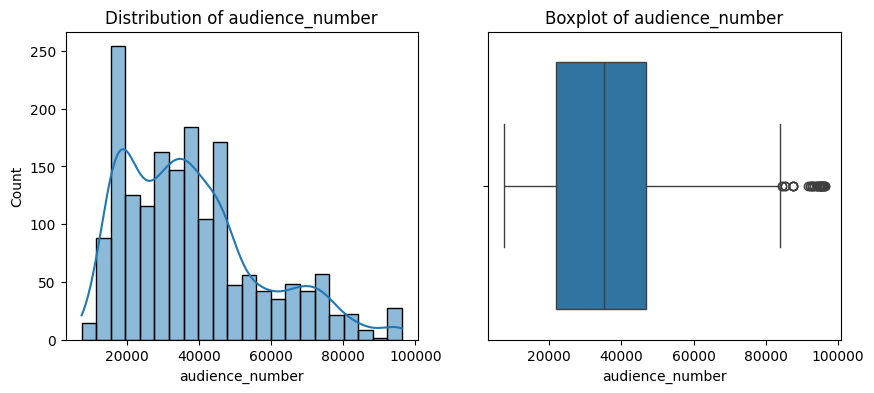

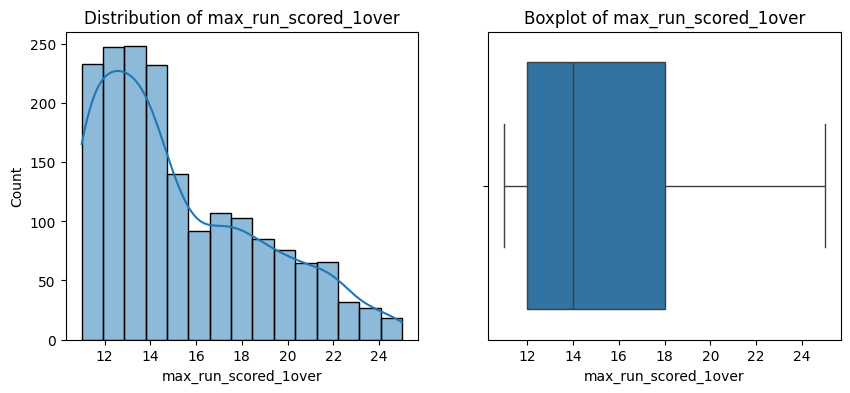

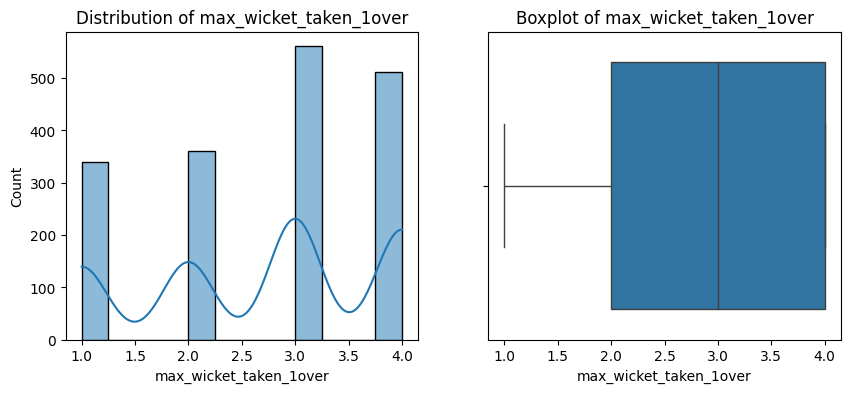

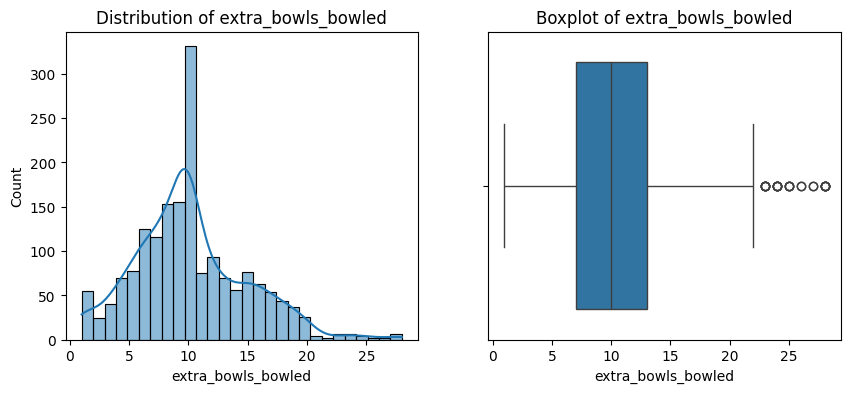

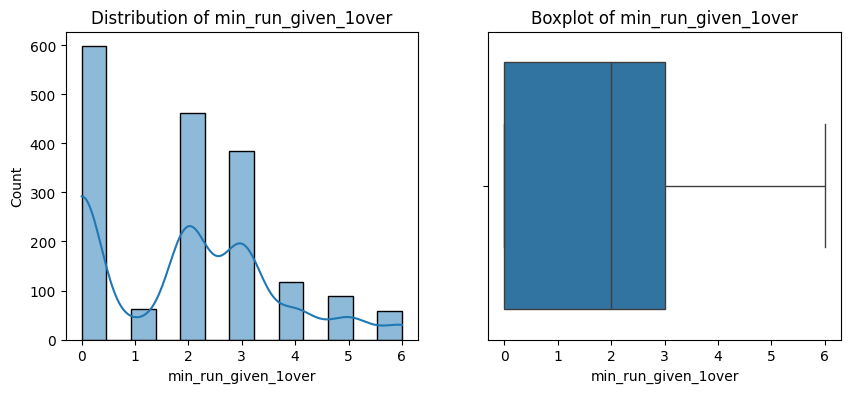

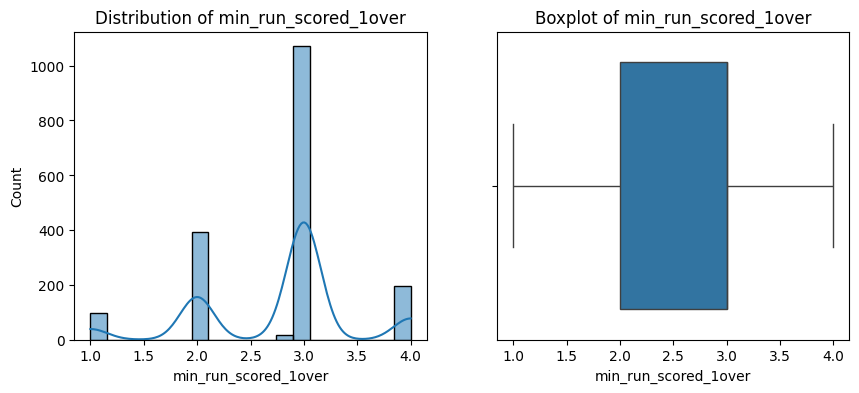

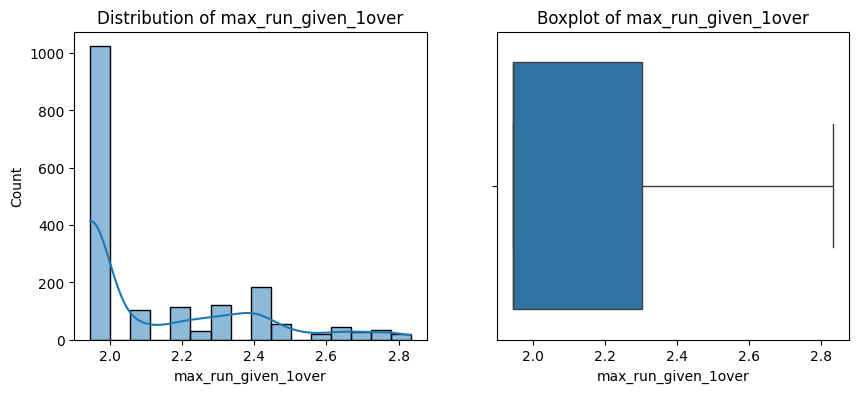

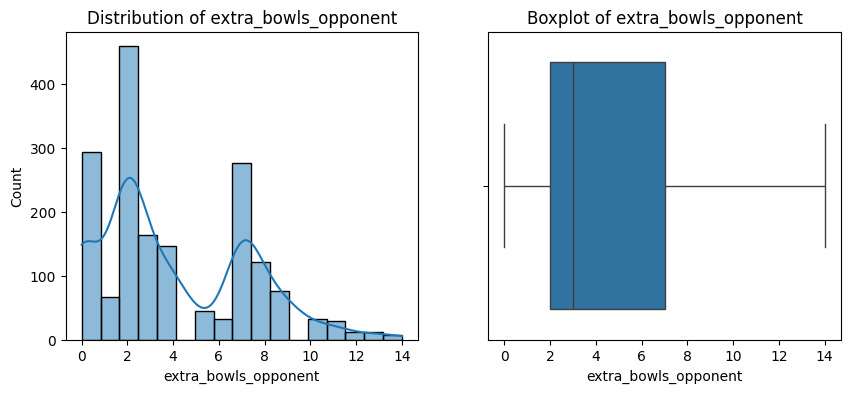

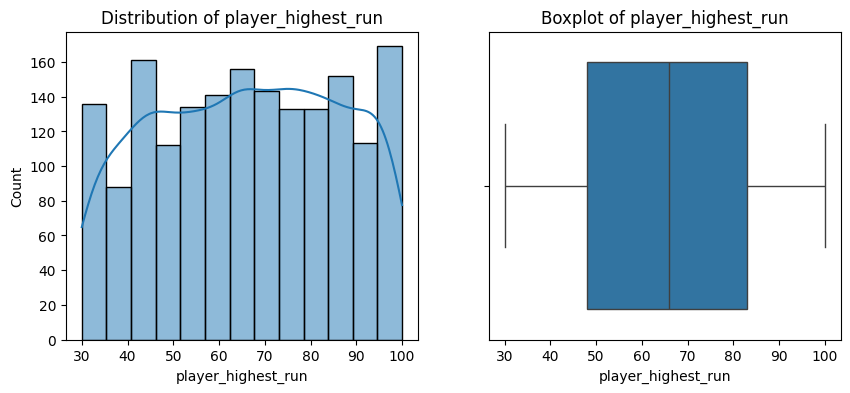

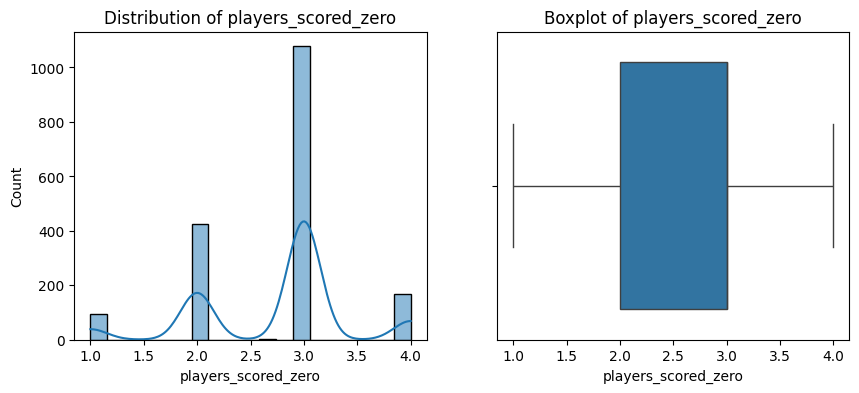

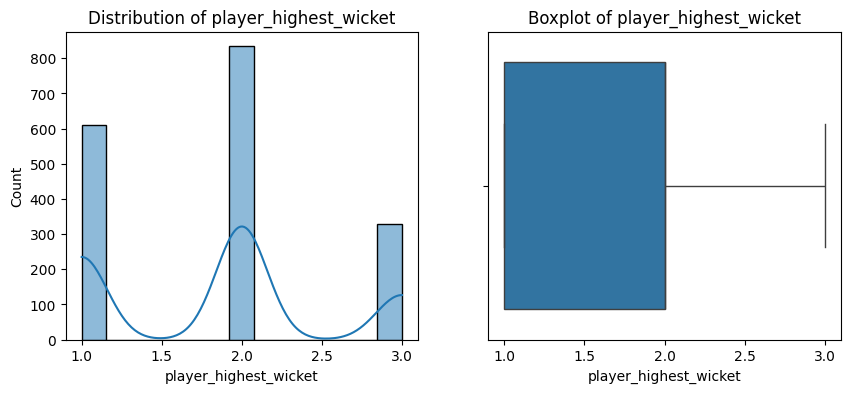

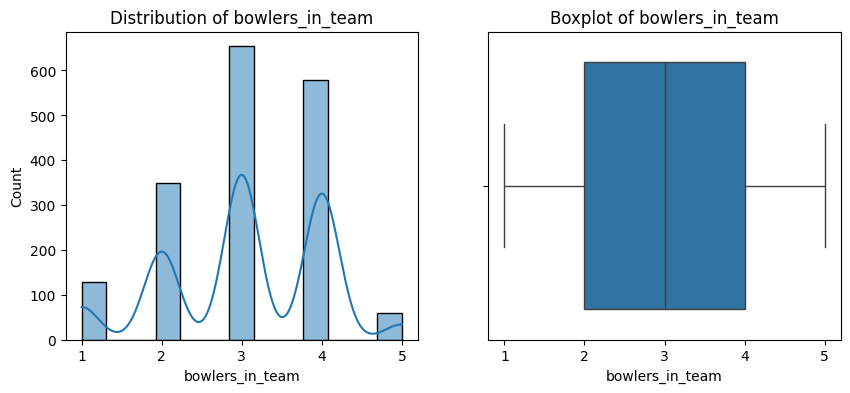

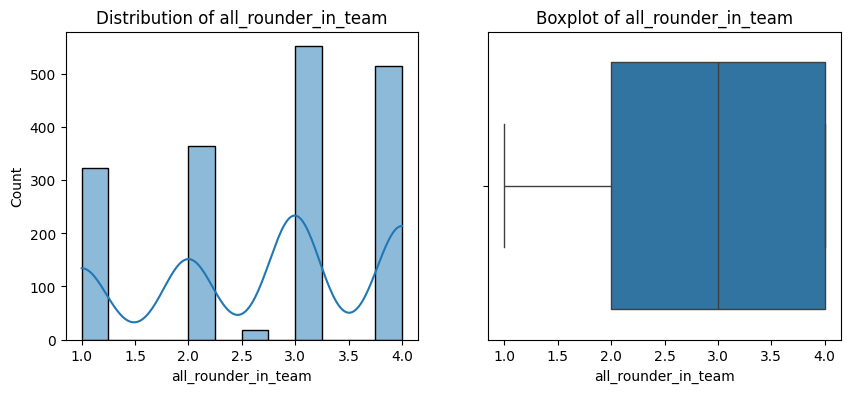

In [11]:
for var in continuous_vars:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[var].dropna())
    plt.title(f'Boxplot of {var}')

    plt.show()

result
Win     1516
Loss     255
Name: count, dtype: int64


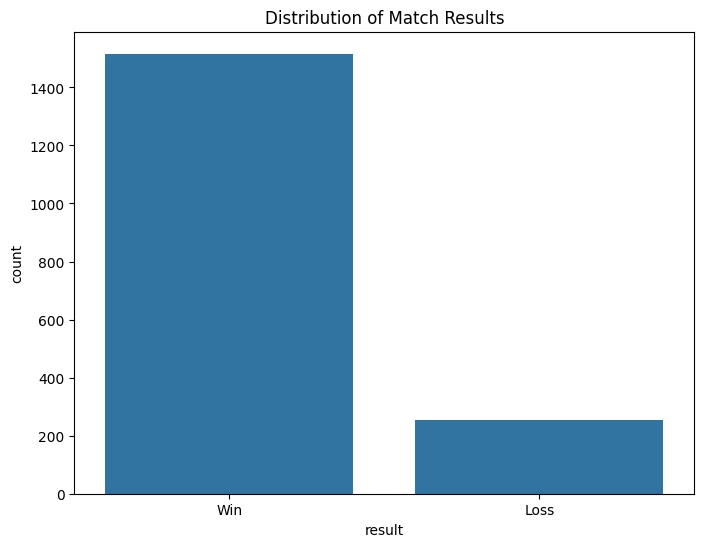

In [12]:
# Check the distribution of the target variable 'Result'
result_counts = data['result'].value_counts()
print(result_counts)

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='result', data=data)
plt.title('Distribution of Match Results')
plt.show()


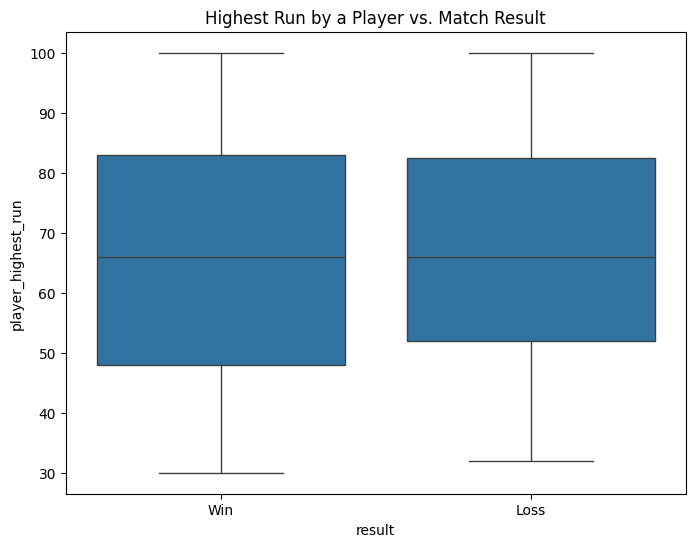

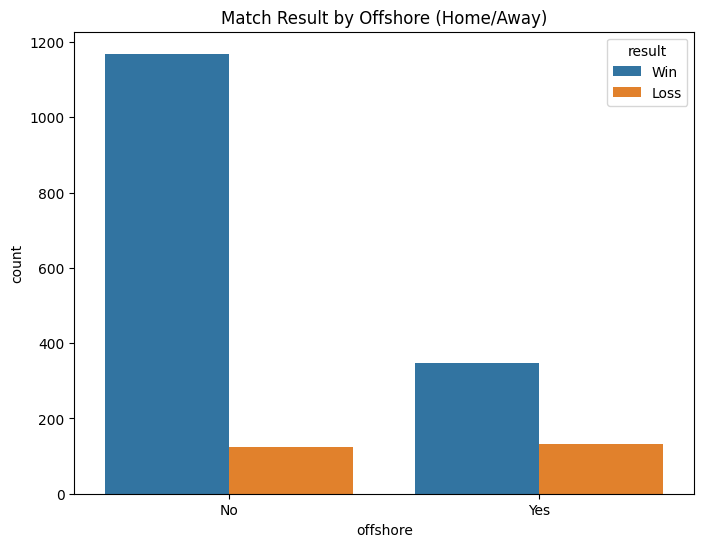

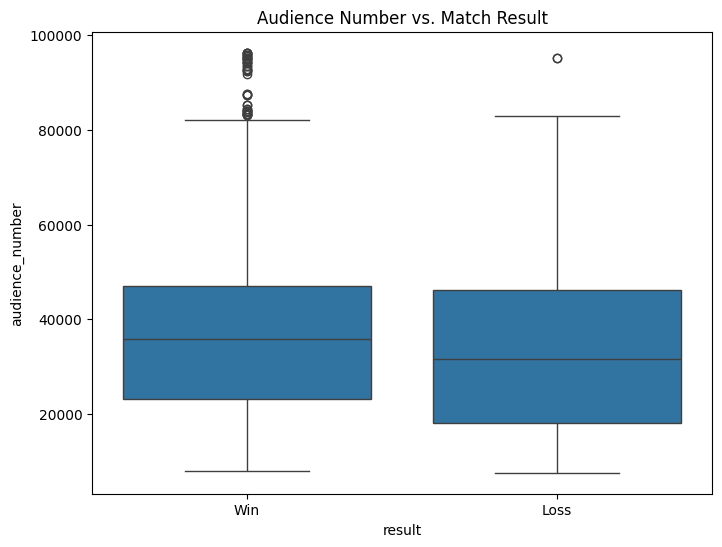

In [13]:
# Key Players Analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='player_highest_run', data=data)
plt.title('Highest Run by a Player vs. Match Result')
plt.show()

# Home vs. Away Performance
plt.figure(figsize=(8, 6))
sns.countplot(x='offshore', hue='result', data=data)
plt.title('Match Result by Offshore (Home/Away)')
plt.show()

# Audience Influence
plt.figure(figsize=(8, 6))
sns.boxplot(x='result', y='audience_number', data=data)
plt.title('Audience Number vs. Match Result')
plt.show()


In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check the unique values of the encoded target variable
print("Encoded target classes:", label_encoder.classes_)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


Encoded target classes: ['Loss' 'Win']


In [26]:
# Split the unbalanced data into training and testing sets
X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'LDA': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB()
}

results_unbalanced = []

for name, model in models.items():
    model.fit(X_train_unbalanced, y_train_unbalanced)
    y_pred = model.predict(X_test_unbalanced)
    y_pred_prob = model.predict_proba(X_test_unbalanced)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test_unbalanced)

    results_unbalanced.append({
        'Model': name + ' (Unbalanced)',
        'Accuracy': accuracy_score(y_test_unbalanced, y_pred),
        'Precision': precision_score(y_test_unbalanced, y_pred, average='weighted'),
        'Recall': recall_score(y_test_unbalanced, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test_unbalanced, y_pred, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test_unbalanced, y_pred_prob)
    })


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_unbalanced, y_train_unbalanced)


In [29]:
results_balanced = []

for name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_unbalanced)
    y_pred_prob = model.predict_proba(X_test_unbalanced)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_test_unbalanced)

    results_balanced.append({
        'Model': name + ' (Balanced)',
        'Accuracy': accuracy_score(y_test_unbalanced, y_pred),
        'Precision': precision_score(y_test_unbalanced, y_pred, average='weighted'),
        'Recall': recall_score(y_test_unbalanced, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test_unbalanced, y_pred, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test_unbalanced, y_pred_prob)
    })


In [30]:
# Combine results
results_combined = results_unbalanced + results_balanced
results_df = pd.DataFrame(results_combined)
print(results_df)


                         Model  Accuracy  Precision    Recall  F1-Score  \
0   Decision Tree (Unbalanced)  0.929577   0.927199  0.929577  0.928050   
1   Random Forest (Unbalanced)  0.954930   0.957183  0.954930  0.951315   
2        AdaBoost (Unbalanced)  0.892958   0.885464  0.892958  0.873174   
3         XGBoost (Unbalanced)  0.952113   0.951166  0.952113  0.949644   
4             SVM (Unbalanced)  0.856338   0.733315  0.856338  0.790066   
5             KNN (Unbalanced)  0.836620   0.787017  0.836620  0.803360   
6             LDA (Unbalanced)  0.887324   0.878005  0.887324  0.864386   
7     Naive Bayes (Unbalanced)  0.861972   0.846978  0.861972  0.807948   
8     Decision Tree (Balanced)  0.921127   0.917186  0.921127  0.918283   
9     Random Forest (Balanced)  0.943662   0.941907  0.943662  0.940451   
10         AdaBoost (Balanced)  0.839437   0.838127  0.839437  0.838774   
11          XGBoost (Balanced)  0.949296   0.947804  0.949296  0.946950   
12              SVM (Bala

In [32]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train_balanced, y_train_balanced)
best_rf = grid_search_rf.best_estimator_

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid=param_grid_xgb, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search_xgb.fit(X_train_balanced, y_train_balanced)
best_xgb = grid_search_xgb.best_estimator_

# Evaluate the tuned models
y_pred_best_rf = best_rf.predict(X_test_unbalanced)
y_pred_best_rf_prob = best_rf.predict_proba(X_test_unbalanced)[:, 1]

y_pred_best_xgb = best_xgb.predict(X_test_unbalanced)
y_pred_best_xgb_prob = best_xgb.predict_proba(X_test_unbalanced)[:, 1]

tuned_rf_results = {
    'Model': 'Tuned Random Forest',
    'Accuracy': accuracy_score(y_test_unbalanced, y_pred_best_rf),
    'Precision': precision_score(y_test_unbalanced, y_pred_best_rf, average='weighted'),
    'Recall': recall_score(y_test_unbalanced, y_pred_best_rf, average='weighted'),
    'F1-Score': f1_score(y_test_unbalanced, y_pred_best_rf, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test_unbalanced, y_pred_best_rf_prob)
}

tuned_xgb_results = {
    'Model': 'Tuned XGBoost',
    'Accuracy': accuracy_score(y_test_unbalanced, y_pred_best_xgb),
    'Precision': precision_score(y_test_unbalanced, y_pred_best_xgb, average='weighted'),
    'Recall': recall_score(y_test_unbalanced, y_pred_best_xgb, average='weighted'),
    'F1-Score': f1_score(y_test_unbalanced, y_pred_best_xgb, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test_unbalanced, y_pred_best_xgb_prob)
}

results_combined.append(tuned_rf_results)
results_combined.append(tuned_xgb_results)


In [33]:
from sklearn.ensemble import VotingClassifier

# Create an ensemble model with tuned Random Forest and XGBoost
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb)
], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train_balanced, y_train_balanced)

# Evaluate the ensemble model
y_pred_ensemble = voting_clf.predict(X_test_unbalanced)
y_pred_ensemble_prob = voting_clf.predict_proba(X_test_unbalanced)[:, 1]

ensemble_results = {
    'Model': 'Ensemble (Tuned RF + XGB)',
    'Accuracy': accuracy_score(y_test_unbalanced, y_pred_ensemble),
    'Precision': precision_score(y_test_unbalanced, y_pred_ensemble, average='weighted'),
    'Recall': recall_score(y_test_unbalanced, y_pred_ensemble, average='weighted'),
    'F1-Score': f1_score(y_test_unbalanced, y_pred_ensemble, average='weighted'),
    'AUC-ROC': roc_auc_score(y_test_unbalanced, y_pred_ensemble_prob)
}

results_combined.append(ensemble_results)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results_combined)
print(results_df)


                         Model  Accuracy  Precision    Recall  F1-Score  \
0   Decision Tree (Unbalanced)  0.929577   0.927199  0.929577  0.928050   
1   Random Forest (Unbalanced)  0.954930   0.957183  0.954930  0.951315   
2        AdaBoost (Unbalanced)  0.892958   0.885464  0.892958  0.873174   
3         XGBoost (Unbalanced)  0.952113   0.951166  0.952113  0.949644   
4             SVM (Unbalanced)  0.856338   0.733315  0.856338  0.790066   
5             KNN (Unbalanced)  0.836620   0.787017  0.836620  0.803360   
6             LDA (Unbalanced)  0.887324   0.878005  0.887324  0.864386   
7     Naive Bayes (Unbalanced)  0.861972   0.846978  0.861972  0.807948   
8     Decision Tree (Balanced)  0.921127   0.917186  0.921127  0.918283   
9     Random Forest (Balanced)  0.943662   0.941907  0.943662  0.940451   
10         AdaBoost (Balanced)  0.839437   0.838127  0.839437  0.838774   
11          XGBoost (Balanced)  0.949296   0.947804  0.949296  0.946950   
12              SVM (Bala

In [34]:
best_models = results_df.loc[results_df['Model'].isin(['Tuned Random Forest', 'Ensemble (Tuned RF + XGB)'])]
print(best_models)


                        Model  Accuracy  Precision    Recall  F1-Score  \
16        Tuned Random Forest  0.938028   0.935997  0.938028  0.933796   
18  Ensemble (Tuned RF + XGB)  0.949296   0.948300  0.949296  0.946406   

     AUC-ROC  
16  0.950690  
18  0.949239  


Feature ranking:
1. feature 32 (0.11643917409040665)
2. feature 4 (0.07380768140985328)
3. feature 30 (0.055151126395345904)
4. feature 12 (0.05379387641464453)
5. feature 3 (0.05284547950207631)
6. feature 21 (0.04617640811865197)
7. feature 11 (0.04603545865996202)
8. feature 9 (0.044007733285807454)
9. feature 5 (0.043940473229205745)
10. feature 13 (0.04371809319841664)
11. feature 7 (0.04353168362431017)
12. feature 20 (0.04138620748159692)
13. feature 15 (0.03804944805907035)
14. feature 8 (0.03488090687033618)
15. feature 1 (0.033440860410343866)
16. feature 6 (0.0312049341684963)
17. feature 18 (0.030370030309229926)
18. feature 17 (0.026862032060391963)
19. feature 10 (0.025623292586280523)
20. feature 14 (0.021240272852200915)
21. feature 27 (0.018516075252107776)
22. feature 31 (0.016481874363952417)
23. feature 26 (0.012902575136544529)
24. feature 24 (0.010870246130590731)
25. feature 25 (0.008988720991561868)
26. feature 16 (0.008545254432240093)
27. feature 23 (0.0079891

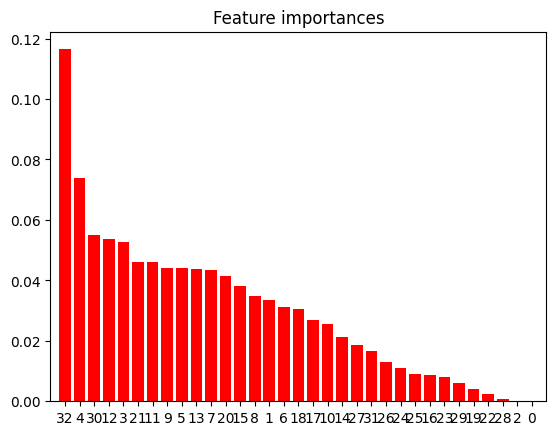

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance from the tuned Random Forest model
feature_importances = best_rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train_balanced.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({feature_importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train_balanced.shape[1]), feature_importances[indices],
       color="r", align="center")
plt.xticks(range(X_train_balanced.shape[1]), indices)
plt.xlim([-1, X_train_balanced.shape[1]])
plt.show()
